<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/5_4_Linear_Classifiers_in_Python_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-4 Linear Classifiers in Python - Support Vector Machines.

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

## Support Vectors

### What is an SVM?

- Linear SVMs are linear classifiers, like Logistic Regression, but they use the **hinge loss function** rather than the **logistic loss function**
- Trained using the hinge loss and L2 regularization

<img src='https://drive.google.com/uc?export=view&id=1lPNJ4ObmC8n9jtLqSBwWtLSsYGdBaC1i'>

- A key characteristic of hinge loss is the "flat" part where the raw model output is greater than 1, meaning you predicted an example correctly beyond some margin of error
- If a training example falls into this **zero loss** region, the loss function doesn't contribute to the fit because it is 0
- The samples here do not influence the model parameters beause they don't "pull" on the decision boundary anymore. It's already classed confidently and correctly.
- Only the points **on the margin or inside it** (where loss > 0) contribute to the optimization
    - These are called **support vectors**
    - The rest are still in the dataset, but they **don't affect the final solution**
    - In fact, if you did remove a point in the **zero loss** region, the SVM's learned decision bounary **would not change**

  

<img src='https://drive.google.com/uc?export=view&id=1lY0VtMggEDIrcxHfZKegwGGmVeeGkJuz'>

The **support vectors** have yellow circles around them in the diagram

- **Support vector**: a training example **not** in the flat part of the loss diagram
- **Support vector**: an example that is incorrectly classifired or close to the boundary
- What is considered "close enough" is controlled by the regularization strength
- **Support vectors** are examples that matter to your fit
- If an example is not a support vector, removing it has no effect on the model
- Comparing with logistic regression, there is no flat part of the loss there, and therefor all data points matter to the fit
- Even though we use the term "support vectors", it's really the non-support-vectors that are remarkable
    - non-support-vectors are classified so confidently that the model ignores them during training
    - this is unusual in machine learning
    - in linear regression, all points contribute to the line
    - in logistic regression every sample contributes to the loss, even if predicted correctly
    - but in SVMs, if a point is correctly classified with a wide margin, it has **zero loss and zero gradient** - removing it would not change the model at all
    - it also explains why SVMs are known for **sparse solutions**
        - only a subset of the training data define the model
        - this has computational and conceptual advantages
        - faster prediction time, once trained predictions depend **only on support vectors**
        - If you have 10K trainig points but only 50 support vectors, prediction becomse much faster
        - especially useful in online or real-time application
        - memory efficient
        - better generalization, SVMs are less prone to overfitting
        - the decision boundary focues are **hard-to-classify points near the margin**, which tend to be more informative
        - more interpretable because you can inspect support vectors to understand what **edge cases** are influencing the decision boundary
        - great for explaining a model to stakeholdres or debugging why a model makes certain predictions
        - Having a small number of support vectors makes kernel SVMs really fast

### Max-margin viewpoint

- The SVM maximizes the "margin" for linearly separable datasets
- Not all algorithms do that, sometimes the boundary is closer to one class than the other
- This is an appealing property
- Unfortunately, most datasets are not linearly separable
    - These max margin ideas can be extended to non-separable data, but that is beyond scope here

As it turns out, hinge loss and L2 regularization are mathematically equivalent.

### Effect of removing examples

In [2]:
wine = datasets.load_wine()
X, y = wine.data, wine.target
X = X[:, (0, 1)]
X.shape, y.shape

((178, 2), (178,))

In [3]:
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(kernel='linear')

In [4]:
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))

Number of original examples 178
Number of support vectors 81


In [5]:
X_small = X[svm.support_]
y_small = y[svm.support_]
X_small.shape, y_small.shape

((81, 2), (81,))

In [6]:
svm_small = SVC(kernel='linear')
svm_small.fit(X_small, y_small)

SVC(kernel='linear')

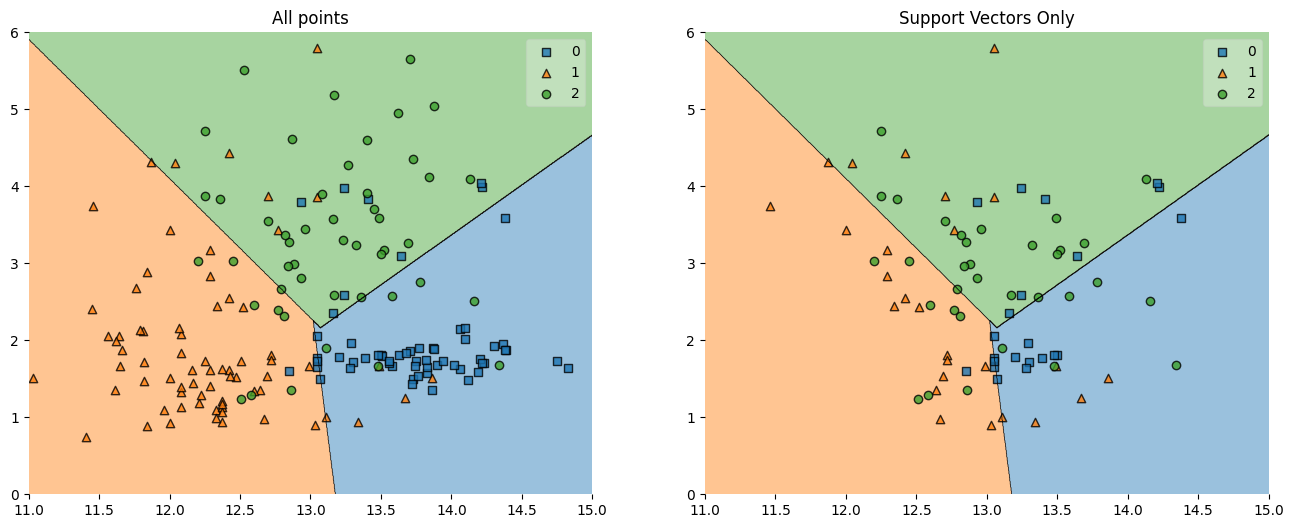

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_decision_regions(X, y, svm, ax=axes[0])
axes[0].set_xlim(11, 15)
axes[0].set_ylim(0, 6)
axes[0].set_title('All points')

plot_decision_regions(X_small, y_small, svm_small, ax=axes[1])
axes[1].set_xlim(11, 15)
axes[1].set_ylim(0, 6)
axes[1].set_title('Support Vectors Only')

plt.show()

## Kernel SVMs

- Here we consider how to fit nonlinear boundaries using linear classifiers
- Consider this 2D toy dataset
- A linear SVM may classify all of them as the blue class

<img src='https://drive.google.com/uc?export=view&id=1sHS-OxO1g5dHF0yfctr7-Z3gJb3xPoVS'>


- Let's **create 2 new features**
    - One will be feature 1 squared
    - The other, feature 2 squareed
- That means values near 0 will become small values and values from from zero (both positive and negative) will become large

<img src='https://drive.google.com/uc?export=view&id=17UDWPgCF6bCcvwCFJK6-u7xL6K9Zg3z9'>

- Now they are linearly separable in this tranformed universe
- We can now fit a linear SVM using these new features and the result is a perfect classification
- You might as, what does this linear boundary look like back in the original space?
    - If we took these axes and unsquared them, what would happen to ths shape of the boundary?
- In this case, **we get an ellipse

<img src='https://drive.google.com/uc?export=view&id=1VlJDNJNHM6XCoyajRlsI96R5bsMmLnpf'>

- Fitting a linear model in a transformed space, corresponds to fitting a nonlinear model in the original space
  

In [8]:
data_url = 'https://drive.google.com/uc?id=1hY3Pz6yC-7iNg1WI28PtweXJheJqYkmV'
toy = pd.read_csv(data_url)
toy['class'] = toy['class'].astype(int)
toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  28 non-null     float64
 1   feature_2  28 non-null     float64
 2   class      28 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 804.0 bytes


In [9]:
X = toy[['feature_1', 'feature_2']].values
y = toy['class'].values

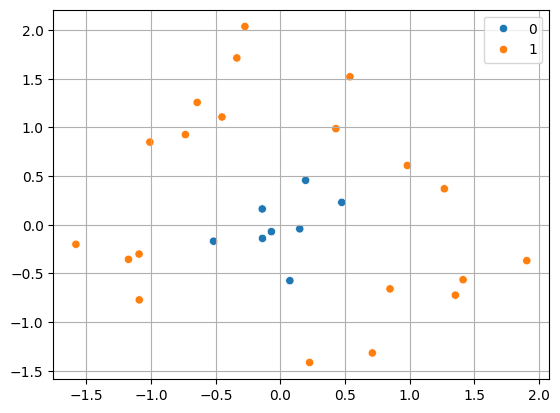

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.grid()
plt.show()

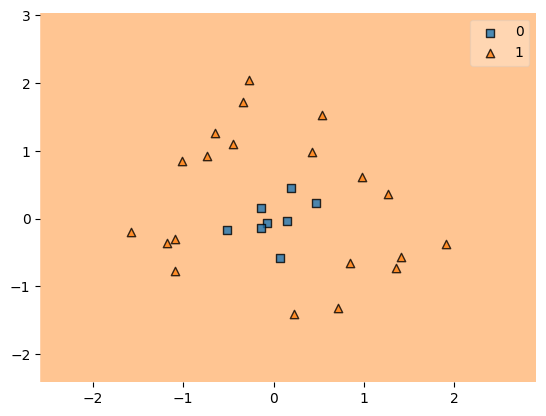

In [11]:
svm = SVC(kernel='linear')
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm);

### Transforming your features

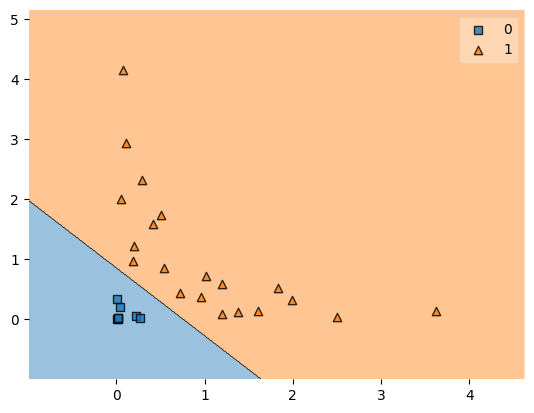

In [12]:
X_sq = X**2
svm2 = SVC(kernel='linear')
svm2.fit(X_sq, y)
plot_decision_regions(X_sq, y, clf=svm2);

The decison boundary: $w_1 x^2 + w_2 y^2 + b = 0$

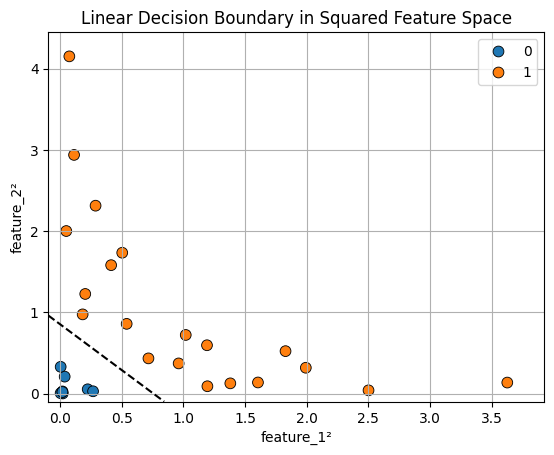

In [13]:
# get the weights and bias
w=svm2.coef_[0]
b = svm2.intercept_[0]

# clamp the lower bound to zero and slightly expand upper bound
x_min = X_sq[:, 0].min() - 0.1
x_max = X_sq[:, 0].max() + 0.3
y_min = X_sq[:, 1].min() - 0.1
y_max = X_sq[:, 1].max() + 0.3


# Create meshgrid in positive quadrant with padding
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# calculate the decision function value at each point
Z = (w[0] * xx + w[1] * yy + b).reshape(xx.shape)

# plot the points
sns.scatterplot(x=X_sq[:, 0], y=X_sq[:, 1], hue=y, s=60, edgecolor='k')

# plot decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')

plt.xlabel("feature_1²")
plt.ylabel("feature_2²")
plt.grid()
plt.title("Linear Decision Boundary in Squared Feature Space")
plt.show()

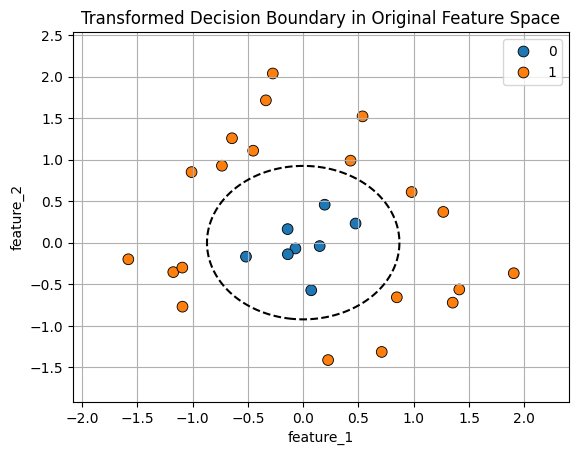

In [14]:
# Prepare meshgrid in original (unsquared) space
x_orig_min, x_orig_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_orig_min, y_orig_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx_orig, yy_orig = np.meshgrid(np.linspace(x_orig_min, x_orig_max, 300),
                               np.linspace(y_orig_min, y_orig_max, 300))

# Compute decision function in squared space (using squared mesh)
Z_curved = w[0] * xx_orig**2 + w[1] * yy_orig**2 + b

# Plot original data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, edgecolor='k')

# Plot curved decision boundary in original space
plt.contour(xx_orig, yy_orig, Z_curved, levels=[0], colors='black', linestyles='--')

plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.title("Transformed Decision Boundary in Original Feature Space")
plt.grid()
plt.show()

- In general, the transformation isn't always going to be squaring and the boundary isn't always going to be an ellipse
- In fact, the new space often has a different number of dimensions from the original space!
- Kernels and kernel SVMs implement feature transformations in a computationally efficient way

### Kernel SVMs

- Let's look at some code. Well need to use sklearn's SVC class, rather than LinearSVC, to allow for different kernels
- The default behaviour is what's called an RBF or Radial Basis Function kernel
    - Although it's not computed this way, you can think of it as an extremely complicated transformation of the features, followed by fitting a linear boundary in that new space, just like we saw for the simple squaring tranformation
- While many nonlineasr kernels exist, we'll focus on the RBF

```python
from sklearn.svm import SVC

svm = SVC(gamma=1) # default `kenel='rbf'`
```

In [15]:
svm = SVC(gamma=1)
svm.fit(X, y)

SVC(gamma=1)

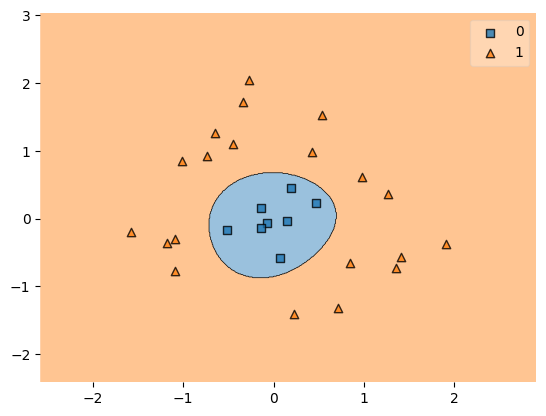

In [16]:
plot_decision_regions(X, y, clf=svm);

- We can control the shape of the bounary using the hyperparameters
- **gamma**
    - controls the smoothness of the boundary
    - for rbf kernel
    - decreasing gamma makes the boundaries smoother
- **C**, as usual, controls regularization

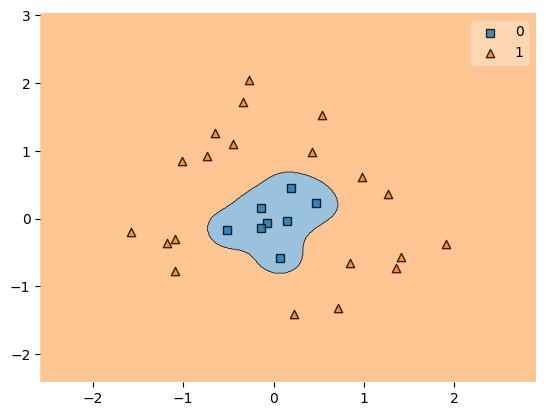

In [17]:
svm = SVC(gamma=10)
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm);

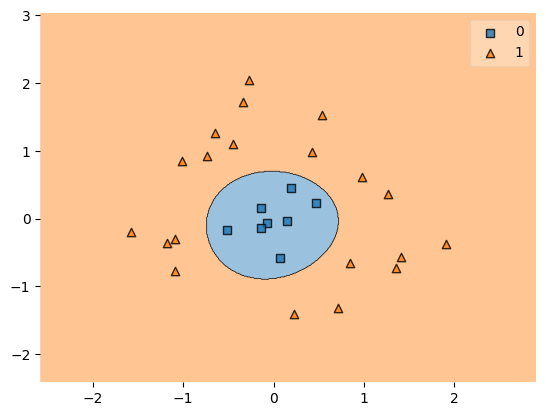

In [18]:
svm = SVC()
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm);

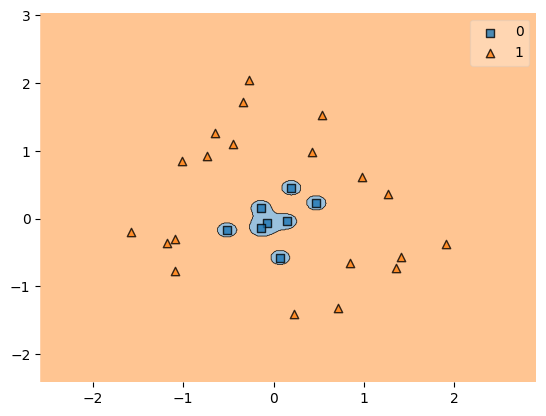

In [19]:
svm = SVC(gamma=50)
svm.fit(X, y)
plot_decision_regions(X, y, clf=svm);

- Larger `gamma` leads to more complext boundaries
- But that can lead to overfitting

<img src='https://drive.google.com/uc?export=view&id=1Kyf9M_8oFGOFwsU9RNtBCzbl6IKSpJ9p' height=200% width=200%>

### GridSearchCV warm-up

In [20]:
X = np.array([[ 0.,  1., 10., 15., 11.,  1.,  0.,  0.,  0.,  3.,  8.,  8., 11., 12.,  0.,  0.,  0.,  0.,
  0.,  5., 14., 15.,  1.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  4.,
 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  3.,  4., 10., 16.,
  1.,  0.,  0.,  0., 13., 16., 15., 10.,  0.,  0.] ,
[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9., 16.,  8.,  0.,  0.,  0.,
  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6., 13., 16.,
  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.] ,
[ 0.,  0.,  4., 14., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 16., 16.,  0.,  0.,  0.,  5.,
 16., 16., 16., 16.,  3.,  0.,  0.,  0.,  2.,  8., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
  8., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  1.,  6., 13., 16.,
  6.,  0.,  0.,  0.,  4., 13., 15.,  9.,  0.,  0.] ,
[ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,  0.,  0.,  0.,  0.,  4.,
 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5., 13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,  0.,  8.,
  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.] ,
[ 0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  3., 11., 16., 16.,  5.,  0.,  0.,  5.,
 16., 16., 16., 16.,  4.,  0.,  0.,  4., 10.,  9., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 16.,
  7.,  0.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.] ,
[ 0.,  0.,  9., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  9., 16.,  4.,  0.,  0.,  0.,  0.,
  2.,  6., 16., 16., 12.,  0.,  0.,  0., 14., 16., 14.,  8.,  7.,  0.,  0.,  0.,  3., 14.,
  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,
  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 14.,  0.,  0.,  0.,  0.,  0., 16.,  8., 13.,  7.,  0.,  0.,  0.,  0.,
 12.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 15., 10.,
  9.,  1.,  0.,  0., 12., 14., 13., 16., 16.,  5.] ,
[ 0.,  0.,  1., 13., 14.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2.,
 16., 16.,  3.,  0.,  0.,  0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,
  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 16.,  6.,  0.,  0.,  1., 14., 16., 16., 16.,
 12.,  0.,  0.,  0.,  3., 12., 15., 14.,  7.,  0.] ,
[ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  7., 16., 12.,  7., 11.,  2.,  0.,  0., 13.,
 13.,  1.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 12.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  0., 11., 16.,
  1.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  5.,  0.,  0.,  0.,  0.,
 13.,  9.,  9., 16.,  3.,  0.,  0.,  6., 15.,  6., 16.,  3.,  0.,  0.,  0.,  9., 13., 12.,
 15., 12.,  8.,  0.,  0.,  9., 16., 16., 14.,  7.,  2.,  0.,  0.,  1.,  7., 16.,  7.,  0.,
  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
 12.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
 12.,  9.,  2.,  0.,  0.,  0., 13.,  8.,  2.,  5., 13.,  0.,  0.,  0.,  6., 11.,  1.,  2.,
 16.,  3.,  0.,  0.,  0.,  8., 11., 14., 11.,  2.] ,
[ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0.,  9., 13.,  5.,  0.,  0.,  0.,  0.,  0.,
 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,
  9.,  9.,  2.,  0.,  0.,  0., 16., 11.,  8., 11., 12.,  0.,  0.,  1., 14., 11.,  1.,  4.,
 13.,  0.,  0.,  0.,  3., 11., 16., 15.,  4.,  0.] ,
[ 0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,
  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  3., 10., 10.,  0.,  0.,  1., 14., 15.,
 10., 16.,  6.,  0.,  0., 14., 14., 12., 15., 16.,  2.,  0.,  0.,  3.,  0.,  0.,  8., 14.,
  0.,  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 14., 13.,  2.,  0.,  0.,  0., 12., 15.,  9.,  7.,  1.,  0.,  0.,  5.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  0.,  6., 12., 14.,
  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,
  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  2.,
  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.,  0.,
  3., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
 16.,  0.,  0.,  0.,  0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,
  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 16.,  6., 15.,  1.,  0.,  0.,  0.,  4.,
 10.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5.,
 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0., 12.,  9.,  9., 16.,
  2.,  0.,  0.,  0.,  8., 16., 15.,  7.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 13.,  2.,  0.,  0.,  0.,  3., 16.,  6.,  1., 15.,  0.,  0.,  0.,  5.,
 16., 13., 12., 16.,  2.,  0.,  0.,  2., 13., 16., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
  0.,  8.,  8.,  0.,  0.,  0.,  1.,  0.,  0.,  8.,  8.,  0.,  0.,  3., 16.,  2.,  0., 10.,
  7.,  0.,  0.,  0.,  5., 11., 16., 13.,  1.,  0.] ,
[ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  2., 15.,  7., 11., 10.,  0.,  0.,  0.,  4.,
 16.,  0.,  0., 15.,  1.,  0.,  0.,  6., 10.,  0.,  0., 10.,  8.,  0.,  0.,  8.,  8.,  0.,
  0.,  6.,  8.,  0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  2., 16.,  7.,  8., 16.,
  2.,  0.,  0.,  0.,  6., 15., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  7., 12., 16.,  9.,  0.,  0.,  0.,  4., 16.,  6.,  7.,  3.,  0.,  0.,  0.,  4.,
 16.,  2.,  8.,  3.,  0.,  0.,  0.,  7., 16., 15., 13., 16.,  3.,  0.,  0.,  5., 11.,  1.,
  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0., 10., 16.,  6.,
  0.,  0.,  0.,  0., 10., 11.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 16., 12.,  0.,  0.,  0.,  5., 16.,  8.,  4., 12.,  2.,  0.,  0., 12.,
  6.,  0.,  0., 13.,  4.,  0.,  0.,  6., 16., 13., 16., 16.,  7.,  0.,  0.,  0.,  3.,  4.,
  1.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  8.,  9.,  2.,  9.,
  9.,  0.,  0.,  0.,  2., 13., 16., 15.,  3.,  0.] ,
[ 0.,  0.,  0.,  6., 15., 11.,  2.,  0.,  0.,  0.,  6., 13.,  4., 13.,  5.,  0.,  0.,  0.,
  7., 11.,  0., 13.,  3.,  0.,  0.,  0.,  2., 15., 13.,  7.,  0.,  0.,  0.,  3., 13., 12.,
 16.,  2.,  0.,  0.,  0.,  8., 15.,  1.,  9.,  8.,  0.,  0.,  0.,  0.,  7., 14.,  8., 16.,
  1.,  0.,  0.,  0.,  0.,  5., 12., 16.,  2.,  0.] ,
[ 0.,  0.,  4., 11., 15.,  8.,  0.,  0.,  0.,  0., 13., 16., 11., 13.,  7.,  0.,  0.,  3.,
 16., 12.,  0.,  4.,  8.,  0.,  0.,  6., 16.,  5.,  0.,  4.,  8.,  0.,  0.,  7.,  9.,  0.,
  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  2., 15.,  2.,  0.,  0.,  1., 16., 12., 14., 10.,
  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  3., 15., 16., 16.,  6.,  0.,  0.,  0.,  3., 14.,  7., 15.,  3.,  0.,  0.,  0.,
  0.,  0.,  4., 14.,  0.,  0.,  0.,  0.,  2.,  9., 15., 16., 14.,  0.,  0.,  0.,  7., 16.,
 14.,  6.,  2.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  3., 15., 16., 14.,  1.,  0.,  0.,  0.,  2., 12., 13., 16.,  4.,  0.,  0.,  0.,  0.,
  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  4.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  8., 11.,
  3.,  0.,  0.,  3., 16., 16., 16., 12.,  3.,  0.] ,
[ 0.,  0.,  0.,  5., 12., 12.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  1.,  0.,  0.,  0.,  0.,
 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  2.,  7.,  4.,  0.,  0.,  0.,  7., 15., 16.,
 13., 15.,  3.,  0.,  0.,  3., 16.,  9.,  0.,  1., 12.,  0.,  0.,  0., 10., 12.,  2.,  6.,
 13.,  0.,  0.,  0.,  0.,  8., 15., 16.,  5.,  0.] ,
[ 0.,  0.,  8., 13., 12.,  3.,  0.,  0.,  0.,  6., 15.,  7.,  9., 12.,  0.,  0.,  0.,  0.,
  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0., 11.,  2.,  1., 15.,
  7.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0.,
  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 11., 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16.,
 15., 12.,  0.,  0.,  0.,  0.,  9., 16.,  1., 13.,  7.,  0.,  0.,  0.,  4., 16.,  6., 15.,
  5.,  0.,  0.,  0.,  0.,  6., 14., 14.,  1.,  0.] ,
[ 0.,  0.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
 16., 13.,  1.,  0.,  0.,  2., 16.,  8.,  4.,  7., 11.,  0.,  0.,  0., 12., 11.,  1.,  8.,
 11.,  0.,  0.,  0.,  3., 12., 16., 15.,  4.,  0.] ,
[ 0.,  0.,  5., 15., 15.,  2.,  0.,  0.,  0.,  3., 16.,  9., 16.,  5.,  0.,  0.,  0.,  5.,
  9.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
  3.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  7.,  6.,
  2.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.] ,
[ 0.,  0.,  1., 13., 10.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,  7.,  0.,  0.,  0.,  8.,
 16., 13., 10., 15.,  0.,  0.,  0.,  8., 16.,  2.,  2., 15.,  3.,  0.,  0.,  5., 15.,  2.,
  0., 12.,  7.,  0.,  0.,  1., 15.,  6.,  2., 16.,  3.,  0.,  0.,  0., 11., 15., 13., 16.,
  0.,  0.,  0.,  0.,  1., 15., 14.,  8.,  0.,  0.] ,
[ 0.,  0.,  0., 13., 15.,  8.,  0.,  0.,  0.,  0.,  1., 16., 16., 10.,  0.,  0.,  0.,  0.,
  1., 16., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  0.,  0., 11., 16.,
 14.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  2.,
  0.,  0.,  0.,  0.,  1., 13., 16.,  4.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
 12., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,
  8., 10.,  8.,  0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,  0.,  5.,
 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.] ,
[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15., 14.,  0.,  0.,  0.,  0.,
  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,  1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13.,
 15.,  1.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16., 16., 11.,
  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.] ,
[ 0.,  0.,  6., 16., 15.,  5.,  0.,  0.,  0.,  0.,  2., 13., 14., 13.,  0.,  0.,  0.,  0.,
  0.,  2., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  8.,  7., 12., 16.,
  0.,  0.,  0.,  0.,  6., 16., 16., 12.,  1.,  0.] ,
[ 0.,  0.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 16., 12.,  0.,  0.,  0.,  2.,
 16.,  7.,  6., 15.,  3.,  0.,  0.,  8., 14.,  0.,  0.,  8.,  3.,  0.,  0.,  5., 14.,  0.,
  0.,  8.,  8.,  0.,  0.,  2., 16., 13., 11., 14.,  4.,  0.,  0.,  3., 16., 15., 16.,  6.,
  0.,  0.,  0.,  0.,  6., 14.,  8.,  0.,  0.,  0.] ,
[ 0.,  1.,  7., 13., 16., 13.,  0.,  0.,  0.,  7., 16., 16., 16., 14.,  0.,  0.,  0.,  1.,
  7., 16., 10.,  1.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
 14.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  3.,  0.,  0.,  0.,  1.,  5., 13., 16.,
  7.,  0.,  0.,  0.,  8., 15., 10.,  6.,  0.,  0.] ,
[ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 15., 11.,
 16., 13.,  4.,  0.,  0.,  7., 16., 16., 11., 14., 14.,  0.,  0.,  2., 16., 11.,  5., 15.,
 12.,  0.,  0.,  0.,  3., 16., 16., 14.,  3.,  0.] ,
[ 0.,  0.,  5., 12.,  8.,  0.,  1.,  0.,  0.,  0., 11., 16.,  5., 13.,  6.,  0.,  0.,  0.,
  2., 15., 16., 12.,  1.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 15.,
 16.,  7.,  0.,  0.,  0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16., 16.,  9.,
  0.,  0.,  0.,  0.,  6., 12., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
 11.,  8.,  0.,  0.,  1.,  0.,  0.,  4., 16.,  3.,  1., 10., 10.,  0.,  0.,  8., 16., 12.,
 14., 13.,  3.,  0.,  0.,  2., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  0.,
  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 15., 15., 11.,  4.,  0.,  0.,  1., 10.,  5.,  7., 16., 10.,  0.,  0.,  0.,
  0.,  1., 14., 14.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  7., 15.,
  3.,  0.,  0.,  0.,  6., 11., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  1., 13., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,
 14.,  6.,  0., 13.,  3.,  0.,  0.,  6., 10.,  0.,  0., 10.,  6.,  0.,  0.,  7., 13.,  0.,
  0.,  9.,  8.,  0.,  0.,  3., 16.,  1.,  3., 14.,  7.,  0.,  0.,  0., 11., 16., 16., 16.,
  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  5.,  0.,  0.,  0.,
  5., 16.,  6.,  6., 16.,  0.,  0.,  2., 16., 10.,  4., 13., 13.,  0.,  0., 13., 16., 16.,
 16., 16., 10.,  0.,  0.,  6.,  4.,  4., 11., 16.,  4.,  0.,  0.,  0.,  0.,  0., 14., 14.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.] ,
[ 0.,  0., 11., 16., 12.,  2.,  0.,  0.,  0.,  7., 16.,  6., 10., 13.,  0.,  0.,  0.,  0.,
  2.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  3., 12.,  9.,  0.,  0.,  0.,  0.,  0., 10.,
 16., 12.,  0.,  0.,  0.,  0.,  3.,  0.,  3., 15.,  7.,  0.,  0.,  3., 16.,  7.,  6., 14.,
  8.,  0.,  0.,  1.,  9., 15., 16., 12.,  1.,  0.] ,
[ 0.,  0., 11., 16., 12., 12., 16.,  7.,  0.,  3., 16.,  9.,  8., 16., 10.,  0.,  0.,  1.,
 10.,  0.,  6., 14.,  2.,  0.,  0.,  0.,  1.,  8., 15., 15., 11.,  0.,  0.,  0., 12., 16.,
 15.,  7.,  2.,  0.,  0.,  0.,  4., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,
  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  2.,
 13., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,
  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  2.,  0.] ,
[ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  3.,  2.,  0.,  0.,  0.,  0.,
 15.,  2.,  1., 14.,  3.,  0.,  0.,  5., 13.,  0., 13.,  8.,  1.,  0.,  0.,  8., 13.,  3.,
 16., 14.,  6.,  0.,  0.,  6., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,
  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 12., 13.,  5.,  0.,  0.,  0.,  4., 13.,  4.,  9., 11.,  0.,  0.,  0.,  0.,
  0.,  6., 13.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
  4., 15.,  2.,  0.,  0.,  7.,  8.,  0.,  0., 12.,  7.,  0.,  0.,  8.,  9.,  1.,  3., 16.,
  3.,  0.,  0.,  0., 10., 16., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  3.,
 12., 16., 16.,  8.,  0.,  0.,  0., 13., 16.,  9., 16.,  8.,  0.,  0.,  0.,  1.,  2.,  0.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,
  9., 15.,  1., 11.,  9.,  0.,  0.,  3., 14.,  8.,  0., 14., 10.,  0.,  0., 10., 16., 12.,
 12., 16.,  8.,  0.,  0., 13., 16., 14., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 13.,
  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.] ,
[ 0.,  1.,  8., 16., 15.,  0.,  0.,  0.,  0.,  4., 13.,  5., 16.,  0.,  0.,  0.,  0.,  0.,
  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 14.,  6.,  2.,  0.,  0.,  0., 12., 16.,
 14., 13.,  8.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,
  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1.,  8., 14., 15.,  5.,  0.,  0.,  1., 14.,  8.,  1., 14.,  8.,  0.,  0.,  7.,
 12.,  0.,  7., 16.,  8.,  0.,  0.,  4., 14., 12., 12.,  9.,  8.,  0.,  0.,  0.,  1.,  3.,
  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0., 12., 10.,  4., 16.,
  0.,  0.,  0.,  0.,  2.,  8., 16.,  7.,  0.,  0.] ,
[ 0.,  2., 15., 16., 16., 14.,  2.,  0.,  0.,  3., 16., 14.,  9., 10.,  1.,  0.,  0.,  7.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  0.,
  0.,  0.,  0.,  3., 16., 13.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 16., 13., 10., 16.,  3.,  0.,  0.,  0.,
 12.,  1.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  1.,
 15., 10.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  1., 11., 16., 12.,  8.,
  8.,  1.,  0.,  0., 11., 16., 16., 16., 12.,  1.] ,
[ 0.,  1., 12., 15., 16., 13.,  1.,  0.,  0.,  4., 16., 15.,  7., 15.,  4.,  0.,  0.,  0.,
 16.,  6., 11., 15.,  2.,  0.,  0.,  0.,  9., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16.,
  8.,  0.,  0.,  0.,  0.,  0., 15., 15., 11.,  0.,  0.,  0.,  0.,  2., 16., 10., 12.,  0.,
  0.,  0.,  0.,  2., 13., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  1., 14., 14.,  6.,  0.,  0.,  0.,  0.,  2., 16.,  1., 14.,  2.,  0.,  0.,  0.,  0.,
 10.,  7., 10.,  6.,  4.,  0.,  0.,  0.,  1., 12., 16., 14.,  5.,  0.,  0.,  0.,  3., 14.,
 16.,  4.,  0.,  0.,  0.,  1., 15.,  5.,  6., 12.,  0.,  0.,  0.,  4., 10.,  0.,  1., 15.,
  0.,  0.,  0.,  1., 12., 12., 12.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0., 13., 14., 15., 11.,  0.,  0.,  0.,  6.,
 15.,  1.,  2., 16.,  4.,  0.,  0.,  6., 14.,  0.,  0.,  9.,  8.,  0.,  0.,  8., 10.,  0.,
  0., 13.,  8.,  0.,  0.,  4., 13.,  0.,  1., 14.,  8.,  0.,  0.,  0., 14., 14., 15., 15.,
  3.,  0.,  0.,  0.,  5., 12., 13.,  8.,  0.,  0.] ,
[ 0.,  0.,  2.,  9., 13., 12.,  2.,  0.,  0.,  1., 14., 13.,  7., 10.,  6.,  0.,  0.,  0.,
 13.,  8.,  1.,  7.,  7.,  0.,  0.,  0.,  3., 13., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
 15., 15.,  1.,  0.,  0.,  0.,  0.,  9.,  5.,  8.,  5.,  0.,  0.,  0.,  0., 13.,  4., 13.,
  2.,  0.,  0.,  0.,  0., 13., 15.,  6.,  0.,  0.] ,
[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 14.,  0.,  0.,  0.,  0.,
 13., 16., 15., 10.,  1.,  0.,  0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,
  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4., 12., 16.,
  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 15., 10.,  1.,  0.,  0.,  0.,  2., 12.,  8., 12.,  4.,  0.,  0.,  0.,
  0., 11.,  1., 11.,  3.,  0.,  0.,  0.,  0.,  8.,  8., 15.,  4.,  0.,  0.,  2., 15., 16.,
 16.,  7.,  0.,  0.,  0.,  2., 15.,  5., 11.,  0.,  0.,  0.,  0.,  0., 14.,  4., 12.,  0.,
  0.,  0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.,  0.,
 13., 16., 16.,  4.,  0.,  0.,  0.,  5., 15., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,
  0.,  0.,  0.,  0.,  0.,  5., 14.,  9.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 13.,  2.,  0.,  0.,  0.,  2., 16.,  8., 11., 14.,  1.,  0.,  0.,  3.,
 16.,  1., 12., 16.,  5.,  0.,  0.,  0., 12., 16., 16., 13.,  9.,  0.,  0.,  0.,  0.,  4.,
  2.,  9., 14.,  0.,  0.,  0.,  4.,  5.,  0.,  8., 13.,  0.,  0.,  1., 16., 11.,  1., 13.,
  7.,  0.,  0.,  0.,  8., 15., 16., 15.,  1.,  0.] ,
[ 0.,  0.,  3., 12., 16., 13.,  0.,  0.,  0.,  1., 14.,  9., 10., 13.,  0.,  0.,  0.,  0.,
  2.,  0., 10., 10.,  0.,  0.,  0.,  0.,  3.,  7., 15., 16., 10.,  0.,  0.,  0., 16., 16.,
 15.,  3.,  0.,  0.,  0.,  0.,  3., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,
  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 12.,  7.,  3., 13.,  0.,  0.,  0.,  0.,
 16.,  0.,  5., 12.,  0.,  0.,  0.,  0., 10., 13., 14., 16.,  2.,  0.,  0.,  0.,  1.,  7.,
  6., 13.,  4.,  0.,  0.,  1.,  4.,  0.,  0.,  5., 11.,  0.,  0.,  2., 14.,  6.,  2.,  9.,
 11.,  0.,  0.,  0.,  4., 10., 16., 16.,  4.,  0.] ,
[ 0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  4.,  0.,  0.,  0.,  5., 16., 14.,
 11., 16.,  5.,  0.,  0.,  2., 16., 16.,  0., 12.,  8.,  0.,  0.,  0., 15., 15.,  1., 15.,
  6.,  0.,  0.,  0.,  7., 14., 16., 13.,  1.,  0.] ,
[ 0.,  0.,  3., 10., 13.,  7.,  0.,  0.,  0.,  1., 14., 13., 15., 14.,  0.,  0.,  0.,  0.,
 15.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
 14., 16.,  3.,  0.,  0.,  4.,  5.,  0.,  2., 16.,  4.,  0.,  0., 10., 16., 10.,  8., 16.,
  3.,  0.,  0.,  0.,  5., 12., 14.,  8.,  0.,  0.] ,
[ 0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,
 15.,  5.,  0.,  0.,  0.,  4., 16.,  5.,  3., 13.,  7.,  0.,  0.,  1., 14.,  9.,  0.,  8.,
 13.,  0.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.] ,
[ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,  0.,  0.,
  0., 14., 16., 12.,  0.,  0.,  0.,  1., 10., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 14.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16., 15.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  1.,  0.] ,
[ 0.,  1., 11., 16., 16., 10.,  0.,  0.,  0.,  8., 16., 11.,  7., 16.,  1.,  0.,  0.,  7.,
 11.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  2.,  0.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
 11., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 15., 16., 11.,
  6.,  0.,  0.,  0., 14., 16., 13., 13., 16.,  5.] ,
[ 0.,  0., 15., 13., 12., 12.,  2.,  0.,  0.,  4., 16., 16., 12.,  6.,  0.,  0.,  0.,  0.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,
  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  4.,  5., 14.,  8.,  0.,
  0.,  0.,  0.,  1., 15., 16.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 15.,  9.,  0.,  0.,  0.,  4., 14.,  6.,  5., 16.,  0.,  0.,  0.,  7.,
 12.,  2.,  2., 16.,  0.,  0.,  0.,  4., 16., 15., 14.,  7.,  0.,  0.,  0.,  0.,  9., 16.,
 16.,  5.,  0.,  0.,  0.,  0., 10.,  6.,  8., 15.,  2.,  0.,  0.,  0., 11.,  9.,  4., 13.,
 11.,  0.,  0.,  0.,  2., 14., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  7., 13.,  8.,  4.,  0.,  0.,  0.,  1., 15., 11.,  9., 15.,  2.,  0.,  0.,  4.,
 16.,  6.,  0.,  8.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,  0.,  0.,  4., 10.,  0.,
  0.,  8.,  8.,  0.,  0.,  5., 12.,  0.,  0., 12.,  5.,  0.,  0.,  3., 15.,  5.,  9., 14.,
  2.,  0.,  0.,  0.,  8., 14., 12.,  3.,  0.,  0.] ,
[ 0.,  3., 16., 16., 16.,  2.,  0.,  0.,  0.,  4., 14., 10.,  5.,  0.,  0.,  0.,  0.,  6.,
 16., 16., 10.,  3.,  0.,  0.,  0.,  4., 15., 12., 14., 13.,  0.,  0.,  0.,  0.,  2.,  0.,
  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  3., 16., 10.,  7.,  9.,
 16.,  0.,  0.,  3., 13., 15., 16., 16.,  8.,  0.] ,
[ 0.,  0.,  7., 11., 15.,  9.,  0.,  0.,  0.,  0., 15., 15.,  4., 11.,  4.,  0.,  0.,  3.,
 11.,  5.,  0.,  2., 10.,  0.,  0.,  7.,  8.,  0.,  0.,  3.,  8.,  0.,  0.,  6.,  8.,  0.,
  0.,  4.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  5.,  0.,  0.,  1., 12.,  2.,  1., 13.,
  0.,  0.,  0.,  0.,  5., 16., 14.,  3.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  1., 13., 16., 10.,  7.,  0.,  0.,  0.,  5.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,
 13.,  1.,  0.,  0.,  0.,  5., 16.,  6., 14.,  9.,  0.,  0.,  0.,  0., 13., 12., 14., 15.,
  0.,  0.,  0.,  0.,  3., 12., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  9., 14., 16., 10.,  0.,  0.,  0.,  0., 10.,  6., 12., 13.,  0.,  0.,  0.,  0.,
  0.,  0., 13., 13.,  5.,  0.,  0.,  2., 12., 15., 16., 15., 14.,  0.,  0.,  2., 12., 16.,
  7.,  0.,  1.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,
  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  1.,
 13., 12.,  0.,  4., 13.,  1.,  0.,  6., 16.,  9.,  7., 15., 10.,  0.,  0.,  9., 16., 16.,
 16., 15.,  2.,  0.,  0.,  0.,  4.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,
  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.] ,
[ 0.,  2.,  6., 10., 12.,  1.,  0.,  0.,  0., 14., 13., 10.,  5.,  1.,  0.,  0.,  0., 10.,
  6.,  0.,  0.,  0.,  0.,  0.,  0., 10., 13., 12., 12.,  5.,  0.,  0.,  0.,  2.,  8.,  5.,
  7., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  2.,  2.,  1., 10.,
 10.,  0.,  0.,  0.,  5., 16., 16., 14.,  1.,  0.] ,
[ 0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.,
  4., 15.,  9.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  9., 12.,  0.,  0.,  9., 16., 16.,
 16., 16., 10.,  0.,  0.,  1.,  6., 10., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 14., 14.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  5., 11., 12.,  5.,  0.,  0.,  0.,  0., 12.,  6.,  2.,  3.,  0.,  0.,  0.,  0.,
  9., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16.,
 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  4.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,
  0.,  0.,  0.,  0.,  6., 12., 11.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  1., 14., 14.,  3.,  0.,  0.,  0.,  0., 10., 11., 13.,  8.,  0.,  0.,  0.,
  0.,  7.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  4.,  8., 12.,
 15.,  4.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 12., 12.,  4.,
  2.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.] ,
[ 0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
 16.,  4.,  0.,  3.,  9.,  0.,  0.,  7., 14.,  0.,  1., 14., 12.,  0.,  0.,  9., 16., 12.,
 14., 15.,  1.,  0.,  0.,  0.,  6.,  8., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  1.,
  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,  5.,  0.,  0.,  0.,  0.,
 13., 14., 14., 15.,  0.,  0.,  0.,  0.,  3., 11., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  1., 11., 16.,
  6.,  0.,  0.,  0.,  4., 15., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 10., 11.,  0.,  0.,  0.,  0.,
  6., 12., 11., 13.,  0.,  0.,  0.,  0., 10., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 12.,
 11.,  5.,  0.,  0.,  0.,  2., 13.,  0.,  2.,  9.,  0.,  0.,  0.,  0.,  8.,  6.,  2., 12.,
  0.,  0.,  0.,  0.,  1.,  9., 14.,  9.,  0.,  0.] ,
[ 0.,  1., 13., 15.,  2.,  0.,  0.,  0.,  0.,  6., 15., 15.,  9.,  0.,  0.,  0.,  0.,  9.,
  8., 10., 13.,  0.,  0.,  0.,  0.,  5.,  3., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
  6.,  0.,  0.,  0.,  0.,  5., 15., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 15., 12., 12.,
 11.,  0.,  0.,  1., 11., 13., 16., 16., 12.,  0.] ,
[ 0.,  0.,  5., 14., 14.,  8.,  2.,  0.,  0.,  3., 15.,  3.,  0., 13.,  8.,  0.,  0.,  5.,
 12.,  0.,  2., 15.,  8.,  0.,  0.,  2., 15.,  9., 14., 14.,  8.,  0.,  0.,  0.,  1.,  3.,
  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,  0.,  6., 15.,  2.,  0., 14.,
  1.,  0.,  0.,  1.,  7., 14., 12.,  9.,  0.,  0.] ,
[ 0.,  0.,  3., 14., 10.,  3.,  0.,  0.,  0.,  0., 10., 14., 13., 15.,  1.,  0.,  0.,  0.,
 12.,  4.,  4., 16.,  4.,  0.,  0.,  0.,  6., 15., 15., 16.,  8.,  0.,  0.,  0.,  1.,  8.,
  8., 14.,  8.,  0.,  0.,  0.,  2.,  0.,  0.,  9., 11.,  0.,  0.,  0., 16., 10.,  8., 12.,
 12.,  0.,  0.,  0.,  7., 12., 14., 14.,  6.,  0.] ,
[ 0.,  0.,  0.,  8., 16., 16.,  7.,  0.,  0.,  0., 15., 16., 10.,  8.,  1.,  0.,  0.,  3.,
 16., 12.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  8., 11.,  2.,
 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,
  0.,  0.,  0.,  0.,  0., 11., 14.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 13., 15.,  1.,  0.,  0.,  0.,  1.,
 11., 16.,  5.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0., 10.,  6.,  0.,  0., 12., 16.,  8.,
  9., 16., 12.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,  4., 16., 11.,
  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  3., 15., 16., 16.,  5.,  0.,  0.,  0., 10., 12., 10., 16.,  6.,  0.,  0.,  2.,
 15.,  2.,  3., 16.,  1.,  0.,  0.,  0.,  2.,  3., 10., 13.,  2.,  0.,  0.,  0.,  3., 16.,
 16., 16., 10.,  0.,  0.,  0.,  0., 12., 13.,  7.,  1.,  0.,  0.,  0.,  1., 16.,  6.,  0.,
  0.,  0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 12., 16.,  9.,  0.,  0.,  0.,  0., 12.,  9., 13., 16.,  9.,  0.,  0.,  3.,
 16.,  5.,  0.,  8., 12.,  0.,  0.,  0.,  9., 16., 10., 13.,  2.,  0.,  0.,  0.,  0.,  4.,
 16., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9., 16.,  0.,  0.,  0.,  0.,  1., 15.,  2., 12.,
  0.,  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  0.,  6., 16., 16., 15.,  0.,  0.,  0.,  0.,  7.,
 16., 14., 16.,  2.,  0.,  0.,  0.,  3.,  6., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15.,
 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  1.,  3.,  0.,  0.,  0.,  9., 16., 13., 15.,
  8.,  0.,  0.,  0.,  7., 16., 16.,  8.,  1.,  0.] ,
[ 0.,  0., 11., 16., 16., 16., 16.,  2.,  0.,  5., 16., 16., 14., 10.,  4.,  0.,  0.,  5.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
  0.,  0.,  0.,  0., 10., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 11.,  4., 15.,  2.,  0.,  0.,  4.,
 16.,  2.,  2., 16.,  6.,  0.,  0.,  0., 13., 11., 13., 16., 10.,  0.,  0.,  0.,  1., 10.,
 13., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  2., 13., 14.,
  1.,  0.,  0.,  0., 11., 15., 15.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  5., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,
  0.,  9., 16., 16.,  5.,  0.,  0.,  1., 13., 15., 12., 16.,  1.,  0.,  0.,  4., 12.,  3.,
 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,
  0.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  4.,  0.] ,
[ 0.,  0.,  7., 15., 14.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  5., 14.,  5.,  0.,  0.,  0.,
 15.,  8.,  0., 10.,  7.,  0.,  0.,  3., 16.,  6.,  0., 12.,  8.,  0.,  0.,  5., 16.,  2.,
  0., 12.,  8.,  0.,  0.,  4., 16.,  3.,  1., 16.,  4.,  0.,  0.,  5., 16., 10., 14., 12.,
  0.,  0.,  0.,  0.,  8., 15., 15.,  2.,  0.,  0.] ,
[ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  8., 15.,  7.,  6., 14.,  0.,  0.,  0.,  1.,
  3.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7.,
 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  6.,  0., 12., 10.,
  0.,  0.,  0.,  0., 13., 16., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  5., 15.,  9.,  0.,  0.,  0.,  0.,  0., 15.,  6., 11.,  6.,  0.,  0.,  0.,  7.,
  9.,  0.,  0., 14.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  8.,  6.,  0.,  0.,  4., 13.,  0.,
  0.,  4.,  8.,  0.,  0.,  1., 16.,  0.,  0.,  4., 11.,  0.,  0.,  0., 15.,  7.,  5., 16.,
  4.,  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.] ,
[ 0.,  0.,  7., 14.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.,  0.,  0.,  2.,
 14.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  8.,
 10.,  0.,  0.,  0.,  7., 12., 12., 12., 15.,  2.] ,
[ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0.,  8., 14., 16., 11.,  0.,  0.,  0.,  0.,
  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  4., 12.,
 16., 16.,  7.,  0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,
  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 13., 12.,  4.,  0.,  0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  0.,
 16., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 15.,  3.,  0.,  0.,  0.,  2., 16., 16.,
  8.,  0.,  0.,  0.,  0.,  0., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,
  0.,  0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,
  1., 12., 16., 16.,  8.,  0.,  0.,  5., 14., 16., 16., 16.,  5.,  0.,  0.,  1.,  4.,  7.,
 16., 16.,  8.,  0.,  0.,  0.,  0.,  2., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2., 16., 16.,
  3.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.] ,
[ 0.,  1., 12., 16., 13.,  7.,  0.,  0.,  0., 12., 11.,  4.,  4., 15.,  0.,  0.,  0.,  8.,
  3.,  0.,  6., 14.,  2.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1.,
  5., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
 10.,  0.,  0.,  0., 10., 10., 13., 14.,  1.,  0.] ,
[ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 13.,  2.,  5.,  0.,  0.,  0.,  2.,
 16.,  6., 10., 15.,  1.,  0.,  0.,  9., 15.,  3., 16., 11.,  7.,  0.,  0., 12., 16., 16.,
 15., 11.,  5.,  0.,  0.,  3.,  9., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,
  7., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  1.,  1.,  0.,  0.,  0.,  0., 12., 16.,
 16., 15.,  5.,  0.,  0.,  0., 14., 11.,  0.,  1., 15.,  0.,  0.,  0.,  6., 11.,  1.,  3.,
 14.,  2.,  0.,  0.,  0.,  8., 16., 16.,  7.,  0.] ,
[ 0.,  0.,  0.,  1.,  8., 13., 14.,  2.,  0.,  0.,  2., 13.,  9.,  4., 14.,  4.,  0.,  0.,
 13.,  9.,  0.,  9., 14.,  1.,  0.,  4., 16., 14., 14., 16.,  6.,  0.,  0.,  1., 11., 10.,
  7., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,
  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.] ,
[ 0.,  0., 10., 16., 13.,  5.,  0.,  0.,  0.,  7., 13.,  5., 14., 12.,  0.,  0.,  0.,  9.,
 10.,  0., 13., 14.,  0.,  0.,  0.,  4., 15., 13., 16., 15.,  3.,  0.,  0.,  0.,  2.,  6.,
  3., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0., 12.,  6.,  5., 15.,
  4.,  0.,  0.,  0.,  9., 13., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  6.,  9., 11.,  9.,  0.,  0.,  0., 13., 16., 15., 15., 15.,  0.,  0.,  0.,  4.,
  5.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
  6., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  5., 13., 16.,
  9.,  0.,  0.,  0.,  3., 13., 12.,  7.,  1.,  0.] ,
[ 0.,  0.,  2., 13., 13.,  1.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,
  3.,  0.,  0.,  0.,  0.,  3., 16., 14., 12., 13.,  4.,  0.,  0.,  0., 14., 10.,  0., 10.,
 15.,  0.,  0.,  0.,  2., 12., 16., 13.,  7.,  0.] ,
[ 0.,  0.,  7., 14., 11.,  1.,  0.,  0.,  0.,  6., 15.,  6.,  7., 10.,  0.,  0.,  0., 11.,
  7.,  0.,  2., 12.,  0.,  0.,  0.,  5.,  4.,  0.,  1., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
  3.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  2.,
  3.,  0.,  0.,  0.,  7., 16., 16., 16., 16.,  6.] ,
[ 0.,  0.,  1., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,
  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16.,
 13.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16., 11.,  0.,
  0.,  0.,  0.,  0.,  1., 14., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 15.,  2.,  0.,  0.,  0.,  0., 12.,  6., 11.,  9.,  0.,  0.,  0.,  4.,
 11.,  0.,  7., 16.,  0.,  0.,  0.,  5.,  6.,  0.,  1., 16.,  6.,  0.,  0.,  5.,  4.,  0.,
  0., 10.,  7.,  0.,  0.,  0., 10.,  0.,  0., 10.,  5.,  0.,  0.,  0., 13.,  2.,  6., 12.,
  0.,  0.,  0.,  0.,  4., 16., 12.,  1.,  0.,  0.] ,
[ 0.,  2.,  9., 16., 13., 13.,  2.,  0.,  0., 11., 11.,  4.,  2., 10.,  4.,  0.,  0.,  6.,
 12.,  2.,  4., 12.,  0.,  0.,  0.,  0.,  6., 14., 13.,  2.,  0.,  0.,  0.,  0.,  1., 14.,
 12.,  0.,  0.,  0.,  0.,  0.,  8.,  7., 13.,  0.,  0.,  0.,  0.,  0., 12.,  5., 12.,  0.,
  0.,  0.,  0.,  0., 13., 14.,  3.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 16., 14.,  8.,  0.,  0.,  0.,  4., 16.,  8., 10., 15.,  3.,  0.,  0.,  0.,
  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  1., 14., 15.,  6., 10.,
 11.,  0.,  0.,  0., 13., 16., 16., 14.,  8.,  1.] ,
[ 0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0., 14., 11.,  8., 16.,  8.,  0.,  0.,  0.,
  4.,  0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  6., 12.,
 16., 16.,  9.,  0.,  0.,  1., 16., 14., 16.,  5.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  0.,
  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.] ,
[ 0.,  1., 11., 16., 11.,  0.,  0.,  0.,  0., 10., 14., 11., 16.,  0.,  0.,  0.,  0., 14.,
  5.,  6., 15.,  0.,  0.,  0.,  0.,  3.,  1., 11., 14.,  3.,  1.,  0.,  0.,  2., 13., 16.,
 16., 16.,  9.,  0.,  0.,  2., 14., 16.,  5.,  4.,  2.,  0.,  0.,  0., 11., 11.,  0.,  0.,
  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,  0.,  0.,  0.,
  3., 15., 16.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16.,
 16.,  3.,  0.,  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16., 16.,  6.,
  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.] ,
[ 0.,  1., 11., 15., 16.,  9.,  0.,  0.,  0.,  3., 16., 10., 10., 16.,  1.,  0.,  0.,  0.,
  2.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0., 13.,
 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  6.,  8., 13., 15.,
  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.] ,
[ 0.,  1., 10., 12., 12., 11.,  0.,  0.,  0.,  7., 14.,  8.,  8.,  6.,  0.,  0.,  0.,  7.,
 11.,  7.,  3.,  0.,  0.,  0.,  0.,  8., 16., 13., 13.,  8.,  0.,  0.,  0.,  1.,  3.,  0.,
  1., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0., 11.,  3.,  0., 10.,
 12.,  0.,  0.,  0., 10., 16., 16., 14.,  4.,  0.] ,
[ 0.,  0.,  8., 14., 16., 16.,  0.,  0.,  0.,  0., 14., 13.,  8.,  8.,  0.,  0.,  0.,  2.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16., 13., 16., 13.,  0.,  0.,  0.,  3., 16., 16.,
 12., 16.,  7.,  0.,  0.,  0.,  4.,  1.,  2., 14.,  6.,  0.,  0.,  0.,  1.,  6., 16., 11.,
  0.,  0.,  0.,  0., 11., 15.,  8.,  1.,  0.,  0.] ,
[ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  3.,  0.,  0.,  3.,
 16., 10.,  2., 16.,  7.,  0.,  0.,  7., 16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,
  0., 12.,  8.,  0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15., 14., 13.,
  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 15.,  3.,  0.,  0.,  0.,  7., 15.,  7., 16.,  7.,  0.,  0.,  0.,  2.,
  2.,  0., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  3.,  5.,  0.,  0.,  0., 11., 14., 10., 16.,
  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 12., 13.,  4.,  0.,  0.,  0.,  3., 16., 10.,  2.,  5.,  9.,  0.,  0.,  0.,
 15., 14., 11., 15.,  3.,  0.,  0.,  0.,  7., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,
 16.,  4.,  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  0.,  0.,  0.,  0., 12., 12., 13., 11.,
  0.,  0.,  0.,  0.,  7., 16., 11.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8., 14.,  4.,  0.,  0.,  0.,
  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,
  9.,  0.,  0.,  0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16., 11.,  2.,
  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.] ,
[ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 16.,  2.,  0.,  0.,  0.,  0.,
  0., 14., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12.,
 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,
  0.,  0.,  0.,  0.,  2., 15., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  2.,  9., 15., 12.,  5.,  0.,  0.,  0., 12., 11., 11., 12., 11.,  0.,  0.,  1.,
 16.,  1.,  0.,  8., 11.,  0.,  0.,  3., 15., 12., 10., 15.,  2.,  0.,  0.,  0.,  1., 11.,
 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,  0.,  0.,  0.,  0.,  0., 12., 15.,  8.,
  0.,  0.,  0.,  0.,  0., 10., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 16.,  2.,  0.,  0.,  0.,
  4., 16., 12., 16.,  0.,  0.,  0.,  4., 15.,  6.,  7., 13.,  0.,  0.,  0., 11., 15., 15.,
 16., 16.,  9.,  0.,  0.,  9., 13., 12., 13., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,
  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.] ,
[ 0.,  2., 13., 16., 16., 16., 11.,  0.,  0.,  5., 16., 10.,  5.,  4.,  1.,  0.,  0.,  6.,
 16.,  7.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16., 16.,  6.,  0.,  0.,  0.,  3.,  8.,  4.,
 11., 15.,  0.,  0.,  0.,  0.,  0.,  1., 12., 15.,  0.,  0.,  0.,  0.,  4., 13., 16.,  6.,
  0.,  0.,  0.,  2., 16., 15.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  0.,  0.,
  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  2., 16., 14.,
 16.,  5.,  1.,  0.,  0., 11., 16., 16., 16., 16., 10.,  0.,  0.,  5.,  8., 11., 16.,  4.,
  1.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.] ,
[ 0.,  0.,  5.,  4.,  9., 10.,  0.,  0.,  0.,  0., 10.,  8., 11., 16.,  2.,  0.,  0.,  0.,
  8., 12., 14., 14.,  1.,  0.,  0.,  0.,  5., 15.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12.,
  0.,  0.,  0.,  0.,  0.,  1., 14., 13.,  3.,  0.,  0.,  0.,  0.,  0., 12., 13.,  5.,  0.,
  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 16., 10.,  0.,  0.,  0.,  0.,  7., 11.,  7., 14.,  1.,  0.,  0.,  0.,  2.,
  2.,  3., 14.,  0.,  0.,  0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16.,
 16.,  6.,  0.,  0.,  0.,  0.,  2.,  0.,  5., 15.,  6.,  0.,  0.,  1., 11.,  4.,  4., 13.,
  8.,  0.,  0.,  2., 14., 16., 16., 13.,  1.,  0.] ,
[ 0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
 15.,  9.,  1.,  0.,  0.,  4., 16., 16., 12., 15., 11.,  0.,  0.,  1., 15., 14.,  4., 14.,
 11.,  0.,  0.,  0.,  5., 14., 14., 10.,  1.,  0.] ,
[ 0.,  2.,  8., 15., 16., 10.,  0.,  0.,  0., 11., 16., 10.,  4., 15.,  1.,  0.,  0., 12.,
 13.,  0.,  0., 13.,  5.,  0.,  0., 11., 13.,  0.,  0., 15.,  7.,  0.,  0.,  8., 16.,  0.,
  0., 15.,  6.,  0.,  0.,  6., 16.,  1.,  5., 16.,  2.,  0.,  0.,  2., 16.,  6., 15., 12.,
  0.,  0.,  0.,  0.,  7., 16., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,  4.,  0.,  0.,  2.,
 15., 10.,  0.,  8.,  1.,  0.,  0.,  5., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,
  9.,  0.,  0.,  0.,  0.,  2., 16., 10., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,  7.,
  0.,  0.,  0.,  0.,  1.,  8., 13.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 15.,  8., 10., 12.,  2.,  0.,  0., 10., 14., 10., 12., 16.,  1.,  0.,  0.,
  9., 10.,  1., 13.,  7.,  0.,  0.,  0.,  4.,  4.,  8., 12.,  1.,  0.,  0.,  0.,  0.,  2.,
 15.,  5.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,
  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 12.,  2.,  0.,  0.,  0.,  0., 11., 16., 13., 10.,  0.,  0.,  0.,  0.,
  9.,  7.,  2., 15.,  0.,  0.,  0.,  0.,  3.,  2.,  3., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
 10., 10.,  0.,  0.,  0.,  0.,  2.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  9., 16., 16., 16.,
 16.,  3.,  0.,  0.,  3., 13.,  9.,  8.,  4.,  0.] ,
[ 0.,  0.,  0., 13., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 11.,  1.,  0.,  0.,  0.,  0.,
 13., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
 15.,  8.,  0.,  0.,  0.,  1., 16., 15.,  8., 13.,  9.,  0.,  0.,  0., 11., 10.,  0., 11.,
 16.,  0.,  0.,  0.,  2., 14., 16., 16., 13.,  0.] ,
[ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4.,  4.,  0.,  0.,  0., 10.,
 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8.,
 14., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  3.,  3.,  2., 11., 15.,
  0.,  0.,  0.,  5., 16., 16., 12.,  1.,  0.,  0.] ,
[ 0.,  0., 13., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13., 16.,  3.,  0.,  0.,  0.,
  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  3.,  6., 15., 16.,
  7.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.] ,
[ 0.,  3., 16.,  9.,  2.,  0.,  0.,  0.,  0.,  3., 16., 13., 12.,  0.,  0.,  0.,  0.,  0.,
 12., 11., 14., 10.,  6.,  0.,  0.,  0.,  2., 15., 16., 10.,  2.,  0.,  0.,  0.,  6., 14.,
 15.,  1.,  0.,  0.,  0.,  3., 15.,  4.,  9.,  7.,  0.,  0.,  0.,  6., 13.,  1., 10.,  9.,
  0.,  0.,  0.,  2., 11., 12., 14.,  4.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 13., 12.,  1.,  0.,  0.,  0.,  0.,
  7., 16.,  5.,  3.,  0.,  0.,  0.,  3., 15., 11.,  5., 16.,  2.,  0.,  0.,  5., 16., 11.,
 11., 16.,  6.,  0.,  0.,  0.,  6., 12., 16., 13.,  3.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  9.,  5.,  0.,  0.,
 14., 10.,  0.,  7., 16.,  4.,  0.,  5., 16.,  7.,  5., 16.,  6.,  0.,  0., 11., 16., 16.,
 16., 14.,  0.,  0.,  0.,  3.,  4., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,
  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  1.,
 13., 13.,  1.,  2.,  1.,  0.,  0.,  7., 16.,  5.,  1., 14., 10.,  0.,  0., 12., 16.,  8.,
 12., 16.,  2.,  0.,  0.,  2., 12., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16., 13., 16.,  0.,  0.,  0.,  0.,  2.,
 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.,  0.,  0.,  2.,  4.,
  5., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0., 11.,  8.,  8., 16.,
  4.,  0.,  0.,  0.,  8., 13., 15., 10.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,  6.,  2.,  0.,  0.,  0.,  2.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,
 13.,  2.,  0.,  0.,  0.,  1., 16.,  6.,  8., 14.,  0.,  0.,  0.,  0., 11., 10.,  1., 16.,
  5.,  0.,  0.,  0.,  3., 15., 16., 16.,  3.,  0.] ,
[ 0.,  1., 12., 15., 10.,  2.,  0.,  0.,  0.,  4., 14.,  1.,  6., 12.,  2.,  0.,  0.,  7.,
 15.,  0.,  1., 14.,  4.,  0.,  0.,  3., 15., 12., 15., 10.,  0.,  0.,  0.,  0.,  3., 15.,
  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  6.,
  0.,  0.,  0.,  0., 11., 12., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,
  0.,  9., 16., 16.,  4.,  0.,  0.,  0., 10., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  7.,
  8., 16.,  4.,  0.,  0.,  1.,  4.,  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.] ,
[ 0.,  0.,  6., 15., 15.,  3.,  0.,  0.,  0.,  3., 16., 14., 14., 13.,  0.,  0.,  0.,  6.,
 15.,  2.,  1., 14.,  5.,  0.,  0.,  8., 14.,  2.,  0.,  9.,  8.,  0.,  0.,  8., 16.,  4.,
  0.,  8.,  8.,  0.,  0.,  5., 16.,  6.,  0., 11.,  9.,  0.,  0.,  1., 16., 16., 14., 16.,
  9.,  0.,  0.,  0.,  5., 14., 15., 10.,  1.,  0.] ,
[ 0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,  8.,  0.,  0.,  0.,  2.,
 15., 16., 16.,  8.,  0.,  0.,  0.,  4.,  8., 12., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 15.,
  1.,  0.,  0.,  0.,  0.,  4., 15., 11.,  2.,  0.] ,
[ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16.,  1.,  0.,  0.,  0., 11.,
  8.,  2., 15.,  0.,  0.,  0.,  0.,  9.,  8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6.,
 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,  4.,
  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.] ,
[ 0.,  0.,  0.,  3., 15., 16.,  1.,  0.,  0.,  0.,  7., 15., 16., 14.,  0.,  0.,  0.,  4.,
 16., 16., 15., 13.,  0.,  0.,  0.,  0.,  8.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 16., 15.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,
  2.,  0.,  0.,  0.,  0.,  3., 15., 13.,  1.,  0.] ,
[ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  0.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14.,
 16., 13.,  2.,  0.,  0.,  3., 16., 11.,  3.,  7., 12.,  0.,  0.,  0., 13.,  6.,  3.,  8.,
 14.,  0.,  0.,  0.,  4., 14., 16., 14.,  7.,  0.] ,
[ 0.,  0., 10., 16., 15.,  8.,  2.,  0.,  0.,  9., 16., 12.,  8.,  9.,  3.,  0.,  0., 13.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0.,  7., 13.,  8.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.,  0.,  2., 12., 15.,  1.,
  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  2.,  0.,  0.,  0.,  0.,
  6., 14., 11., 12.,  0.,  0.,  0.,  3., 15.,  3., 11., 10.,  0.,  0.,  0.,  8., 11.,  0.,
 13., 10.,  2.,  0.,  0., 10., 16., 16., 16., 15.,  3.,  0.,  0.,  0.,  4., 10., 15.,  0.,
  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 11., 16., 15.,  2.,  0.,  0.,  4., 16., 10.,  4., 16.,  4.,  0.,  0.,  7.,
  6.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  9.,
 16., 16., 10.,  0.,  0.,  0.,  0.,  6., 15.,  6.,  1.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.] ,
[ 0.,  4., 15., 15.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  3.,  0.,  0.,  0.,  1.,
  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  3.,
 15.,  2.,  0.,  0.,  0.,  0.,  4., 15., 16., 14.,  6.,  0.,  0.,  6., 16., 16., 15., 11.,
  3.,  0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 12., 15.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,  0.,  0.,  0.,  0.,  7.,
  5.,  1., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  2.,
 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.,  0., 12., 16., 12.,  8.,
  5.,  0.,  0.,  0.,  9.,  8., 13., 15.,  7.,  0.] ,
[ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
 14., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  2.,  0.,  0.,  0.,  0., 13., 12.,  8.,
 12.,  0.,  0.,  0.,  0., 15., 16., 15., 16., 13.,  4.,  0.,  0.,  4.,  9., 14., 16.,  7.,
  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.] ,
[ 0.,  0., 13., 16., 16., 16., 13.,  0.,  0.,  4., 16.,  9.,  8.,  5.,  4.,  0.,  0.,  9.,
 15.,  7.,  8.,  2.,  0.,  0.,  0., 11., 16., 16., 14., 15.,  1.,  0.,  0.,  1.,  3.,  0.,
  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0., 11.,  8., 16.,  6.,
  0.,  0.,  0.,  1., 15., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  1.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16., 12., 10.,
  5.,  0.,  0.,  3., 16., 16., 16., 16.,  8.,  0.] ,
[ 0.,  0.,  0., 12., 11.,  1.,  0.,  0.,  0.,  0.,  3., 16., 13., 10.,  0.,  0.,  0.,  0.,
  8.,  9.,  1., 12.,  0.,  0.,  0.,  2., 16.,  9.,  0., 10.,  5.,  0.,  0.,  4., 16.,  8.,
  0.,  7.,  8.,  0.,  0.,  1., 16.,  3.,  0., 10.,  7.,  0.,  0.,  0.,  8., 13.,  9., 16.,
  6.,  0.,  0.,  0.,  1., 10., 16., 13.,  1.,  0.] ,
[ 0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 15.,  3.,  0.,  0.,  0.,  0.,  1.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 14., 13., 15., 10.,  0.,  0.,  0.,  8., 16.,  2.,
  3., 14.,  5.,  0.,  0.,  5., 16.,  4.,  0., 12.,  6.,  0.,  0.,  0., 10., 13.,  2., 14.,
  6.,  0.,  0.,  0.,  2., 12., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,  0.,  0.,  0.,  0.,
 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,  0., 14.,  1.,  0.,  0.,  1., 16., 10.,
  0., 14.,  2.,  0.,  0.,  0., 15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,
  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  2., 15., 10.,  6., 15.,  0.,  0.,  0.,  2.,
  7.,  1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
 12.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0., 15., 16., 15., 10.,
  5.,  0.,  0.,  0.,  1.,  8.,  8., 11., 16.,  6.] ,
[ 0.,  3., 12., 15., 16., 16.,  3.,  0.,  0.,  6., 16.,  9.,  9., 16.,  6.,  0.,  0.,  0.,
  3.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  4.,  5., 15., 14.,
  0.,  0.,  0.,  3., 16., 16., 15.,  6.,  0.,  0.] ,
[ 0.,  0.,  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  1.,  4.,  2.,  0.,  0.,  0.,  4., 16., 15.,
 12., 15.,  5.,  0.,  0.,  3., 16.,  6.,  0.,  5., 11.,  0.,  0.,  0.,  9., 11.,  4., 13.,
  5.,  0.,  0.,  0.,  1., 11., 16.,  9.,  0.,  0.] ,
[ 0.,  0.,  9., 14., 14.,  3.,  0.,  0.,  0.,  4., 13.,  1.,  4., 11.,  0.,  0.,  0.,  1.,
 14.,  1., 11.,  7.,  6.,  0.,  0.,  0., 15., 13.,  9., 12.,  3.,  0.,  0.,  0.,  1., 14.,
 14.,  0.,  0.,  0.,  0.,  0.,  5., 14., 12.,  0.,  0.,  0.,  0.,  0., 12.,  1.,  9.,  5.,
  0.,  0.,  0.,  0., 11., 12., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,
  5., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  3.,  8.,  0.,  0.,  5., 16.,  1.,
  2., 15.,  5.,  0.,  0.,  9., 13.,  7., 14., 16.,  2.,  0.,  0.,  5., 15., 14., 16., 10.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 11., 15., 16., 12.,  0.,  0.,  2., 16., 12.,  9., 11., 12.,  0.,  0.,
  1.,  2.,  0.,  0., 14.,  5.,  0.,  0.,  0.,  7., 12., 14., 15.,  0.,  0.,  0.,  3., 16.,
 16., 15.,  2.,  0.,  0.,  0.,  0.,  1., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,
  0.,  0.,  0.,  0.,  0.,  5., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 11., 16., 16.,  8.,  0.,  0.,  0.,  5., 11.,  9., 16., 11.,  0.,  0.,  0.,
  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  6.,  9., 12., 16.,  9.,  0.,  0.,  1., 16., 16.,
 16., 14.,  3.,  0.,  0.,  0.,  3.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 16.,  6.,  0.,  0.,  0.,  4., 16., 10.,  5., 16.,  4.,  0.,  0.,  8.,
 13.,  0.,  5., 15.,  5.,  0.,  0.,  6., 12.,  7., 15.,  3.,  0.,  0.,  0.,  0., 12., 16.,
 12.,  1.,  0.,  0.,  0.,  0., 11., 10.,  9., 11.,  0.,  0.,  0.,  0., 12.,  6.,  0., 13.,
  3.,  0.,  0.,  0.,  6., 13., 13.,  8.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 13.,  4.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0.,
  1., 16., 16.,  9.,  0.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16.,
 16.,  8.,  0.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 14.,  1.,
  0.,  0.,  0.,  0.,  4., 12., 14.,  8.,  0.,  0.] ,
[ 0.,  0.,  5., 13., 14.,  5.,  0.,  0.,  0.,  2., 15.,  6., 11., 15.,  1.,  0.,  0.,  1.,
 16.,  5.,  8., 16.,  4.,  0.,  0.,  0.,  4., 12.,  9., 13.,  8.,  0.,  0.,  0.,  0.,  0.,
  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  7.,  7.,  5., 15.,
  2.,  0.,  0.,  0.,  5., 15., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 11.,  0.,  0.,  0.,  0.,  0.,
 10., 15.,  2.,  3.,  0.,  0.,  0.,  5., 16.,  4.,  6., 16.,  1.,  0.,  0., 10., 15.,  4.,
  9., 16.,  2.,  0.,  0., 12., 16., 16., 16., 13.,  2.,  0.,  0.,  1.,  4.,  7., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  9.,  0.,  0.,  0.,  0.,  0.,
  4., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
  4.,  6.,  2.,  0.,  0.,  0., 11., 16., 13., 12., 13.,  0.,  0.,  0., 12., 14.,  4.,  5.,
 16.,  2.,  0.,  0.,  1.,  8., 16., 13.,  9.,  1.] ,
[ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  6.,
 16., 13., 11., 12.,  2.,  0.,  0., 12., 16., 10., 15., 16.,  9.,  0.,  0.,  4., 14., 16.,
 16., 12.,  4.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,
  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 12., 16., 10.,  0.,  0.,  0.,  3., 15., 10.,  7., 16.,  4.,  0.,  0.,  9.,
  8.,  0., 11., 10.,  0.,  0.,  0.,  3., 15., 11., 14.,  1.,  0.,  0.,  0.,  0., 10., 16.,
  9.,  0.,  0.,  0.,  0.,  0., 14.,  7., 13.,  4.,  0.,  0.,  0.,  0.,  9.,  7.,  6., 10.,
  0.,  0.,  0.,  0.,  1., 12., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 14.,  0.,  0.,  0.,  0.,  0.,
  6., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
 12.,  7.,  0.,  0.,  0., 12., 14.,  6., 16., 14.,  1.,  0.,  0.,  6., 16., 16., 16.,  5.,
  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.] ,
[ 0.,  0., 12., 16., 15.,  1.,  0.,  0.,  0.,  5., 16., 10., 15.,  8.,  0.,  0.,  0.,  1.,
  7.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  3.,
 13., 16.,  6.,  0.,  0.,  0.,  4.,  0.,  0., 15., 11.,  0.,  0.,  2., 16., 10., 11., 16.,
  7.,  0.,  0.,  0., 10., 16., 16., 10.,  1.,  0.] ,
[ 0.,  0.,  6., 10.,  8.,  3.,  0.,  0.,  0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  0.,
  9., 16., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.,  0., 11., 16.,
 16.,  8.,  0.,  0.,  0.,  0.,  7., 16., 16.,  9.,  0.,  0.,  0.,  0., 10., 16., 16.,  6.,
  0.,  0.,  0.,  0.,  4.,  9., 12., 11.,  2.,  0.] ,
[ 0.,  0.,  7., 14., 16.,  8.,  0.,  0.,  0.,  0., 14., 14., 16., 14.,  0.,  0.,  0.,  0.,
  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  4.,  4., 14.,  9.,  2.,  0.,  0.,  7., 16., 16.,
 16., 16.,  7.,  0.,  0.,  6., 12., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,
  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 15., 12.,  1.,  0.,  0.,  4., 12., 16., 12., 16.,  3.,  0.,  0., 15.,
 16.,  6.,  4., 16.,  3.,  0.,  0.,  4.,  5.,  1., 15., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
 16., 10.,  1.,  0.,  0.,  0.,  3.,  2.,  4., 15.,  7.,  0.,  0.,  0., 12., 15.,  8., 11.,
 14.,  0.,  0.,  0.,  1.,  8., 15., 16., 11.,  0.] ,
[ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14., 12.,  0.,  0.,  0.,  3.,
 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,  8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,
  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,  6., 13.,
  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.] ,
[ 0.,  1., 13., 16., 16., 12.,  0.,  0.,  0.,  3., 12.,  6., 11., 14.,  0.,  0.,  0.,  0.,
  0.,  0.,  9., 12.,  0.,  0.,  0.,  1.,  9., 15., 16., 16.,  9.,  0.,  0.,  2., 12., 15.,
 14.,  5.,  5.,  0.,  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,
  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  7.,  7., 13., 16.,  4.,  0.,  0.,  0., 13., 13.,  6., 12.,  7.,  0.,  0.,  0.,
 10.,  4., 10., 11.,  1.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  3., 14., 16.,
  0.,  0.,  0.,  0.,  0.,  8.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  4., 10.,  9.,  8.,  0.,
  0.,  0.,  0.,  1., 11., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,
  5., 15., 13., 11.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  3.,  4.,  4.,
 16.,  2.,  0.,  0.,  2., 15., 13., 14., 13.,  2.] ,
[ 0.,  1.,  7., 15., 16.,  9.,  0.,  0.,  1., 13., 14.,  7., 14., 14.,  0.,  0.,  0.,  6.,
  1.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
 15.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15., 11.,  0.,  0.,  0.,  5.,  1.,  0., 11.,
 16.,  2.,  0.,  0., 10., 16., 16., 16.,  7.,  0.] ,
[ 0.,  0.,  0.,  5., 11.,  1.,  0.,  0.,  0.,  0.,  0., 14., 14.,  2.,  0.,  0.,  0.,  0.,
  5., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 13.,
  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16.,  9., 15.,
  6.,  0.,  0.,  0.,  0.,  6., 14., 16.,  8.,  0.] ,
[ 0.,  1.,  8., 12., 15., 14.,  4.,  0.,  0.,  3., 11.,  8.,  8., 12., 12.,  0.,  0.,  0.,
  0.,  0.,  2., 13.,  7.,  0.,  0.,  0.,  0.,  2., 15., 12.,  1.,  0.,  0.,  0.,  0.,  0.,
 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  7.,  8., 14., 15.,
  0.,  0.,  0.,  0., 14., 15., 11.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  9., 15.,  3.,  0.,  0.,  1.,
 15.,  7.,  5., 15.,  0.,  0.,  0.,  9., 16.,  4., 11., 14., 10.,  0.,  0.,  9., 16., 16.,
 16., 16.,  9.,  0.,  0.,  0.,  2.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,
  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.,  0.,  6., 16.,  9., 12., 16.,  2.,  0.,  0.,  7.,
 16.,  9., 15., 13.,  0.,  0.,  0.,  0., 11., 15., 16.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  0.,
  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9., 15.,  0.,  0.,  0.,  0.,
  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14.,
 16.,  4.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
  0.,  0.,  0.,  0., 11., 16., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 11., 15., 15.,  2.,  0.,  1., 10., 16., 13., 14., 14.,  2.,  0.,  5.,
 16., 16., 16., 16., 14.,  0.,  0.,  0.,  9.,  8.,  8., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
  1., 16.,  2.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.] ,
[ 0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0.,  0.,  0.,  0.,  0.,
  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
 12.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16., 12.,  0.,
  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  0.,  0.,  0.,  0.,  0.,
  3., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,  0.,
  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.] ,
[ 0.,  2., 10., 16., 12.,  0.,  0.,  0.,  0., 12., 14., 12., 16.,  5.,  0.,  0.,  0.,  2.,
  0.,  4., 16.,  7.,  1.,  0.,  0.,  0.,  4., 15., 16., 16., 10.,  0.,  0.,  1., 16., 16.,
 12.,  5.,  2.,  0.,  0.,  0., 15., 12.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,
  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 13.,  5.,  0.,  0.,  0.,  2., 16.,  9.,  8., 15.,  2.,  0.,  0.,  8.,
 12.,  0.,  3., 15.,  8.,  0.,  0.,  4., 15., 12., 16., 13.,  1.,  0.,  0.,  0.,  2.,  2.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,
  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.] ,
[ 0.,  1.,  8., 11., 13., 12.,  0.,  0.,  0.,  5.,  9.,  0.,  4., 16.,  1.,  0.,  0.,  7.,
  5.,  0.,  5., 16.,  5.,  0.,  0.,  1., 13., 11., 13.,  6.,  8.,  0.,  0.,  0.,  3.,  4.,
  1.,  4.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  5.,  0.,  0.,  2.,  8.,  1.,  2., 14.,
  0.,  0.,  0.,  0.,  8., 13., 11.,  3.,  0.,  0.] ,
[ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 13., 16.,  2.,  0.,  0.,  0.,  0.,
  7.,  9., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16., 16.,  8.,
  6.,  0.,  0.,  0.,  9., 15., 12., 16., 16.,  9.] ,
[ 0.,  0.,  7., 16., 16., 16.,  6.,  0.,  0.,  0., 12., 13.,  5.,  1.,  0.,  0.,  0.,  0.,
 15.,  7.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16., 13.,  0.,  0.,  0.,  0., 11., 15.,  5.,
 16.,  4.,  0.,  0.,  0.,  5.,  3.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,
  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  2.,  8.,  8.,  8., 12.,  2.,  0.,  0., 12., 16., 14., 14., 15.,  1.,  0.,  0.,
 14.,  9.,  0., 12.,  6.,  0.,  0.,  0., 10.,  2.,  8., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,
  0.,  0.,  0.,  0.,  3., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 12.,  8.,  0.,  0.,  0.,  0., 13., 16., 10., 13.,  3.,  0.,  0.,  5.,
 16.,  9.,  0.,  8.,  4.,  0.,  0.,  4., 13.,  1.,  0.,  4.,  8.,  0.,  0.,  4.,  8.,  0.,
  0.,  8.,  4.,  0.,  0.,  1., 14.,  0.,  0., 11.,  3.,  0.,  0.,  0., 12.,  9.,  9., 15.,
  0.,  0.,  0.,  0.,  4., 14., 15.,  4.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 16., 15., 11.,  0.,  0.,  1., 15., 14.,  8.,  8.,  7.,  0.,  0.,  4.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,
  8.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,
  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 14., 15.,  6.,  0.,  0.,  0.,  4., 16., 12., 14., 11.,  0.,  0.,  0.,  4.,
  8.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11.,
 16., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  4., 11.,  8., 14.,
  7.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 16., 12., 10., 15.,  1.,  0.,  0.,  0.,
 10.,  4., 16., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,
  7., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  8.,  4., 10., 15.,
  2.,  0.,  0.,  0., 12., 16., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  1., 11., 15.,  6.,  0.,  0.,  0.,  2., 15., 10., 16., 15.,  0.,  0.,  0.,  1.,
 14.,  5.,  6., 11.,  0.,  0.,  0.,  0.,  5., 14., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14.,
 16.,  6.,  0.,  0.,  0.,  0., 10.,  8.,  6., 15.,  1.,  0.,  0.,  0.,  9.,  9.,  4., 16.,
  3.,  0.,  0.,  0.,  1., 15., 15.,  6.,  0.,  0.] ,
[ 0.,  0.,  2., 16., 14.,  2.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.,  0.,  0.,  4.,
 16., 12., 12., 12.,  0.,  0.,  0.,  1., 15., 11., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16.,
 13.,  0.,  0.,  0.,  0.,  0.,  9., 14., 14.,  8.,  0.,  0.,  0.,  0., 10., 12.,  6., 15.,
  0.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  2., 15., 13.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  9.,  0.,  0.,  0.,  5.,
 16.,  9.,  6., 16.,  4.,  0.,  0.,  5., 16.,  3.,  1., 14.,  7.,  0.,  0.,  6., 16.,  4.,
  0., 16.,  8.,  0.,  0.,  3., 16., 12.,  6., 16., 12.,  0.,  0.,  0., 14., 16., 16., 16.,
  4.,  0.,  0.,  0.,  2., 13., 15.,  8.,  0.,  0.] ,
[ 0.,  3., 16., 15.,  6.,  0.,  0.,  0.,  0.,  5., 14., 14., 16.,  0.,  0.,  0.,  0.,  0.,
  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  3.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  8., 10.,
  5.,  0.,  0.,  4., 16., 16., 16., 14.,  3.,  0.] ,
[ 0.,  0.,  9., 12., 14.,  2.,  0.,  0.,  0.,  0., 12.,  6.,  4.,  0.,  0.,  0.,  0.,  0.,
 12.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,  4.,  4.,
  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  9.,  7.,  4., 10.,
 11.,  0.,  0.,  0.,  9., 14., 16., 14.,  5.,  0.] ,
[ 0.,  0.,  6., 14., 11.,  0.,  0.,  0.,  0.,  3., 16.,  9., 16.,  0.,  0.,  0.,  0.,  3.,
  7.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  2., 16.,
 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  4., 10., 15.,
  2.,  0.,  0.,  0.,  5., 16., 12.,  4.,  0.,  0.] ,
[ 0.,  0.,  5., 12., 16., 15.,  2.,  0.,  0.,  6., 15.,  9., 10., 15.,  4.,  0.,  0.,  3.,
 14.,  3.,  1., 14.,  4.,  0.,  0.,  0., 10., 16., 15., 13.,  1.,  0.,  0.,  0.,  6., 15.,
 15., 10.,  0.,  0.,  0.,  0., 15.,  3.,  2., 15.,  3.,  0.,  0.,  0., 16.,  8.,  1., 14.,
  4.,  0.,  0.,  0.,  4., 15., 16., 11.,  2.,  0.] ,
[ 0.,  0.,  6., 13., 16.,  6.,  0.,  0.,  0.,  3., 16., 14., 15., 16.,  1.,  0.,  0.,  0.,
  5.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  0.,  3., 15., 16.,
 16., 16.,  9.,  0.,  0.,  5., 13., 14., 16., 11.,  3.,  0.,  0.,  0.,  0., 12., 15.,  1.,
  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.,  0.,  0.,
  0., 13., 16., 10.,  0.,  0.,  0.,  0.,  0., 16., 16.,  6.,  0.,  0.,  0.,  0.,  2., 16.,
 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 15.,  1.,
  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 13.,  4.,  0.,  0.,  0.,  0., 16., 10., 10.,  8.,  0.,  0.,  0.,  0.,
 14.,  7.,  6., 11.,  0.,  0.,  0.,  0.,  6., 15., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
  0., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  1.,  4.,  4.,  6., 12.,
 10.,  0.,  0.,  1.,  6., 11., 15., 12.,  1.,  0.] ,
[ 0.,  0., 12., 16., 16., 15.,  3.,  0.,  0.,  4., 16., 16.,  6.,  2.,  1.,  0.,  0., 14.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
  8.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,
  0.,  0.,  0.,  0., 14., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16.,  4.,  0.,  0.,  0.,  0.,  3.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16.,
 14., 16.,  3.,  0.,  0.,  2., 14.,  9.,  0., 11.,  9.,  0.,  0.,  0., 10., 14.,  8., 15.,
  5.,  0.,  0.,  0.,  3., 13., 16.,  8.,  0.,  0.] ,
[ 0.,  2., 14., 16., 14.,  4.,  0.,  0.,  0.,  4., 11.,  5., 13., 12.,  0.,  0.,  0.,  0.,
  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,
 13., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  1.,  3., 11., 15.,
  2.,  0.,  0.,  1., 12., 16.,  9.,  2.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 14., 16.,  9., 15.,  2.,  0.,  0.,  1.,
 15., 12.,  1.,  9.,  8.,  0.,  0.,  4., 16.,  0.,  0.,  7., 10.,  0.,  0.,  7., 13.,  0.,
  0., 10., 11.,  0.,  0.,  7., 12.,  0.,  2., 15.,  6.,  0.,  0.,  3., 15., 12., 14., 14.,
  1.,  0.,  0.,  0., 10., 16., 14.,  4.,  0.,  0.] ,
[ 0.,  6., 13.,  5.,  8.,  8.,  1.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,  0.,  0.,  6.,
 16.,  9.,  6.,  4.,  0.,  0.,  0.,  6., 16., 16., 15.,  5.,  0.,  0.,  0.,  0.,  4.,  5.,
 15., 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  1.,  8., 13., 15.,  3.,
  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 16., 13.,  3.,  0.,  0.,  0.,  0.,  6., 15., 12., 13.,  0.,  0.,  0.,  0.,
  0.,  6.,  6., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  4., 15., 16., 13.,
  8.,  5.,  0.,  0.,  6., 16., 10.,  9., 12., 15.] ,
[ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
 12.,  9.,  0.,  2.,  0.,  0.,  0.,  7., 15.,  1.,  5., 15.,  1.,  0.,  0., 14., 10.,  4.,
 11., 12.,  3.,  0.,  2., 16., 16., 16., 16., 13.,  2.,  0.,  0.,  3.,  4., 11., 14.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  1.,  9., 11.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,  0.,  0.,  0.,
  0., 12.,  7., 14.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  5., 12.,
 12.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0.,  4.,  9., 13., 16., 11.,
  4.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  3.,  0.] ,
[ 0.,  0., 10., 12., 12., 15.,  4.,  0.,  0.,  0., 16.,  8.,  8.,  5.,  3.,  0.,  0.,  4.,
 15.,  8.,  6.,  0.,  0.,  0.,  0.,  6., 15., 12., 14.,  8.,  0.,  0.,  0.,  0.,  1.,  0.,
  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0., 11.,  4.,  8., 15.,
  3.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  5., 15., 16., 11.,  0.,  0.,  0.,  8.,
 16., 16., 16.,  4.,  0.,  0.,  0., 14., 11., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  3.,
  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 11., 16., 12.,  0.,  0.,  0.,  0., 16., 12.,  4.,  3.,  0.,  0.,  0.,  4.,
 16.,  6.,  3.,  0.,  0.,  0.,  0.,  4., 15., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  1.,  8., 15.,
  1.,  0.,  0.,  0.,  6., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 13., 11., 11., 15.,  0.,  0.,  0.,  0.,
 15., 13., 15., 16.,  7.,  0.,  0.,  0.,  7., 16., 16., 11.,  2.,  0.,  0.,  0.,  5., 15.,
 16.,  2.,  0.,  0.,  0.,  0., 16.,  9., 12., 11.,  0.,  0.,  0.,  2., 16.,  6.,  8., 16.,
  0.,  0.,  0.,  0.,  7., 14., 13.,  8.,  0.,  0.] ,
[ 0.,  1., 12., 12., 12., 15.,  6.,  0.,  0.,  1., 14.,  5.,  5.,  4.,  1.,  0.,  0.,  0.,
 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 15.,  8.,  0.,  0.,  0.,  1.,  4.,  4.,
  5., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  4.,  0.,  0.,  2.,  7.,  2., 10., 12.,
  0.,  0.,  0.,  2., 16., 15.,  8.,  1.,  0.,  0.] ,
[ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  3.,
 14., 10.,  0.,  2.,  0.,  0.,  0., 10., 16.,  5.,  7., 15.,  1.,  0.,  0.,  2., 11., 15.,
 16., 13.,  1.,  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,
  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.] ,
[ 0.,  1.,  5., 11., 15.,  4.,  0.,  0.,  0.,  8., 16., 13.,  6.,  2.,  0.,  0.,  0., 11.,
  7.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,  2.,  0.,  0.,  0.,  0.,  4.,  4.,
  5., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  0.,  1.,  6.,  0., 10.,
 11.,  0.,  0.,  0.,  2., 12., 16., 15.,  2.,  0.] ,
[ 0.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16., 14.,  2.,  0.,  0.,  6.,
 16., 11.,  8.,  8.,  3.,  0.,  0.,  5., 16., 11.,  5.,  0.,  0.,  0.,  0.,  0., 11., 14.,
 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  4.,
  0.,  0.,  0.,  0., 14., 14.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 13., 11.,  1.,  0.,  0.,  0.,  6., 14., 12., 14.,  9.,  0.,  0.,  0.,  5.,
 14.,  3., 10.,  9.,  0.,  0.,  0.,  0.,  8., 15., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14.,
 16.,  6.,  0.,  0.,  0.,  0.,  9.,  9.,  3., 15.,  4.,  0.,  0.,  0., 12.,  5.,  1., 11.,
  8.,  0.,  0.,  0.,  7., 16., 16.,  9.,  1.,  0.] ,
[ 0.,  0.,  0.,  4., 13., 13.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  1.,  0.,  0.,  0.,
  3., 14., 16., 13.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0.,  0.,  0.,  3., 15., 16.,
 16.,  4.,  0.,  0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  2.,  8., 15., 16.,  9.,
  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  0.,  0.] ,
[ 0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,
 11., 10.,  0.,  8.,  2.,  0.,  0.,  4., 16.,  5., 11., 16.,  8.,  0.,  0.,  7., 16., 16.,
 16., 16.,  3.,  0.,  0.,  2., 13.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,
  0.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 12.,  3.,  0.,  0.,  0.,  0.,  8., 16., 15., 14.,  0.,  0.,  0.,  0.,
  5., 16., 10., 16.,  1.,  0.,  0.,  0.,  5., 16., 16., 10.,  1.,  0.,  0.,  1., 16., 12.,
 16.,  8.,  0.,  0.,  0.,  1., 16.,  3.,  4., 16.,  4.,  0.,  0.,  0., 12., 11.,  4., 16.,
  9.,  0.,  0.,  0.,  2., 10., 14., 13.,  4.,  0.] ,
[ 0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
 13., 16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 10.,
  3., 15.,  8.,  0.,  0.,  0., 16.,  8.,  0., 13., 10.,  0.,  0.,  0., 12., 15.,  1., 15.,
  9.,  0.,  0.,  0.,  2., 11., 16., 16.,  2.,  0.] ,
[ 0.,  0.,  0.,  2.,  9., 16., 10.,  0.,  0.,  0.,  7., 15.,  8.,  7., 12.,  0.,  0.,  1.,
 15.,  3.,  0., 11., 12.,  0.,  0.,  8., 14.,  9., 13., 16.,  8.,  0.,  0.,  1.,  7.,  7.,
  3., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,
  0.,  0.,  0.,  0.,  0.,  0., 14.,  4.,  0.,  0.] ,
[ 0.,  4., 15., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0.,  2.,
  6., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  2., 13., 16., 13., 12.,
  6.,  0.,  0.,  5., 16., 15., 16., 12.,  3.,  0.] ,
[ 0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  1., 12., 10., 16.,  5.,  0.,  0.,  0.,  0.,
  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  4., 12., 14.,
 16., 12.,  5.,  0.,  0., 12., 16., 16., 14., 12.,  5.,  0.,  0.,  0.,  6., 13.,  0.,  0.,
  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 12., 16., 16., 15.,  0.,  0.,  0.,  9., 10.,  7., 12., 14.,  0.,  0.,  0.,
  0.,  0.,  2., 15.,  6.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  1.,  9.,  9.,
 16., 11.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  4.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 14.,  5.,  0.,  0.,  0.,  0.,  6., 12.,  4., 13.,  4.,  0.,  0.,  0., 10.,
 10.,  0.,  4., 14.,  0.,  0.,  0.,  7., 13.,  5., 13., 16.,  2.,  0.,  0.,  1., 10., 12.,
 12., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
 15.,  0.,  0.,  0., 11.,  8.,  4.,  5., 16.,  1.] ,
[ 0.,  0.,  3., 13., 15.,  5.,  0.,  0.,  0.,  1., 15., 13., 10., 15.,  0.,  0.,  0.,  2.,
 16.,  3.,  2.,  9.,  0.,  0.,  0.,  0., 12., 13., 14.,  7.,  0.,  0.,  0.,  0., 10., 16.,
  9.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  9., 11.,  1.,  0.,  0.,  0., 15.,  3.,  0.,  8.,
  8.,  0.,  0.,  0.,  3., 12., 15., 12.,  7.,  0.] ,
[ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  3.,  2.,  0.,  0.,  2.,
 16.,  3.,  2., 13.,  3.,  0.,  0.,  0., 11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16.,
 11.,  0.,  0.,  0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4., 16.,  3.,
  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  1., 15., 12.,
  8.,  2.,  0.,  0.,  0.,  0., 12., 16., 16., 16., 10.,  1.,  0.,  0.,  7., 16., 12., 12.,
 16.,  4.,  0.,  0.,  0.,  9., 15., 12.,  5.,  0.] ,
[ 0.,  0.,  1.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  0.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,
 16., 13.,  3.,  0.,  0.,  2., 15., 13.,  4.,  3., 13.,  0.,  0.,  0.,  9.,  8.,  2.,  4.,
 16.,  1.,  0.,  0.,  0.,  9., 12., 12.,  8.,  0.] ,
[ 0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  9.,  8., 13., 10.,  0.,  0.,  0.,  0.,
  0.,  4., 15.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
 13., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  7.,  3.,  5., 16.,
  2.,  0.,  0.,  0., 11., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13., 13.,  1.,  0.,  0.,  0.,
  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,  0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16.,
 16.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6., 15., 10.,
  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 14., 10.,  1.,  0.,  0.,  0.,  7.,  9.,  0.,  9.,  8.,  0.,  0.,  0.,
 11.,  9.,  2., 13.,  7.,  0.,  0.,  0.,  4., 15., 14.,  4.,  0.,  0.,  0.,  0.,  6., 15.,
 15.,  1.,  0.,  0.,  0.,  4., 14.,  1., 13.,  7.,  0.,  0.,  0.,  7., 13.,  1.,  5., 13.,
  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  1.,  0.] ,
[ 0.,  0.,  2., 16., 13.,  1.,  0.,  0.,  0.,  0.,  6., 15., 16.,  7.,  0.,  0.,  0.,  0.,
  3.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  1., 13.,
 13.,  0.,  0.,  0.,  0.,  6., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 16., 13., 10.,
  3.,  0.,  0.,  0.,  4., 11., 15., 16., 10.,  0.] ,
[ 0.,  3., 11., 15., 12.,  7.,  1.,  0.,  0.,  4., 16., 13., 11.,  9.,  6.,  0.,  0.,  4.,
 15.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,
  8.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  3.,  0.,
  0.,  0.,  0.,  5., 13.,  6.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 13.,  0.,  6.,  8.,  0.,  0.,  3., 15.,  3.,  0., 15.,  9.,  0.,  1.,
 13., 12.,  4.,  7., 15.,  3.,  0.,  7., 16., 16., 16., 16., 10.,  0.,  0.,  6., 12., 10.,
 14., 14.,  2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 10., 12.,  7.,  0.,  0.,  0.,  0., 15., 13.,  5., 12.,  5.,  0.,  0.,  4.,
 13.,  4.,  0.,  2.,  8.,  0.,  0.,  8.,  4.,  0.,  0.,  3.,  8.,  0.,  0.,  8.,  4.,  0.,
  0.,  7.,  5.,  0.,  0.,  6.,  6.,  0.,  0., 11.,  2.,  0.,  0.,  1., 13.,  3.,  3., 12.,
  0.,  0.,  0.,  0.,  7., 15., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  6.,  8., 11., 14., 14.,  0.,  0.,  1., 16., 16., 13., 12.,  7.,  0.,  0.,  0.,
 16.,  7.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16., 15.,  1.,  0.,  0.,  0.,  1.,  5.,  6.,
 13.,  9.,  0.,  0.,  0.,  0.,  6.,  0., 12.,  9.,  0.,  0.,  0.,  0., 12., 10., 16.,  4.,
  0.,  0.,  0.,  0., 10., 14.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 11.,  1.,  0.,  0.,  0.,  0.,
  9., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  4.,  2.,  0.,  0., 12., 12.,  7.,
 14., 16., 10.,  0.,  0., 13., 16., 14., 11., 16.,  4.,  0.,  0.,  2.,  2.,  0., 11., 13.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.] ,
[ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  0., 13., 13., 14., 11.,  0.,  0.,  0.,  0.,
  4.,  8., 15., 15.,  4.,  0.,  0.,  0., 10., 16., 16., 13.,  3.,  0.,  0.,  0.,  1., 12.,
 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 12.,  1.,  0.,
  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 10., 16.,  8.,  0.,  0.,  0.,  0., 11., 13., 10., 16.,  0.,  0.,  0.,  0.,
 12.,  1.,  4., 16.,  1.,  0.,  0.,  0.,  1.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  9.,
 12.,  0.,  0.,  0.,  0.,  2., 13., 15.,  1.,  0.,  0.,  0.,  0.,  4., 15., 14.,  7.,  4.,
  0.,  0.,  0.,  0.,  1., 11., 14., 15.,  5.,  0.] ,
[ 0.,  0.,  2., 10., 11.,  1.,  0.,  0.,  0.,  0.,  5., 14.,  3., 12.,  0.,  0.,  0.,  0.,
  6., 13.,  3., 15.,  0.,  0.,  0.,  0.,  8., 15., 15.,  9.,  0.,  0.,  0.,  2., 16., 11.,
  9.,  0.,  0.,  0.,  0.,  2., 14.,  2., 10.,  0.,  0.,  0.,  0.,  0.,  7.,  6., 13.,  0.,
  0.,  0.,  0.,  0.,  1., 15.,  6.,  0.,  0.,  0.] ,
[ 0.,  0., 12., 16., 14.,  8.,  0.,  0.,  0.,  7., 16., 10., 14., 16.,  0.,  0.,  0.,  4.,
 16., 11., 14., 16.,  4.,  0.,  0.,  0.,  5., 14., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  2., 12.,  9., 16., 15.,
  1.,  0.,  0.,  1.,  9., 16., 14.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,
  3., 15., 16.,  4.,  0.,  0.,  0.,  0.,  8., 15., 16., 10.,  1.,  0.,  0.,  4., 16., 14.,
 16., 16., 11.,  0.,  0.,  7., 16., 13., 15., 14.,  3.,  0.,  0.,  0.,  0.,  0., 16., 11.,
  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.] ,
[ 0.,  0.,  0.,  1.,  7., 15., 11.,  0.,  0.,  0.,  0., 11.,  8.,  3., 13.,  0.,  0.,  0.,
 10.,  6.,  2., 12., 11.,  0.,  0.,  1., 16., 12., 16., 16.,  7.,  0.,  0.,  2., 16., 14.,
  7., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,
  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.] ,
[ 0.,  0.,  4., 14.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  2.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
 15.,  4.,  0.,  0.,  0.,  4., 16.,  9.,  4., 16.,  2.,  0.,  0.,  1., 15., 13.,  6., 16.,
 11.,  0.,  0.,  0.,  4., 13., 16., 15.,  5.,  0.] ,
[ 0.,  0.,  1., 13., 14.,  1.,  0.,  0.,  0.,  1., 11., 16., 10., 12.,  0.,  0.,  0.,  6.,
 16., 15.,  0., 13.,  3.,  0.,  0.,  7., 14.,  5.,  0.,  8.,  9.,  0.,  0.,  6., 13.,  0.,
  0.,  8., 11.,  0.,  0.,  4., 15.,  0.,  1., 14.,  9.,  0.,  0.,  0., 14.,  8., 12., 16.,
  3.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.] ,
[ 0.,  0.,  9., 13., 14.,  5.,  0.,  0.,  0.,  4., 16., 10., 13., 16.,  0.,  0.,  0.,  0.,
 13., 15., 14., 16.,  1.,  0.,  0.,  0.,  0.,  3.,  7., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1., 15.,  5.,  8., 16.,
  2.,  0.,  0.,  0.,  7., 15., 16.,  9.,  0.,  0.] ,
[ 0.,  0.,  4.,  9., 13.,  5.,  0.,  0.,  0.,  1., 16., 16., 12., 11.,  0.,  0.,  0.,  0.,
 11.,  8.,  5., 16.,  0.,  0.,  0.,  0.,  7., 10., 13., 10.,  0.,  0.,  0.,  0.,  4., 16.,
 13.,  0.,  0.,  0.,  0.,  0., 13., 15., 12.,  0.,  0.,  0.,  0.,  0., 11.,  9., 14.,  5.,
  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  3., 12.,  5.,  0.,  0.,  0.,  0.,  1., 15., 14., 16.,  6.,  0.,  0.,  0.,  6.,
 16.,  0.,  6., 16.,  6.,  0.,  0.,  5., 16., 11., 14., 16.,  4.,  0.,  0.,  0.,  8., 10.,
 12., 16.,  0.,  0.,  0.,  0.,  1.,  1.,  7., 15.,  1.,  0.,  0.,  0.,  8., 10., 10., 16.,
  2.,  0.,  0.,  0.,  2., 13., 14.,  7.,  0.,  0.] ,
[ 0.,  0.,  1.,  8., 11., 13., 15.,  3.,  0.,  0.,  7., 16., 10., 10., 16.,  5.,  0.,  1.,
 13.,  3.,  0.,  9., 14.,  0.,  0.,  3., 15.,  0.,  2., 15.,  4.,  0.,  0.,  5.,  8.,  0.,
 10., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  4.,
 16., 11., 13., 14.,  0.,  0.,  0.,  7., 12.,  1.,  3., 13.,  0.,  0.,  0.,  4., 10.,  0.,
  0., 16.,  0.,  0.,  0.,  2., 14.,  0.,  1., 16.,  1.,  0.,  0.,  0.,  9.,  7.,  9., 14.,
  0.,  0.,  0.,  0.,  1., 11., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 11., 15.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,  2.,  0.,  0.,  3.,
 13., 16., 16., 16.,  0.,  0.,  0.,  9., 16., 12., 16., 14.,  0.,  0.,  0.,  1.,  3.,  0.,
 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.] ,
[ 0.,  0.,  9., 12., 15., 15.,  2.,  0.,  0.,  1., 15., 14., 11., 16.,  7.,  0.,  0.,  0.,
  2.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  2.,  4., 10., 15.,  2.,  0.,  0.,  0., 13., 16.,
 16., 16.,  9.,  0.,  0.,  0., 13., 16., 10.,  1.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.] ,
[ 0.,  2., 15., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 15., 14.,  0.,  0.,  0.,  0.,  5.,
 13., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
  7.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16., 10.,  8.,  6.,
  1.,  0.,  0.,  2., 15., 16., 16., 16.,  7.,  0.] ,
[ 0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 12.,  9., 10.,  0.,  0.,  0.,  2.,
 16.,  2.,  1., 11.,  1.,  0.,  0.,  1., 15.,  0.,  0.,  5.,  8.,  0.,  0.,  2., 14.,  0.,
  0.,  5., 10.,  0.,  0.,  0., 13.,  2.,  0.,  2., 13.,  0.,  0.,  0.,  7.,  9.,  0.,  7.,
 11.,  0.,  0.,  0.,  0., 11., 13., 16.,  2.,  0.] ,
[ 0.,  0.,  7., 11., 13.,  8.,  1.,  0.,  0.,  1., 15.,  9.,  8.,  6.,  0.,  0.,  0., 10.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  9.,  0.,  0.,  0.,  0.,  6.,  5.,
 10., 13.,  0.,  0.,  0.,  0.,  0.,  1., 14., 16.,  0.,  0.,  0.,  0.,  6., 14., 14.,  4.,
  0.,  0.,  0.,  1., 10., 14.,  2.,  0.,  0.,  0.] ,
[ 0.,  4., 13.,  9.,  8.,  3.,  0.,  0.,  0.,  5., 16., 14., 12., 12.,  6.,  0.,  0.,  8.,
 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
  9.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  1.,  1., 12., 14.,  0.,
  0.,  0.,  0.,  4., 14., 14.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 16.,  7.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  2.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,
 11.,  4.,  0.,  0.,  0.,  6., 16., 14., 13., 16.,  3.,  0.,  0.,  1., 11., 11.,  2., 14.,
 10.,  0.,  0.,  0.,  2., 15., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  4., 11., 15.,  7.,  0.,  0.,  0.,  2., 15., 14.,  9., 15.,  1.,  0.,  0.,  8.,
 15.,  1.,  6., 16.,  5.,  0.,  0.,  6., 14., 13., 15.,  6.,  0.,  0.,  0.,  1., 16., 16.,
  6.,  0.,  0.,  0.,  0.,  4., 15., 11., 15.,  1.,  0.,  0.,  0.,  1., 12.,  3.,  7.,  9.,
  0.,  0.,  0.,  0.,  4., 14., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  1., 14.,  9.,  8., 14.,  0.,  0.,  0.,  6.,
 13.,  1.,  2., 16.,  2.,  0.,  0.,  7.,  7.,  0.,  0., 12.,  5.,  0.,  0.,  7.,  9.,  0.,
  0.,  3.,  9.,  0.,  0.,  2., 12.,  0.,  0.,  4., 11.,  0.,  0.,  0., 12.,  6.,  4., 14.,
  7.,  0.,  0.,  0.,  3., 13., 16.,  9.,  0.,  0.] ,
[ 0.,  0., 11.,  8.,  4., 13., 16.,  3.,  0.,  2., 16., 16., 16., 14.,  9.,  1.,  0.,  4.,
 13.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  5., 13., 16.,
 14., 12.,  2.,  0.,  0.,  8., 15., 15., 12., 12.,  2.,  0.,  0.,  0., 15.,  9.,  0.,  0.,
  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 14., 16., 16.,  2.,  0.,  0.,  7., 15.,  7.,  4., 14.,  8.,  0.,  0.,  0.,
  0.,  0.,  5., 15.,  4.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,
 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0., 15.,  2.,  8., 14.,
  0.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16., 16.,  5.,  0.,  0.,  0.,  0.,
 14., 14.,  1., 12.,  0.,  0.,  0.,  0., 15., 10.,  0.,  7.,  4.,  0.,  0.,  2., 16.,  7.,
  0.,  2.,  9.,  0.,  0.,  2., 16.,  8.,  0.,  6., 11.,  0.,  0.,  1., 12., 14., 14., 16.,
  5.,  0.,  0.,  0.,  4., 15., 16.,  8.,  1.,  0.] ,
[ 0.,  0.,  6., 14.,  9.,  5.,  2.,  0.,  0.,  7., 15.,  6.,  2., 12.,  8.,  0.,  0.,  5.,
 15.,  2.,  8., 15.,  1.,  0.,  0.,  1., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16.,
 11.,  0.,  0.,  0.,  0.,  0.,  4., 10., 16.,  3.,  0.,  0.,  0.,  0.,  9.,  2., 13.,  8.,
  0.,  0.,  0.,  0.,  5., 14., 11.,  3.,  0.,  0.] ,
[ 0.,  2., 13., 16., 16., 15.,  4.,  0.,  0.,  7., 12.,  8.,  8., 16., 12.,  0.,  0.,  0.,
  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
 12., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  4.,  4.,  7., 16.,
 10.,  0.,  0.,  2., 15., 16., 16., 12.,  1.,  0.] ,
[ 0.,  0.,  6., 13., 15., 16., 11.,  0.,  0.,  0., 10., 11.,  8.,  8.,  5.,  0.,  0.,  2.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  7.,  8.,  5.,  0.,  0.,  0.,  7., 16., 14.,
 10., 14.,  2.,  0.,  0.,  1.,  7.,  1.,  2., 12.,  3.,  0.,  0.,  0.,  5.,  8., 14.,  6.,
  0.,  0.,  0.,  0.,  8., 12.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  9., 15.,  8., 10., 16.,  7.,  0.,  0.,  5.,
  1.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
 16., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  0.,  9.,  7.,  6., 16.,
  9.,  0.,  0.,  0.,  5., 15., 16., 11.,  3.,  0.] ,
[ 0.,  0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 13., 15., 14.,  7.,  0.,  0.,  0.,  0.,
 13.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  9.,
 13.,  3.,  0.,  0.,  5.,  2.,  9., 16., 14.,  3.] ,
[ 0.,  0.,  0., 12., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 11.,  0.,  0.,  0.,  0.,  0.,
 12., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 13.,  8.,  4.,  0.,  0.,  0.,  3., 16., 15.,
 11., 15.,  7.,  0.,  0.,  2., 15., 10.,  0.,  4., 15.,  3.,  0.,  0.,  8., 12.,  4.,  6.,
 16.,  5.,  0.,  0.,  1., 11., 16., 16., 13.,  0.] ,
[ 0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  3.,  0.,  0.,  0.,  0.,  3.,
 10., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
 12.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15., 12.,  5.,  0.,  0.,  2., 16., 16., 16., 16.,
 15.,  2.,  0.,  2., 15., 14., 12., 12.,  7.,  0.] ,
[ 0.,  0.,  5., 11., 16., 16.,  5.,  0.,  0.,  3., 15., 11., 10., 16.,  4.,  0.,  0.,  0.,
  4.,  0., 10., 14.,  0.,  0.,  0.,  0.,  7., 15., 16., 16., 12.,  0.,  0.,  0.,  9., 16.,
 14.,  4.,  1.,  0.,  0.,  0.,  1., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,
  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 16., 16.,  9.,  0.,  0.,  0.,  1.,  6.,  4., 12., 14.,  0.,  0.,  0.,
  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  4.,  6., 11., 16.,  1.,  0.,  0.,  0., 15., 16.,
 16., 16.,  9.,  0.,  0.,  0.,  2., 10., 11.,  0.,  1.,  0.,  0.,  0.,  2., 15.,  3.,  0.,
  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 12., 16., 16.,  8.,  0.,  0.,  4., 16., 16., 11.,  5.,  4.,  0.,  0., 10.,
 12.,  3.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,
  8.,  0.,  0.,  0.,  0.,  0.,  5., 10., 16.,  3.,  0.,  0.,  0.,  0.,  4.,  8., 16.,  3.,
  0.,  0.,  0.,  0., 13., 16., 11.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 16., 16., 14.,  0.,  0.,  0.,  1., 16., 15., 13., 15.,  1.,  0.,  0.,  0.,
 14., 15., 16.,  6.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
  7.,  0.,  0.,  0.,  0.,  0., 13., 14., 13.,  0.,  0.,  0.,  0.,  0., 16., 11., 15.,  0.,
  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  2.,  1.,  0.,  0.,  0., 12., 13.,  1.,
 14.,  8.,  1.,  0.,  1., 16., 16., 16., 16., 15.,  3.,  0.,  0.,  5.,  8., 11., 15.,  1.,
  0.,  0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  3., 16., 12.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  5.,  0.,  0.,  0.,  0.,
  2., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16.,
 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
 12., 12.,  1.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,
  2.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 13.,  1.,  0.,  0.,  2., 16., 14., 15., 16.,
  5.,  0.,  0.,  0.,  5., 15., 14.,  7.,  0.,  0.] ,
[ 0.,  0.,  3., 12.,  8.,  3.,  0.,  0.,  0.,  0.,  7., 16., 13., 13.,  1.,  0.,  0.,  0.,
 13.,  8.,  0.,  9.,  4.,  0.,  0.,  0., 16.,  2.,  0.,  6.,  6.,  0.,  0.,  4., 12.,  0.,
  0., 10.,  3.,  0.,  0.,  3., 12.,  0.,  0., 13.,  2.,  0.,  0.,  0., 12.,  4., 12., 10.,
  0.,  0.,  0.,  0.,  5., 16., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  1., 14., 13.,  1.,  1.,  0.,  0.,  0.,
 10., 15.,  3., 15., 11.,  0.,  0.,  7., 16.,  7.,  1., 16.,  8.,  0.,  0.,  9., 16., 13.,
 14., 16.,  5.,  0.,  0.,  1., 10., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,
  0.,  0.,  0.,  0.,  0., 10., 15.,  4.,  0.,  0.] ,
[ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10., 13.,  0.,  0.,  0.,  7.,
 14.,  0.,  1., 15.,  2.,  0.,  0.,  2., 16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16.,
 15., 15.,  2.,  0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,  4.,  7.,
 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.] ,
[ 0.,  0., 14., 12., 12., 13.,  0.,  0.,  0.,  1., 16.,  8.,  8.,  6.,  0.,  0.,  0.,  4.,
 15.,  8.,  4.,  0.,  0.,  0.,  0.,  2., 12., 12., 15., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
  1., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  5., 14.,  4.,  7., 15.,
  2.,  0.,  0.,  1., 10., 16., 15.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  1., 15., 11.,  8., 13.,  0.,  0.,  0.,  5.,
 14.,  0.,  0., 14.,  5.,  0.,  0.,  9., 16.,  1.,  0.,  7.,  9.,  0.,  0.,  9., 13.,  0.,
  0.,  5., 14.,  0.,  0.,  6., 16.,  2.,  0.,  5., 15.,  0.,  0.,  2., 14., 11.,  5., 14.,
 12.,  0.,  0.,  0.,  5., 15., 16., 15.,  3.,  0.] ,
[ 0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  5., 15.,  6., 11., 13.,  0.,  0.,  0.,  0.,
  2.,  2., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0.,  3., 11.,
 15., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,  0.,  0.,  3.,  4.,  9., 16.,
  6.,  0.,  0.,  0., 15., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,  6.,  0.,  0.,  0.,  0., 12.,
 13., 12.,  9.,  0.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
  5.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 14.,  4.,  5.,
  8.,  3.,  0.,  0.,  8., 16., 16., 16., 16.,  9.] ,
[ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0.,  1., 15., 16.,  6.,  0.,  0.,  0.,  0.,
  0., 16., 16.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.,  0.,  0.,  6., 16.,
 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,
  0.,  0.,  0.,  0.,  6., 15., 14.,  4.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 16., 10.,  0.,  0.,  0.,  0., 15., 12., 12., 11.,  0.,  0.,  0.,  0.,
  1.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  4.,  7., 15., 13.,  7.,  0.,  0.,  6., 16., 16.,
 15., 10.,  3.,  0.,  0.,  1.,  4., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,
  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 13.,  4.,  0.,  0.,  0.,  4., 16., 11., 10., 15.,  0.,  0.,  0.,  9.,
 11.,  0., 12., 11.,  0.,  0.,  0.,  7., 11.,  8., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,
 10.,  0.,  0.,  0.,  0.,  0., 13., 13., 12.,  9.,  0.,  0.,  0.,  0., 12.,  8.,  0., 15.,
  1.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  1., 14., 16.,  5.,  0.,  0.,  1.,
  9., 15., 16., 16.,  4.,  0.,  0.,  4., 12.,  7.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.] ,
[ 0.,  0.,  1., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  5.,  2.,  0.,  0.,  0.,  3., 16., 15.,
 11.,  9.,  5.,  0.,  0.,  2., 16.,  6.,  0.,  2., 14.,  0.,  0.,  0., 10., 10.,  1.,  5.,
 15.,  0.,  0.,  0.,  1., 12., 15., 14.,  6.,  0.] ,
[ 0.,  3., 15., 16., 13.,  1.,  0.,  0.,  0., 10., 13.,  9., 16.,  4.,  0.,  0.,  0.,  1.,
  1.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0., 10., 16.,
  3.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13., 12.,  7.,
  2.,  0.,  0.,  2., 13., 13., 13., 16., 15.,  0.] ,
[ 0.,  0., 15., 16., 16., 15.,  9.,  0.,  0.,  6., 16., 13., 12., 12., 11.,  2.,  0.,  3.,
 15., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  1., 14., 14., 10.,  0.,
  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 13.,  7.,  0.,  0.,  0.,  0., 10., 13.,  6., 15.,  0.,  0.,  0.,  0.,
 12.,  8.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0., 10.,
 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 15.,  2.,  0.,  0.,  0., 14., 10.,  2.,  5.,
 11.,  0.,  0.,  0.,  2.,  7., 13., 15.,  8.,  0.] ,
[ 0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  0.,  0.,  0.,  0.,  2.,
 12.,  9., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
  7.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,  8.,  5.,
  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.] ,
[ 0.,  0., 10., 16., 14.,  2.,  0.,  0.,  0.,  3., 16.,  9.,  8., 14.,  0.,  0.,  0.,  5.,
 16.,  3.,  2., 15.,  6.,  0.,  0.,  5., 16.,  3.,  0., 12., 10.,  0.,  0.,  7., 14.,  0.,
  0., 12., 11.,  0.,  0.,  7., 16.,  1.,  3., 16.,  5.,  0.,  0.,  4., 16.,  7., 12., 11.,
  1.,  0.,  0.,  0., 10., 16., 14.,  3.,  0.,  0.] ,
[ 0.,  0.,  3., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1.,
 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15., 15.,
 16., 15.,  2.,  0.,  0.,  1., 16.,  8.,  4.,  8., 11.,  0.,  0.,  1., 16., 11.,  7., 10.,
 12.,  0.,  0.,  0.,  5., 10., 12., 15.,  7.,  0.] ,
[ 0.,  0.,  7., 16., 16., 16., 10.,  0.,  0.,  0., 10., 10.,  5., 12., 16.,  2.,  0.,  0.,
  0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  1., 13., 16., 13.,  0.,  0.,  0.,  0.,  0.,  7.,
 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  2.,  9., 11., 14.,
  1.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.] ,
[ 0.,  0.,  3., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0.,
  4.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  7., 16.,
 16., 16.,  8.,  0.,  0.,  0., 12., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,
  0.,  0.,  0.,  0.,  4., 12.,  1.,  0.,  0.,  0.] ,
[ 0.,  2., 16., 16., 16., 16.,  4.,  0.,  0.,  4., 16.,  6.,  8.,  7.,  1.,  0.,  0.,  4.,
 16.,  7.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  5.,  4.,
 10., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,  0.,  2., 14.,  4.,  4., 16.,
  8.,  0.,  0.,  3., 13., 16., 16., 15.,  1.,  0.] ,
[ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  7., 16., 10.,  2.,  0.,  0.,  0.,  0.,
 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,  4.,  0.,  0.,  0.,  1., 16., 16.,
  8., 16.,  2.,  0.,  0.,  0., 14., 11.,  0., 13.,  9.,  0.,  0.,  0.,  9., 14.,  6., 16.,
  7.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,  0.] ,
[ 0.,  0.,  1., 11., 14.,  6.,  0.,  0.,  0.,  0.,  4., 16., 14.,  4.,  0.,  0.,  0.,  0.,
 12., 16.,  2.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  5.,  0.,  0.,  0.,  7., 16., 16.,
 16., 16.,  3.,  0.,  0.,  3., 15.,  5.,  0., 15., 13.,  0.,  0.,  0., 11., 16., 14., 16.,
 10.,  0.,  0.,  0.,  0., 12., 13.,  9.,  1.,  0.] ,
[ 0.,  0.,  5., 15., 16., 14.,  1.,  0.,  0.,  0., 11., 13.,  9., 16.,  5.,  0.,  0.,  0.,
  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  7., 13.,
 15., 12.,  1.,  0.,  0.,  0.,  7., 14., 14., 12.,  4.,  0.,  0.,  0.,  0., 14.,  3.,  0.,
  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 16., 11.,  0.,  0.,  0.,  0., 14., 12., 14., 16.,  1.,  0.,  0.,  0.,
  6.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  8., 13.,
 16., 14.,  4.,  0.,  0.,  5., 16., 16., 14., 12.,  4.,  0.,  0.,  0.,  3., 16.,  3.,  0.,
  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.,  0.,  0.,  0.,
  0., 15., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7.,
 13., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  3.,  9., 13., 16.,
 12.,  5.,  0.,  0.,  3., 15., 16., 16., 16., 16.] ,
[ 0.,  0.,  2., 10., 15.,  1.,  0.,  0.,  0.,  3., 16., 16., 13., 13.,  0.,  0.,  0.,  5.,
 16., 12.,  1., 12.,  1.,  0.,  0.,  7., 13.,  5.,  0.,  7.,  5.,  0.,  0.,  2., 14.,  0.,
  0.,  7., 10.,  0.,  0.,  0., 12.,  2.,  0., 12.,  7.,  0.,  0.,  0.,  9., 12., 12., 16.,
  4.,  0.,  0.,  0.,  0., 10., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 16., 16., 13.,  0.,  0.,  0.,  8.,  9.,  8., 15., 15.,  0.,  0.,  0.,
  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.,  4.,  8., 12., 16.,  5.,  0.,  0.,  3., 16., 16.,
 16., 14.,  7.,  0.,  0.,  0.,  3.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,
  0.,  0.,  0.,  0.,  7., 16.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
 16., 10.,  0.,  1.,  3.,  0.,  0.,  5., 16.,  3.,  1., 12., 15.,  0.,  0., 11., 16.,  8.,
 14., 15.,  3.,  0.,  0.,  6., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,
  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  8., 11., 15.,  7.,  0.,  0.,  0.,
  6., 13., 10., 16.,  7.,  0.,  0.,  3., 16., 14., 12., 15.,  4.,  0.,  0.,  1., 11.,  8.,
  1., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 10.,
  0.,  0.,  0.,  0.,  0.,  0.,  9.,  4.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  2., 16.,  9., 11., 11.,  0.,  0.,  0.,  0.,
 15.,  7., 12., 16.,  3.,  0.,  0.,  0.,  7., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,
  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,  0.,  0., 11.,  2.,  6., 16.,
  6.,  0.,  0.,  0.,  9., 16., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  3., 12., 16., 16.,  6.,  0.,  0.,  0., 10., 11.,  7., 16., 11.,  0.,  0.,  0.,
  0.,  0.,  2., 14., 10.,  0.,  0.,  5., 11.,  8.,  9., 16.,  3.,  0.,  0.,  9., 16., 16.,
 16., 16.,  9.,  0.,  0.,  1.,  4.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,
  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0., 10.,  7., 13.,  9.,  0.,  0.,  0.,  0.,  9., 10., 12., 15.,  2.,  0.,  0.,  0.,
  4., 11., 10., 11.,  0.,  0.,  0.,  0.,  1., 16., 10.,  1.,  0.,  0.,  0.,  0., 12., 13.,
  4.,  0.,  0.,  0.,  0.,  0., 12.,  1., 12.,  0.,  0.,  0.,  0.,  1., 10.,  2., 14.,  0.,
  0.,  0.,  0.,  0., 11., 14.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 14., 14.,  5.,  0.,  0.,  0.,  0.,  9., 16., 16.,  7.,  0.,  0.,  0.,
  5., 15., 16., 15.,  3.,  0.,  0.,  4., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 16., 16.,
 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16., 13.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,
  7.,  0.,  0.,  0.,  0.,  4., 14., 15.,  6.,  0.] ,
[ 0.,  0.,  5., 13., 11.,  1.,  0.,  0.,  0.,  3., 16., 11.,  8., 12.,  0.,  0.,  0.,  5.,
 16.,  0.,  0., 13.,  3.,  0.,  0.,  5., 13.,  0.,  0.,  6.,  7.,  0.,  0.,  7., 10.,  0.,
  0.,  8.,  7.,  0.,  0.,  4., 13.,  0.,  1., 14.,  5.,  0.,  0.,  1., 15.,  5., 12., 10.,
  0.,  0.,  0.,  0.,  7., 16., 10.,  1.,  0.,  0.] ,
[ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 15., 12., 15.,  0.,  0.,  0.,  0.,  2.,
  2.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 15.,  4.,  1.,  0.,  0.,  1., 10., 16., 16., 16.,
 11.,  0.,  0.,  4., 16., 14., 12.,  8.,  3.,  0.] ,
[ 0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16., 15.,  0.,  0.,  0.,  0.,  0.,  9.,
  9., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 13.,
  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 13., 15.,  8., 12.,
 11.,  0.,  0.,  0., 12., 16., 16., 12.,  2.,  0.] ,
[ 0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 11., 15., 11., 12.,  0.,  0.,  0.,  0.,  8.,
 10.,  0., 16.,  0.,  0.,  0.,  0.,  1.,  3.,  2., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
 12.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0., 14., 16., 13., 13.,
 15.,  3.,  0.,  2., 13., 14., 12., 12.,  8.,  1.] ,
[ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.,  0.,  0.,
  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16.,
  5.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,  5.,  0.,  0.,  0.,  1., 10., 16., 16., 14.,
  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.] ,
[ 0.,  0.,  6.,  8., 12., 14.,  0.,  0.,  0.,  5., 16., 15., 12.,  7.,  0.,  0.,  0.,  8.,
 16., 13.,  4.,  0.,  0.,  0.,  0.,  2., 11.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
  0., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  5.,  0.,  0.,  1.,  9.,  8., 12., 14.,
  1.,  0.,  0.,  0., 10., 15., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0., 10., 13.,  4.,  0.,  0.,  0.,  0.,  2.,
 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  4.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16.,
 16., 16.,  4.,  0.,  0.,  0., 16.,  2.,  0., 10.,  8.,  0.,  0.,  0.,  8., 12.,  4., 13.,
  7.,  0.,  0.,  0.,  1.,  9., 16., 11.,  1.,  0.] ,
[ 0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 15., 15.,  7.,  0.,  0.,  0.,  0.,  9.,
 10.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  2.,  2.,  0.,  0.,  1., 12., 16., 15., 16.,
 15.,  0.,  0.,  4., 16., 16., 16., 12., 11.,  0.] ,
[ 0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  0.,
 14.,  6.,  6., 15.,  0.,  0.,  0.,  4., 16.,  4.,  0., 15.,  3.,  0.,  0.,  5., 15.,  5.,
  0., 11.,  5.,  0.,  0.,  0., 12., 11.,  0., 13.,  5.,  0.,  0.,  0.,  8., 16., 16., 16.,
  3.,  0.,  0.,  0.,  1.,  8., 13.,  8.,  0.,  0.] ,
[ 0.,  0.,  1., 12., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16., 16.,  4.,  0.,  0.,  0.,  0.,
  3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,
  5.,  0.,  0.,  0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,
  0.,  0.,  0.,  0.,  2., 11., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 12.,  8.,  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  0.,  0.,  0.,  0.,
 10., 16., 16.,  9.,  0.,  0.,  0.,  2., 15., 16., 13.,  2.,  0.,  0.,  0.,  4., 16., 16.,
  8.,  0.,  0.,  0.,  0.,  1., 15., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 11.,  1.,
  0.,  0.,  0.,  0.,  0.,  6., 12.,  6.,  0.,  0.] ,
[ 0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  7., 16., 16., 16.,  5.,  0.,  0.,  0.,
  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  9., 14., 16., 16., 13.,  0.,  0.,  2., 16., 16.,
 15.,  7.,  1.,  0.,  0.,  0.,  1., 14., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,
  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16.,  5.,  0.,  0.,  0.,  0.,  5.,
 13., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 15.,  9.,  7.,
  2.,  0.,  0.,  0., 12., 14., 13., 12.,  5.,  0.] ,
[ 0.,  0.,  1., 11., 12., 13., 14.,  5.,  0.,  0.,  7., 15., 11., 10., 16.,  6.,  0.,  0.,
 10.,  7.,  0.,  2., 16.,  2.,  0.,  1., 16.,  1.,  0., 12.,  8.,  0.,  0.,  2., 11.,  0.,
  4., 14.,  1.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  3., 14., 16., 12., 15.,  0.,  0.,  0., 10.,
 16.,  8., 11., 16.,  0.,  0.,  0.,  8., 14.,  5., 14.,  9.,  0.,  0.,  0.,  0.,  7., 14.,
 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,
  4.,  0.,  0.,  0.,  0., 11., 16., 11.,  0.,  0.] ,
[ 0.,  1., 13., 15., 12., 12.,  5.,  0.,  0.,  4., 16.,  8.,  8.,  6.,  0.,  0.,  0.,  7.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 13., 15.,  7.,  0.,  0.,  0.,  1.,  6.,  5.,
  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2., 13., 14.,  1.,
  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  9., 16.,  5.,  0.,  0.,  0.,  0.,
  6.,  1., 16., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9.,
 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  5.,
  8.,  1.,  0.,  0., 13., 16., 16., 16., 16.,  6.] ,
[ 0.,  0.,  0., 11., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  6.,
 16., 15., 16.,  3.,  0.,  0.,  0., 11., 11., 10., 16.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  2.,
  0.,  0.,  0.,  0.,  0.,  7., 16.,  2.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.,  0.,  0.,
  0., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.,  0.,  7., 16.,
 16.,  3.,  0.,  0.,  0.,  1., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,  2.,
  0.,  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.] ,
[ 0.,  1., 13., 16., 15.,  6.,  0.,  0.,  0., 10., 15.,  9., 11., 15.,  0.,  0.,  0.,  7.,
  9.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  8.,
 15.,  1.,  0.,  0.,  0.,  0.,  2., 15., 10.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  9.,
 16.,  2.,  0.,  0., 13., 16., 15., 11.,  4.,  0.] ,
[ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,  0.,  0.,  0.,  0.,
 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
  2., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7., 12., 14.,
 16.,  2.,  0.,  0.,  7., 12., 12., 12., 11.,  0.] ,
[ 0.,  0.,  2., 13., 15.,  8.,  0.,  0.,  0.,  0., 10., 14., 10., 11.,  8.,  0.,  0.,  0.,
 16.,  1.,  0.,  0.,  9.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  8.,  0.,  0.,  4., 12.,  0.,
  0.,  1.,  8.,  0.,  0.,  5., 12.,  0.,  0., 10.,  0.,  0.,  0.,  0., 15.,  8.,  7., 10.,
  0.,  0.,  0.,  0.,  4., 14., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 13.,  3.,  0.,  0.,  0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,
  7., 15.,  2.,  0.,  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13., 15.,
 16., 13.,  5.,  0.,  0.,  0., 10., 16.,  5., 11., 14.,  0.,  0.,  0.,  7., 15.,  5., 10.,
 14.,  0.,  0.,  0.,  0.,  3., 14., 16.,  9.,  0.] ,
[ 0.,  0., 10., 16., 14.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,  7.,  0.,  0.,  0.,  0.,
  1.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  2., 10., 16., 11.,  6.,  0.,  0.,  7., 16., 16.,
 15., 12.,  7.,  0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  0.,
  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 14., 13., 12., 14.,  0.,  0.,  0., 11., 14., 12., 15.,  9.,  0.,  0.,  0.,
 16.,  5.,  3., 16.,  2.,  0.,  0.,  1.,  9.,  1., 10., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
 16., 14.,  6.,  0.,  0.,  0.,  4., 16., 16., 11.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,
  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 15.,  1.,  0.,  0.,  0.,  4., 16., 13., 16.,  4.,  0.,  0.,  0., 10.,
 11.,  2., 16.,  2.,  0.,  0.,  0.,  1.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
  6.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1., 12.,  9.,  0.,  0.,  0., 11., 15., 14., 16.,
  9.,  0.,  0.,  0.,  8., 16., 12.,  5.,  0.,  0.] ,
[ 0.,  0.,  2., 14., 13.,  3.,  0.,  0.,  0.,  0., 13., 13.,  9., 11.,  0.,  0.,  0.,  0.,
 16.,  7.,  0., 12.,  0.,  0.,  0.,  3., 16.,  5.,  0., 10.,  5.,  0.,  0.,  5., 16.,  1.,
  0.,  8.,  5.,  0.,  0.,  3., 16.,  1.,  0., 10.,  5.,  0.,  0.,  0., 16.,  8.,  5., 14.,
  3.,  0.,  0.,  0.,  4., 16., 16.,  9.,  1.,  0.] ,
[ 0.,  0.,  1.,  6.,  8.,  9.,  3.,  0.,  0.,  0., 13., 15., 12., 11.,  7.,  0.,  0.,  0.,
 13., 11.,  0.,  9.,  7.,  0.,  0.,  0.,  5., 15., 15., 15.,  0.,  0.,  0.,  0.,  1., 14.,
 16., 16.,  0.,  0.,  0.,  0., 11.,  9.,  0., 16.,  1.,  0.,  0.,  0.,  9., 10., 10., 13.,
  0.,  0.,  0.,  0.,  3., 11.,  9.,  2.,  0.,  0.] ,
[ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0.,  0.,
  8., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16.,
 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  1., 12., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,
  3., 16.,  6.,  0., 10.,  1.,  0.,  0., 12., 12.,  1.,  7., 15.,  1.,  0.,  5., 16.,  3.,
  0., 14., 10.,  0.,  2., 16., 13.,  8.,  8., 16.,  3.,  0.,  8., 16., 16., 16., 16., 13.,
  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,
  3., 16., 16.,  6.,  0.,  0.,  0.,  0.,  3., 16., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16.,
 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  1.,
  0.,  0.,  0.,  0.,  0., 12., 16.,  2.,  0.,  0.] ,
[ 0.,  2., 15., 16., 15.,  1.,  0.,  0.,  0.,  3., 11.,  5., 16.,  4.,  0.,  0.,  0.,  0.,
  0.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  2., 14.,
  5.,  0.,  0.,  0.,  0.,  0., 15., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  3.,  4.,
  3.,  0.,  0.,  4., 16., 16., 16., 16., 11.,  0.] ,
[ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  0., 12., 16., 13., 15.,  0.,  0.,  0.,  0.,
 16.,  9.,  1.,  3.,  0.,  0.,  0.,  4., 16.,  6., 14.,  9.,  1.,  0.,  0.,  7., 16., 16.,
 16., 16.,  6.,  0.,  0.,  1., 16., 14.,  4., 16.,  8.,  0.,  0.,  0., 12., 16., 13., 16.,
  2.,  0.,  0.,  0.,  2., 10., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 14.,  3.,  0.,  0.,  0.,  0.,  5., 15.,  7.,  1.,  0.,  0.,  0.,  0.,
 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16.,
 16., 11.,  2.,  0.,  0.,  2., 16., 13.,  3.,  8., 12.,  0.,  0.,  0.,  8., 15.,  5.,  4.,
 16.,  2.,  0.,  0.,  0.,  4., 14., 16., 13.,  0.] ,
[ 0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,  9.,  7.,  9., 12.,  0.,  0.,  0.,
  9.,  8.,  0., 12.,  9.,  0.,  0.,  4., 16.,  8., 12., 16.,  2.,  0.,  0.,  5., 16., 16.,
 10., 15.,  0.,  0.,  0.,  0.,  4.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,
  0.,  0.,  0.,  0.,  0.,  0., 10., 10.,  0.,  0.] ,
[ 0.,  0.,  5., 14., 15.,  2.,  0.,  0.,  0.,  6., 16., 10., 15.,  8.,  0.,  0.,  0.,  1.,
  4.,  0.,  8.,  8.,  0.,  0.,  0.,  0.,  1.,  7., 16., 16.,  8.,  0.,  0.,  0., 13., 16.,
 16.,  4.,  0.,  0.,  0.,  0.,  6., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,
  0.,  0.,  0.,  0.,  5., 15.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8., 11., 11.,  0.,  0., 11.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14.,
 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13., 14.,  0.,
  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 16., 16., 16.,  1.,  0.,  0., 10., 13.,  8., 15.,  8.,  0.,  0.,  0.,
 14.,  5.,  3., 16.,  2.,  0.,  0.,  0.,  1.,  0., 12., 11.,  0.,  0.,  0.,  0.,  2.,  5.,
 16.,  9.,  1.,  0.,  0.,  0., 15., 16., 16., 14.,  3.,  0.,  0.,  0.,  1., 15.,  9.,  0.,
  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.] ,
[ 0.,  1.,  8., 14., 15.,  2.,  0.,  0.,  0.,  2., 13.,  9., 14.,  8.,  0.,  0.,  0.,  0.,
  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,
 16.,  6.,  0.,  0.,  0.,  1.,  1.,  0., 12., 14.,  0.,  0.,  0.,  5., 13.,  5.,  6., 16.,
  1.,  0.,  0.,  1.,  9., 12., 13.,  9.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  1.,  9.,  3.,  0.,  2.,
 15., 12.,  0., 13., 16.,  4.,  0.,  9., 16., 10., 10., 16., 11.,  0.,  0.,  4., 15., 16.,
 16., 14.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,
  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 13.,  9., 15.,  0.,  0.,  0.,  0.,
  0.,  4.,  0., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.,  0.,  0.,
  0., 15.,  4.,  0.,  0.,  0., 11., 10., 10., 15.,  0.,  0.,  0.,  0., 16., 16., 16., 15.,
 13.,  4.,  0.,  0.,  7., 16., 13., 10.,  8.,  3.] ,
[ 0.,  0.,  1., 11., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.,  0.,  0.,  3.,
 15.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 15.,
 16., 14.,  3.,  0.,  0.,  2., 16., 11.,  2.,  7., 12.,  0.,  0.,  0., 14., 11.,  4.,  9.,
 13.,  0.,  0.,  0.,  2., 11., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  5., 10., 14., 16., 11.,  0.,  0.,  2., 15., 15.,  5.,  4.,  1.,  0.,  0.,  2.,
 16.,  9.,  4.,  1.,  0.,  0.,  0.,  2., 16., 16., 16., 11.,  0.,  0.,  0.,  2.,  9.,  1.,
  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  3.,  0.,  0.,  0.,  0.,  2., 13.,  7.,
  0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 10.,  4.,  1.,  1.,  0.,  0.,  6.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.,  0.,  0.,  7., 11., 11.,
 15.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  2., 13., 10.,  0.,
  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 15., 15.,  1.,  0.,  0.,  0., 13., 14.,  8., 12.,  4.,  0.,  0.,  5.,
 11.,  1.,  2., 13.,  1.,  0.,  0.,  1.,  4.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  4., 10., 16.,
  2.,  0.,  0.,  0.,  0., 12., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  8., 13., 14.,  5.,  0.,  0.,  0.,  5., 13.,  4., 11.,  9.,  0.,  0.,  0.,  4.,
 13.,  1., 12., 14.,  0.,  0.,  0.,  0.,  8., 14., 11., 12.,  4.,  0.,  0.,  0.,  0.,  0.,
  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  2.,  2.,  0., 11.,
  7.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.] ,
[ 0.,  0.,  3., 11., 16., 10.,  0.,  0.,  0.,  0., 10., 16., 10., 14.,  6.,  0.,  0.,  0.,
 15.,  7.,  0., 11.,  8.,  0.,  0.,  3., 16.,  2.,  0.,  8.,  8.,  0.,  0.,  4., 12.,  0.,
  0.,  9.,  8.,  0.,  0.,  6., 15.,  1.,  0., 12.,  8.,  0.,  0.,  3., 15., 10.,  8., 15.,
  4.,  0.,  0.,  0.,  5., 12., 14.,  9.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
 14., 10.,  1.,  2.,  0.,  0.,  0.,  6., 16.,  4., 12., 10.,  0.,  0.,  0., 14., 11.,  0.,
 16.,  8.,  0.,  0.,  4., 16., 16., 16., 16., 10.,  0.,  0.,  1., 11., 12., 12., 16.,  5.,
  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  0.,
 15., 10., 16., 16.,  2.,  0.,  0.,  0., 12., 16., 12., 13.,  8.,  0.,  0.,  0.,  1.,  7.,
  1., 10., 11.,  0.,  0.,  5.,  5.,  0.,  0.,  8., 12.,  0.,  0.,  3., 15., 10.,  2., 11.,
 12.,  0.,  0.,  0.,  3., 10., 16., 16., 10.,  0.] ,
[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.,  0.,  0.,  7.,  7.,  4., 11., 12.,  0.,  0.,  0.,
  0.,  0.,  8., 13.,  1.,  0.,  0.,  4.,  8.,  8., 15., 15.,  6.,  0.,  0.,  2., 11., 15.,
 15.,  4.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  1.,  0.,
  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 13., 13.,  0.,  0.,  0.,  0.,  6., 12., 14., 16.,
 12.,  5.,  0.,  0.,  5., 16., 16., 16., 16., 15.] ,
[ 0.,  0.,  2., 14., 11.,  0.,  0.,  0.,  0.,  0., 10., 16.,  1.,  0.,  0.,  0.,  0.,  1.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12.,
 12., 11.,  1.,  0.,  0.,  4., 16., 14., 10., 14., 11.,  0.,  0.,  2., 15., 10.,  6., 16.,
 10.,  0.,  0.,  0.,  3., 15., 16., 10.,  1.,  0.] ,
[ 0.,  0.,  5., 12., 15., 10.,  1.,  0.,  0.,  2., 14.,  7.,  4.,  9.,  7.,  0.,  0.,  7.,
 15.,  7.,  0.,  9.,  8.,  0.,  0.,  1.,  5., 15., 11., 13.,  3.,  0.,  0.,  0.,  3., 15.,
 16.,  5.,  0.,  0.,  0.,  0., 15.,  9., 12.,  7.,  0.,  0.,  0.,  0., 15.,  5.,  8., 12.,
  0.,  0.,  0.,  0.,  4., 14., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 11.,  0.,  0.,  0.,  0.,  1., 16., 13., 15.,  7.,  0.,  0.,  0.,  7.,
 16.,  6.,  4., 16.,  3.,  0.,  0.,  9., 14.,  0.,  0., 11., 10.,  0.,  0.,  8., 13.,  0.,
  0.,  7., 13.,  0.,  0.,  7., 13.,  0.,  0.,  7., 16.,  0.,  0.,  3., 16.,  7.,  7., 15.,
  6.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  1., 15., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 14., 10.,  0.,  0.,  0.,  0.,
  0.,  0.,  5., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
  8., 15.,  1.,  0.,  0.,  0.,  3., 10., 13., 13.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,
  4.,  0.,  0.,  0.,  1., 13., 15., 14., 16.,  7.] ,
[ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15., 16.,  2.,  0.,  0.,  3.,
 12., 16., 16., 14.,  0.,  0.,  0., 10., 16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0.,
 16., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.] ,
[ 0.,  0.,  3.,  6., 14.,  5.,  0.,  0.,  0.,  0.,  7., 15., 15., 13.,  0.,  0.,  0.,  0.,
  3., 14., 13., 12.,  0.,  0.,  0.,  0.,  0., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
  8.,  0.,  0.,  0.,  0.,  0., 10.,  9., 14.,  0.,  0.,  0.,  0.,  0., 12.,  4., 15.,  2.,
  0.,  0.,  0.,  0.,  4., 15., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 11., 14.,  4.,  0.,  0.,  0.,  5., 13.,  4.,  9.,  7.,  0.,  0.,  0.,  7.,
 10., 10., 13.,  2.,  0.,  0.,  0.,  1.,  9., 16., 15.,  2.,  0.,  0.,  0.,  0.,  8.,  7.,
  9., 12.,  0.,  0.,  0.,  0., 12.,  0.,  1., 14.,  5.,  0.,  0.,  0., 11.,  6.,  0.,  7.,
  8.,  0.,  0.,  0.,  2., 15., 16., 15.,  4.,  0.] ,
[ 0.,  0.,  6., 11., 16., 16.,  3.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0., 11.,
 16., 15.,  2.,  0.,  0.,  0.,  0., 12., 15., 12., 12.,  0.,  0.,  0.,  0.,  2.,  1.,  4.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,
  0.,  0.,  0.,  0.,  5., 16., 13.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 15., 16., 15.,  2.,  0.,  0.,  4., 16.,  5.,  3.,  1.,  0.,  0.,  0.,  4.,
 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  9., 14., 15.,  2.,  0.,  0.,  5., 13.,  9.,
  8., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  5., 11., 14.,
  0.,  0.,  0.,  0., 11., 12.,  7.,  1.,  0.,  0.] ,
[ 0.,  1., 14., 16., 16., 14.,  1.,  0.,  0.,  0., 10., 13.,  6.,  4.,  0.,  0.,  0.,  3.,
 15., 11.,  3.,  0.,  0.,  0.,  0.,  5., 16., 16., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1.,
 10., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  7., 12., 16.,  5.,
  0.,  0.,  0.,  2., 15., 15.,  5.,  0.,  0.,  0.] ,
[ 0.,  5., 16., 16., 16., 11.,  1.,  0.,  0.,  4., 16., 15., 10.,  8.,  1.,  0.,  0.,  4.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  1., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
 13.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 13., 16.,  2.,
  0.,  0.,  0.,  2., 15., 16.,  9.,  0.,  0.,  0.] ,
[ 0.,  0., 13., 14.,  9.,  1.,  0.,  0.,  0.,  5., 16., 12., 12., 12.,  1.,  0.,  0.,  6.,
 16.,  2.,  2., 16.,  5.,  0.,  0.,  3., 16.,  5.,  3., 16.,  9.,  0.,  0.,  0.,  9., 16.,
 16., 16., 10.,  0.,  0.,  0.,  0.,  6.,  7., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  5.,  0.,  0.,  0., 10., 16., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  1., 14., 11.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  2.,  0.,  4.,  0.,  0.,  2.,
 16.,  6.,  0.,  7., 16.,  2.,  0.,  8., 16.,  6.,  6., 16., 12.,  0.,  0.,  5., 16., 16.,
 16., 15.,  3.,  0.,  0.,  0.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,
  0.,  0.,  0.,  0.,  0., 15., 16.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  1.,
 15., 14.,  1.,  6.,  0.,  0.,  0.,  7., 16.,  5.,  3., 16.,  8.,  0.,  0.,  8., 16.,  8.,
 14., 16.,  2.,  0.,  0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 12., 16., 16.,  4.,  0.,  0.,  0., 15.,  6., 10.,  5.,  0.,  0.,  0.,  4.,
 12.,  2.,  8.,  6.,  0.,  0.,  0.,  8., 14., 14.,  8., 13.,  5.,  0.,  0.,  3.,  7.,  0.,
  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  5.,  2.,  5., 12.,
  0.,  0.,  0.,  0.,  7., 15., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,
  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,  7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,
  0., 16.,  6.,  0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3., 15., 10.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 13.,  3.,  0.,  0.,  0.,  0., 14.,  8.,  7., 15.,  1.,  0.,  0.,  3.,
 16.,  0.,  0.,  9.,  6.,  0.,  0.,  6., 13.,  0.,  0.,  4.,  8.,  0.,  0.,  4.,  9.,  0.,
  0.,  4.,  8.,  0.,  0.,  1., 13.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14.,  7.,  0., 11.,
  4.,  0.,  0.,  0.,  3., 15., 16., 14.,  0.,  0.] ,
[ 0.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
  6., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,
 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  4.,  8., 14., 14.,
  8.,  4.,  0.,  0.,  9., 16., 16., 16., 16., 13.] ,
[ 0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0., 14., 13., 10., 16.,  2.,  0.,  0.,  0.,  5.,
  3.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  2.,  0.,  0.,  0.,  8., 16., 14., 16.,
 15.,  0.,  0.,  2., 16., 16., 15., 12.,  9.,  0.] ,
[ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  9., 16., 11.,  2.,  0.,  0.,  0.,  3.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  4.,  0.,  0.,  0.,  0.,  7., 16., 13.,
 15., 11.,  0.,  0.,  0.,  1., 15.,  8.,  3., 16.,  5.,  0.,  0.,  0.,  9., 14.,  5., 16.,
 10.,  0.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.] ,
[ 0.,  0.,  3., 11., 13.,  5.,  0.,  0.,  0.,  0., 10., 12.,  5., 16.,  0.,  0.,  0.,  0.,
  7., 10.,  6., 15.,  4.,  0.,  0.,  0.,  2., 13., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
  0.,  7.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  9.,  7.,  0.,  8.,
 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,  6.,  0.] ,
[ 0.,  1., 13., 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 12., 15.,  3.,  0.,  0.,  0.,  0.,
  9.,  6., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
 14., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  9., 16., 16.,  6.,
 16.,  5.,  0.,  0.,  8., 12., 13., 16., 16., 11.] ,
[ 0.,  0., 10., 16., 15.,  1.,  0.,  0.,  0.,  0., 16., 12.,  5.,  0.,  0.,  0.,  0.,  2.,
 16.,  9.,  4.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 14.,  2.,  0.,  0.,  1., 10.,  4.,
  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  7.,  8., 14., 16.,
  3.,  0.,  0.,  0.,  6., 13., 10.,  4.,  0.,  0.] ,
[ 0.,  0., 10., 11.,  7.,  0.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  4.,
 16.,  6.,  5., 15.,  2.,  0.,  0.,  8., 12.,  0.,  0.,  5.,  8.,  0.,  0.,  8., 10.,  0.,
  0.,  5.,  8.,  0.,  0.,  6., 13.,  1.,  5., 14.,  5.,  0.,  0.,  0., 14., 13., 15., 11.,
  1.,  0.,  0.,  0.,  7., 12.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  6., 16., 12.,  0.,  0.,  0.,  0.,  0.,
 12., 16.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15.,
  8., 14.,  9.,  0.,  0.,  0., 14., 12.,  0., 12., 13.,  0.,  0.,  0.,  6., 14.,  7., 16.,
 10.,  0.,  0.,  0.,  1., 13., 16., 13.,  1.,  0.] ,
[ 0.,  0.,  6., 13., 12.,  2.,  0.,  0.,  0.,  0.,  7.,  7., 10., 12.,  0.,  0.,  0.,  0.,
  0.,  1., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
  5., 14.,  1.,  0.,  0.,  1.,  7.,  0.,  0.,  7., 11.,  0.,  0.,  1., 16.,  4.,  0.,  9.,
 11.,  0.,  0.,  0.,  5., 13., 12., 16.,  3.,  0.] ,
[ 0.,  0.,  3.,  8., 11., 13., 14.,  0.,  0.,  2., 13., 16., 13., 13., 13.,  0.,  0.,  1.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11., 10.,  1.,  0.,  0.,  0.,  3., 16., 14.,
 14., 10.,  0.,  0.,  0.,  0.,  8.,  3.,  9., 11.,  0.,  0.,  0.,  0.,  7., 15., 14., 11.,
  0.,  0.,  0.,  0.,  2., 12., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  2., 15., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  2.,  0.,  0.,  2.,
 15., 10.,  0., 11., 16.,  1.,  0., 10., 16.,  4.,  6., 16., 10.,  0.,  0.,  6., 16., 16.,
 16., 15.,  1.,  0.,  0.,  0.,  6., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,
  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 10., 12., 12.,  2.,  0.,  0.,  1., 13., 12.,  6., 13.,  8.,  0.,  0.,  8.,
 16.,  8.,  8., 14.,  1.,  0.,  0.,  5., 14., 16., 16.,  3.,  0.,  0.,  0.,  0., 12., 16.,
 15.,  2.,  0.,  0.,  0.,  3., 16.,  2., 15., 10.,  0.,  0.,  0.,  4., 16.,  8., 12., 12.,
  0.,  0.,  0.,  0.,  9., 16., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  3., 11.,  7.,  0.,  0.,  0., 12., 16.,  8.,
 16.,  9.,  1.,  0.,  0., 10., 16., 16., 16., 16.,  6.,  0.,  0.,  0.,  0., 10., 16.,  0.,
  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.] ,
[ 0.,  3., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 15.,  3.,  1.,  1.,  0.,  0.,  0.,
  6., 16.,  4., 13.,  8.,  0.,  0.,  0.,  0., 14., 14., 13.,  1.,  0.,  0.,  0.,  2., 15.,
 13.,  1.,  0.,  0.,  0.,  1., 14.,  8., 15.,  0.,  0.,  0.,  0.,  5., 12.,  0., 12.,  3.,
  0.,  0.,  0.,  2., 14., 13., 15.,  3.,  0.,  0.] ,
[ 0.,  0., 15., 16., 13.,  6.,  0.,  0.,  0.,  0., 12., 12., 14., 13.,  0.,  0.,  0.,  0.,
  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 11., 15.,  2.,  0.,  0.,  0.,  0.,  8., 16.,
 16., 12.,  1.,  0.,  0.,  1.,  8.,  4.,  9., 16.,  3.,  0.,  0.,  5., 14.,  7., 10., 15.,
  1.,  0.,  0.,  2., 12., 16., 14.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  3.,  1.,  0.,  0.,
  8., 10.,  0.,  2., 16.,  2.,  0.,  1., 15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16.,
 16., 16.,  6.,  0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  3.,
  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,  0.,
 12., 16., 13.,  0.,  0.,  0.,  0.,  2., 16., 16., 10.,  0.,  0.,  0.,  0.,  3., 16., 16.,
  8.,  0.,  0.,  0.,  0.,  2., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16.,  4.,
  0.,  0.,  0.,  0.,  3., 12., 14., 11.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.,  0.,  0.,
 12., 10.,  0.,  1.,  0.,  0.,  0.,  4., 16.,  4., 11., 11.,  0.,  0.,  0., 11., 15.,  2.,
 14., 10.,  1.,  0.,  0., 13., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  4., 12., 12.,  0.,
  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.] ,
[ 0.,  0., 14., 16., 13.,  9.,  1.,  0.,  0.,  0., 12., 10.,  9., 16.,  3.,  0.,  0.,  0.,
  9., 14., 13., 13.,  1.,  0.,  0.,  0.,  3., 13., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16.,
 12.,  9.,  0.,  0.,  0.,  0., 13.,  8., 14.,  6.,  0.,  0.,  0.,  1., 16., 11., 15.,  1.,
  0.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  0., 12., 12.,  7., 16.,  3.,  0.,  0.,  1.,
 14.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  4., 10., 16.,  6.,  0.,  0.,  0.,  0., 13.,
 16., 16.,  9.,  0.,  0.,  0.,  0.,  5., 13.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,
  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.] ,
[ 0.,  2., 15., 16., 15.,  2.,  0.,  0.,  0.,  8., 14.,  8., 14.,  8.,  0.,  0.,  0.,  7.,
  5.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
  1.,  0.,  0.,  0.,  0.,  1., 15.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  8.,  8.,
  2.,  0.,  0.,  2., 15., 16., 16., 16., 13.,  0.] ,
[ 0.,  1., 11., 12., 14.,  6.,  0.,  0.,  0.,  1.,  6.,  4.,  8., 16.,  7.,  0.,  0.,  0.,
  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  4.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  1., 12., 14.,
  0.,  0.,  0.,  5., 12., 15.,  9.,  1.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 13.,  3.,  0.,  0.,  0.,  0.,  7., 14., 16.,  9.,  0.,  0.,  0.,  0.,
  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9.,
 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,
  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.] ,
[ 0.,  1., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16., 12.,  9.,  0.,  0.,  0.,  0.,  7.,
  8.,  7., 12.,  0.,  0.,  0.,  0.,  1.,  1.,  4., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
 11.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  1., 14., 16., 16., 15.,
 10.,  0.,  0.,  0., 13., 11.,  8., 12.,  8.,  0.] ,
[ 0.,  0.,  9., 16., 16.,  9.,  0.,  0.,  0.,  5., 16., 14., 15., 16.,  1.,  0.,  0.,  2.,
 11.,  1., 10., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  0.,  0.,  0.,  0.,  0.,  8.,
 15.,  1.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  8.,  7.,  0.,  0.,  0.,  9., 16., 15., 14.,
  2.,  0.,  0.,  0.,  9., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  7., 11., 12., 14.,  2.,  0.,  0.,  8., 16.,  9.,  4.,  3.,  0.,  0.,  0., 10.,
 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  2.,
 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  2.,  4.,  8., 15.,
  9.,  0.,  0.,  0., 10., 16., 13.,  8.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 13.,  2.,  0.,  0.,  2., 15.,  2.,  3.,  3.,  0.,  0.,  0.,  7.,
  9.,  0.,  1.,  4.,  0.,  0.,  0.,  8., 12.,  7., 13., 14.,  7.,  0.,  0.,  6., 16.,  8.,
  0.,  5.,  8.,  0.,  0.,  1.,  3.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  3.,  4.,  1., 15.,
  0.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 11., 14.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,
  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  3., 16., 16., 15.,  0.,  0.,  0.,  1., 13., 16.,
 16., 13.,  0.,  0.,  0.,  6., 16.,  9., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,
  1.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.] ,
[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,
  1., 12., 16., 11.,  0.,  0.,  0.,  2., 12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5.,
 15.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  4., 16., 12.,  1.,  0.,  0.,  0.,  2., 16., 16., 11.,  8.,  0.,  0.,  0.,  3.,
 16., 13.,  1., 14.,  2.,  0.,  0.,  4., 16.,  0.,  0., 13.,  4.,  0.,  0.,  4., 15.,  0.,
  0., 13.,  8.,  0.,  0.,  1., 16.,  1.,  0., 14.,  5.,  0.,  0.,  0., 10.,  8.,  7., 15.,
  1.,  0.,  0.,  0.,  2., 13., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 12., 15.,  4.,  0.,  0.,  0.,  3., 14.,  4., 10.,  8.,  0.,  0.,  0.,
  4., 12.,  5., 14.,  2.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  0.,  1., 12., 15.,
 13.,  0.,  0.,  0.,  0.,  6., 13.,  1., 12.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5., 14.,
  1.,  0.,  0.,  0.,  0.,  4., 10., 16.,  8.,  0.] ,
[ 0.,  0.,  9., 13., 15., 10.,  1.,  0.,  0.,  1., 15.,  5.,  7., 16.,  5.,  0.,  0.,  0.,
 15.,  7., 10., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  0.,
  0.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 14.,  6., 10., 12.,
  0.,  0.,  0.,  0.,  9., 16., 12.,  1.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  2., 14.,  7.,  4., 13.,  0.,  0.,  0.,  2.,
 15.,  5.,  5., 16.,  1.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1.,
  3.,  7., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  8.,  9.,  4.,  2.,
 16.,  1.,  0.,  0.,  4., 11., 13., 16., 11.,  0.] ,
[ 0.,  0.,  2., 15., 14.,  1.,  0.,  0.,  0.,  0., 11., 16., 16.,  4.,  0.,  0.,  0.,  4.,
 16., 16., 16.,  1.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0.,  9., 16., 16.,
 11.,  0.,  0.,  0.,  0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,
  0.,  0.,  0.,  0.,  2., 14.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 14., 15.,  4.,  0.,  0.,  0.,  0.,  9., 16., 10.,  5.,  0.,  0.,  0.,  1.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  5.,  0.,  0.,  0.,  0.,  4., 16., 16.,
 16.,  8.,  0.,  0.,  0.,  1., 15.,  7.,  4., 16.,  4.,  0.,  0.,  0., 11., 13.,  4., 16.,
  9.,  0.,  0.,  0.,  1., 12., 16., 16.,  9.,  0.] ,
[ 0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.,  0.,  3.,
 14.,  3.,  7., 16.,  3.,  0.,  0.,  7.,  8.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,
  0.,  4.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 14.,  9.,  8., 16.,
  2.,  0.,  0.,  0.,  3., 14., 15.,  6.,  0.,  0.] ,
[ 0.,  1.,  8., 16., 16.,  3.,  0.,  0.,  0.,  6., 16., 12., 16.,  4.,  0.,  0.,  0.,  1.,
  7.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
  9.,  0.,  0.,  0.,  0.,  0., 10., 14.,  1.,  4.,  5.,  0.,  0.,  0., 13., 12., 11., 15.,
  3.,  0.,  0.,  0., 12., 16., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  9., 12., 12., 13.,  7.,  0.,  0.,  0., 15.,  5.,  5.,  4.,  2.,  0.,  0.,  4.,
 15., 10.,  4.,  0.,  0.,  0.,  0.,  2., 11., 11., 15., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
  0., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  5., 11.,  4.,  5., 14.,
  1.,  0.,  0.,  0.,  9., 16., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  3.,  9., 14.,  9.,  0.,  0.,  0.,  5., 16., 14.,  5.,  0.,  0.,  0.,  0., 12.,
 11.,  3.,  0.,  0.,  0.,  0.,  0., 13., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 11., 13.,
  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  0.,
  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 16., 16.,  7.,  0.,  0.,  0.,  2., 16., 10., 11., 15.,  0.,  0.,  0.,  0.,
 15.,  4.,  4., 16.,  3.,  0.,  0.,  0.,  3.,  3.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
  9., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12., 15.,  6.,
  4.,  1.,  0.,  0., 10., 16., 16., 16., 16., 10.] ,
[ 0.,  0.,  2., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,
  6.,  7.,  2.,  0.,  0.,  4., 12., 13., 15., 14., 12.,  0.,  0.,  0., 13., 12.,  2., 11.,
 14.,  0.,  0.,  0.,  3., 13., 16., 13.,  1.,  0.] ,
[ 0.,  0., 10., 13.,  5.,  0.,  0.,  0.,  0.,  3., 16., 16., 16., 10.,  0.,  0.,  0.,  8.,
 16.,  1.,  6., 16.,  5.,  0.,  0.,  8., 11.,  0.,  0.,  9., 12.,  0.,  0., 10.,  8.,  0.,
  0.,  8., 12.,  0.,  0.,  8., 11.,  0.,  0.,  8., 11.,  0.,  0.,  3., 16., 10.,  8., 15.,
  9.,  0.,  0.,  0.,  9., 16., 16., 10.,  1.,  0.] ,
[ 0.,  0.,  8., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 11.,  9., 16.,  2.,  0.,  0.,  0.,
  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  2., 16., 15.,  1.,  0.,  0.,  0.,  0.,  2., 15.,
 11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  3., 12.,  2., 14.,  4.,
  0.,  0.,  0.,  0.,  9., 16., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  8., 12., 15., 16.,  5.,  0.,  0.,  0., 10., 11.,  2.,  3.,  0.,  0.,  0.,  0.,
 13.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10., 12., 11.,  1.,  0.,  0.,  1., 16., 13.,
  8., 14.,  7.,  0.,  0.,  0.,  1.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  1.,  6., 12., 10.,
  0.,  0.,  0.,  0., 10., 10.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 13., 10.,  1.,  0.,  0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  3.,
 16.,  4., 13., 11.,  0.,  0.,  0.,  0.,  6., 12., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 11.,  0.,  0.,  1., 11.,  2.,  0.,  7.,
 11.,  0.,  0.,  0.,  7., 13., 16., 15.,  4.,  0.] ,
[ 0.,  0.,  6., 15., 13.,  3.,  0.,  0.,  0.,  0., 13., 14., 15., 12.,  0.,  0.,  0.,  0.,
 14., 11., 13., 15.,  5.,  0.,  0.,  0.,  9., 16., 15.,  8.,  0.,  0.,  0.,  2., 16., 16.,
 16.,  2.,  0.,  0.,  0.,  8., 16.,  2., 14., 10.,  0.,  0.,  0.,  5., 16.,  9., 14., 11.,
  0.,  0.,  0.,  0.,  8., 14., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  0.,
  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  7., 12.,  2.,  0.,  0.,  0.,  9., 16.,
 15., 13.,  6.,  0.,  0.,  0., 13., 14.,  2., 13.,  6.,  0.,  0.,  0., 14., 15., 13., 16.,
  4.,  0.,  0.,  0.,  1., 10., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,
 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
 12., 12.,  3.,  0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11.,  4., 13.,
 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.] ,
[ 0.,  0.,  7., 12., 13.,  4.,  0.,  0.,  0.,  0., 16.,  6.,  6.,  2.,  0.,  0.,  0.,  4.,
 13.,  7.,  8.,  2.,  0.,  0.,  0.,  7., 16., 10., 10., 14.,  1.,  0.,  0.,  2.,  2.,  0.,
  0., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  0., 11.,  1.,  0., 10.,
  8.,  0.,  0.,  0.,  8., 15., 15., 15.,  2.,  0.] ,
[ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  0.,
 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16.,
 16., 12.,  0.,  0.,  0.,  1., 16., 16., 16., 10.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,
  0.,  0.,  0.,  0.,  2., 11., 10.,  4.,  0.,  0.] ,
[ 0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3., 12.,  4.,  0.,  0.,  1.,
 16.,  5.,  8., 14.,  0.,  0.,  0.,  9., 15.,  0., 13., 10.,  2.,  0.,  0., 10., 15., 12.,
 16., 16.,  9.,  0.,  0.,  6., 16., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 14.,  5.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  2.,  0.,  0.,  0.,  0., 16., 13.,
 16., 16.,  6.,  0.,  0.,  1., 16., 11.,  4.,  7., 12.,  0.,  0.,  0., 11., 12.,  5., 13.,
  9.,  0.,  0.,  0.,  1., 12., 15., 11.,  2.,  0.] ,
[ 0.,  0.,  1.,  9., 15.,  5.,  0.,  0.,  0.,  0., 14., 11.,  5., 11.,  0.,  0.,  0.,  4.,
 15.,  1.,  4., 14.,  0.,  0.,  0.,  0.,  6.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,
 10., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0., 12.,  9.,  4.,  4.,
 15.,  0.,  0.,  0.,  1., 10., 16., 15., 11.,  1.] ,
[ 0.,  0.,  2., 12., 14.,  8.,  0.,  0.,  0.,  0., 13., 13., 15., 12.,  0.,  0.,  0.,  5.,
 15.,  2., 10.,  6.,  0.,  0.,  0.,  2., 14., 13., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11.,
 15., 13.,  1.,  0.,  0.,  0.,  1., 15.,  3., 14.,  7.,  0.,  0.,  0.,  6., 13.,  1., 16.,
  4.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  4., 10., 11.,  4.,  0.,  0.,  0.,  1., 11., 16., 16., 14.,  0.,  0.,  0.,  4.,
 16., 16., 16., 12.,  0.,  0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  4., 16., 16.,
 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  7.,  0.,  0.,  0.,  3., 15., 16., 16., 12.,
  0.,  0.,  0.,  0.,  5., 12., 12., 12.,  1.,  0.] ,
[ 0.,  0.,  0.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
  9., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,
  0.,  0.,  0.,  0.,  0.,  0., 10., 15., 16., 16., 14.,  1.,  0.,  0.,  4., 16.,  1.,  4.,
 15.,  6.,  0.,  0.,  0.,  5., 14., 15., 10.,  0.] ,
[ 0.,  0.,  8., 14., 12.,  3.,  0.,  0.,  0.,  6., 16.,  6., 14., 14.,  0.,  0.,  0.,  6.,
 13.,  0.,  8., 14.,  0.,  0.,  0.,  2., 14., 14., 14., 16.,  3.,  0.,  0.,  0.,  2.,  4.,
  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  3.,  0.,  0.,  0.,  7., 16., 16.,  8.,  0.,  0.] ,
[ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10.,  8.,  0.,  0.,  0., 13.,
 16.,  8.,  1.,  0.,  0.,  0.,  0., 12., 16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12., 15.,  2.,
  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 15.,  9.,  1.,  0.,  0.,  5., 14.,  4.,  5., 16.,  3.,  0.,  0.,  9.,
  8.,  3., 13., 16.,  4.,  0.,  0.,  3., 15., 15.,  7., 10.,  8.,  0.,  0.,  0.,  0.,  1.,
  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  2.,  0.,  0.,  0.,  7.,  4.,  5., 13.,
  0.,  0.,  0.,  0.,  5., 14., 15.,  4.,  0.,  0.] ,
[ 0.,  0., 12., 16., 16.,  7.,  0.,  0.,  0.,  3., 16., 10.,  2.,  2.,  0.,  0.,  0.,  4.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12., 12.,  9.,  1.,  0.,  0.,  1., 15., 16.,
 12., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  9., 16., 16.,
  7.,  0.,  0.,  0., 10., 12., 12.,  4.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 16., 16.,  7.,  0.,  0.,  0., 15., 10.,  7., 16.,  1.,  0.,  0.,  7.,
 12.,  0., 12.,  7.,  0.,  0.,  0.,  9.,  5.,  3., 16.,  2.,  0.,  0.,  0.,  2., 11., 16.,
 16., 12.,  7.,  0.,  0.,  5., 10., 16., 12.,  8.,  3.,  0.,  0.,  0.,  3., 15.,  2.,  0.,
  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 11., 15.,  8.,  0.,  0.,  0.,  0., 12., 14., 10., 16.,  5.,  0.,  0.,  0.,
 16.,  7., 13., 16.,  4.,  0.,  0.,  0.,  9., 15., 13., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  8., 16., 14.,  9., 16.,
  4.,  0.,  0.,  0.,  2., 10., 15., 15.,  2.,  0.] ,
[ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  9.,  7.,  0.,  0.,
  2., 15.,  4.,  0., 15.,  5.,  0.,  2., 13., 14., 11., 10., 15.,  0.,  0., 11., 15., 13.,
 16., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 14.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  5., 14., 14.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,  7.,  0.,  0.,  0.,  0.,
  7.,  4., 16., 12.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16.,  8.,  0.,  0.,  3., 15., 16.,
 16., 10.,  2.,  0.,  0.,  4., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,
  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  5., 16.,  0.,  0.,  0.,  0.,
  9.,  9.,  4., 14.,  0.,  0.,  0.,  0.,  4., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16.,
 14.,  1.,  0.,  0.,  0.,  0., 14.,  6.,  8.,  9.,  0.,  0.,  0.,  0., 13.,  7.,  1., 11.,
  5.,  0.,  0.,  0.,  3., 11., 15., 16., 12.,  0.] ,
[ 0.,  0.,  3., 12., 15., 14.,  3.,  0.,  0.,  1., 16.,  5.,  0.,  8., 12.,  0.,  0.,  6.,
 16., 11.,  2., 13.,  7.,  0.,  0.,  2.,  9., 15., 16.,  4.,  0.,  0.,  0.,  0.,  3., 14.,
 16.,  7.,  0.,  0.,  0.,  0.,  9.,  5.,  6., 15.,  0.,  0.,  0.,  0., 11., 10.,  7., 16.,
  2.,  0.,  0.,  0.,  3., 12., 16., 13.,  0.,  0.] ,
[ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11., 11.,  0.,  0.,  0., 10.,
 16., 12., 15., 16.,  4.,  0.,  0.,  3., 12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
 10., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4., 15., 15.,
  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
 14., 16.,  2.,  0.,  4.,  0.,  0.,  5., 16., 10.,  1., 13., 15.,  0.,  0.,  7., 16., 16.,
 16., 16.,  4.,  0.,  0.,  0.,  8., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,
  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.] ,
[ 0.,  2., 15., 13.,  2.,  0.,  0.,  0.,  0.,  7., 16., 13., 15.,  0.,  0.,  0.,  0., 11.,
 11.,  5., 16.,  4.,  0.,  0.,  0.,  1.,  1.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,
 11.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  8.,  2.,  0.,  0.,  0., 12., 16., 16., 16.,
 11.,  0.,  0.,  2., 15., 13.,  6.,  4.,  1.,  0.] ,
[ 0.,  0.,  1., 10., 13., 12.,  5.,  0.,  0.,  0., 13., 13.,  4.,  4., 12.,  0.,  0.,  3.,
 16.,  7.,  4., 12.,  6.,  0.,  0.,  2., 15., 16., 15.,  5.,  0.,  0.,  0.,  0.,  1.,  9.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 11.,  0.,  0.,  0.,  0.,  0., 11., 14., 11.,  9.,  0.,  0.,  0.,  0.,
 15.,  7.,  6., 12.,  0.,  0.,  0.,  0.,  8.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  0.,  1.,
 14.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  4.,
  4.,  1.,  0.,  0.,  1., 15., 16., 16., 16.,  7.] ,
[ 0.,  2., 16., 16., 16., 12.,  0.,  0.,  0.,  1.,  9.,  5., 12., 16.,  2.,  0.,  0.,  0.,
  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  1., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12.,
 16.,  1.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 16.,  5.,
  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  2., 16., 12., 12., 14.,  7.,  0.,  0.,  3., 16.,  9.,  8.,  8.,  4.,  0.,  0.,  2.,
 16., 10.,  4.,  0.,  0.,  0.,  0.,  4., 16., 13., 16.,  4.,  0.,  0.,  0.,  0.,  3.,  0.,
 12., 10.,  0.,  0.,  0.,  6.,  3.,  0.,  9., 11.,  0.,  0.,  0., 11., 11.,  9., 16.,  3.,
  0.,  0.,  0.,  3., 12., 15.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 15.,  4.,  0.,  0.,  0.,  0.,  7., 16.,  9.,  2.,  0.,  0.,  0.,  0.,
 12., 14.,  0.,  0.,  0.,  0.,  0.,  0., 16., 11.,  3.,  0.,  0.,  0.,  0.,  3., 16., 14.,
 15.,  8.,  0.,  0.,  0.,  1., 16.,  6.,  0., 12.,  8.,  0.,  0.,  0., 12., 12.,  4., 13.,
 12.,  0.,  0.,  0.,  1., 11., 16., 16.,  4.,  0.] ,
[ 0.,  0.,  8., 12., 11.,  6.,  0.,  0.,  0.,  0.,  8., 16., 16., 13.,  2.,  0.,  0.,  2.,
 14., 16., 16., 14.,  2.,  0.,  0.,  2., 13., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16.,
 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16., 10.,  0.,  0.,  0.,  1., 11., 16., 16.,  8.,
  0.,  0.,  0.,  0.,  4., 11., 12.,  7.,  0.,  0.] ,
[ 0.,  4., 16., 15.,  1.,  0.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.,  0.,  0.,  5.,
  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  6.,  9.,  0.,  0.,  3., 15., 15.,  8., 13.,
 15.,  0.,  0.,  4., 15., 16., 16., 16.,  7.,  0.] ,
[ 0.,  0.,  0., 11., 14.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.,  0.,  0.,  1.,
 15., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  2.,  0.,  0.,  0.,  7., 16., 16.,
 12., 14.,  3.,  0.,  0.,  4., 16.,  8.,  0., 10.,  9.,  0.,  0.,  1., 12., 15.,  9., 14.,
 10.,  0.,  0.,  0.,  2., 10., 13., 11.,  1.,  0.] ,
[ 0.,  0.,  0.,  2., 15.,  5.,  0.,  0.,  0.,  0.,  2.,  4., 10., 12.,  0.,  0.,  0.,  3.,
 15., 14., 10.,  8.,  0.,  0.,  0.,  8., 15.,  1., 11.,  4.,  0.,  0.,  0.,  1.,  8., 15.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  4., 14., 15.,
  4.,  0.,  0.,  0.,  0.,  2., 14., 11.,  0.,  0.] ,
[ 0.,  1.,  8., 13., 16., 13.,  0.,  0.,  0.,  1., 13., 12., 15., 16.,  0.,  0.,  0.,  0.,
  0.,  5., 15.,  8.,  0.,  0.,  0.,  0.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
 11.,  1.,  0.,  0.,  0.,  0.,  2., 13., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 14., 16.,
  4.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.] ,
[ 0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,
 16., 14.,  5.,  0.,  0.,  0., 13.,  7.,  0.,  0., 13.,  1.,  0.,  0., 10.,  6.,  0.,  5.,
 14.,  0.,  0.,  0.,  2., 13., 12., 15.,  4.,  0.] ,
[ 0.,  0.,  5., 13., 15.,  6.,  0.,  0.,  0.,  2., 16.,  9., 16., 13.,  0.,  0.,  0.,  4.,
 14.,  0., 10., 16.,  2.,  0.,  0.,  4., 15., 11., 15., 16.,  1.,  0.,  0.,  0.,  7., 10.,
  3., 13.,  8.,  0.,  0.,  0.,  3.,  0.,  0., 12.,  5.,  0.,  0.,  0., 13., 11.,  4., 16.,
  4.,  0.,  0.,  0.,  7., 14., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,
  0., 11., 10.,  5.,  7.,  0.,  0.,  0., 11., 15.,  2., 13.,  7.,  0.,  0., 10., 16.,  8.,
  8., 16.,  6.,  0.,  0.,  8., 12., 12., 13., 15.,  1.,  0.,  0.,  0.,  0.,  0., 10., 10.,
  0.,  0.,  0.,  0.,  0.,  1., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 16., 10.,  0.,  0.,  0.,  0., 14.,  9.,  6., 16., 16.,  0.,  0.,  0.,
 16.,  6.,  5., 14., 11.,  0.,  0.,  0.,  5., 14., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
  1., 16.,  3.,  0.,  0.,  0.,  3.,  1.,  4., 16.,  3.,  0.,  0.,  2., 15., 13., 11., 13.,
  1.,  0.,  0.,  0.,  3., 12., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  3., 11., 16., 13.,  0.,  0.,  0.,  3., 15., 15., 13., 16.,  0.,  0.,  0.,  6.,
  8.,  2.,  9., 14.,  0.,  0.,  0.,  0.,  4.,  7., 15., 14.,  5.,  0.,  0.,  4., 16., 16.,
 16., 14.,  6.,  0.,  0.,  1.,  8., 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,
  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 12.,  1.,  6.,  0.,  0.,  0.,  0., 11., 12.,  0., 16.,  2.,  0.,  0.,  0.,
 16.,  5.,  0., 12.,  4.,  0.,  0.,  3., 15.,  0.,  0.,  8.,  4.,  0.,  0.,  7., 12.,  0.,
  0.,  4.,  7.,  0.,  0.,  2., 15.,  1.,  1., 12.,  5.,  0.,  0.,  0., 16., 11., 12., 15.,
  3.,  0.,  0.,  0.,  4., 12., 12.,  3.,  0.,  0.] ,
[ 0.,  0., 15., 16., 11.,  3.,  0.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.,  0.,  0.,
  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3.,
 16., 11.,  1.,  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.,  0.,  6., 15., 16., 12.,
  3.,  0.,  0.,  0., 15., 14.,  7.,  1.,  0.,  0.] ,
[ 0.,  1., 11., 13.,  2.,  0.,  0.,  0.,  0.,  8., 15., 15.,  6.,  0.,  0.,  0.,  0., 10.,
  9.,  6., 14.,  0.,  0.,  0.,  0.,  3., 10.,  4., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
  7.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  2., 13., 16., 13., 11.,
  2.,  0.,  0.,  1., 12., 12., 12., 15., 11.,  0.] ,
[ 0.,  0.,  3., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  9., 15.,  7.,  0.,  0.,  0.,  0.,
  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  7., 14., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,
 16., 14.,  3.,  0.,  0.,  0.,  0.,  3.,  2., 15., 10.,  0.,  0.,  0.,  4.,  5., 12., 16.,
 14.,  0.,  0.,  0.,  5., 13., 14.,  8.,  2.,  0.] ,
[ 0.,  1., 10., 15., 15.,  3.,  0.,  0.,  0.,  6., 13.,  4., 10., 12.,  0.,  0.,  0.,  4.,
 11.,  0.,  7., 15.,  0.,  0.,  0.,  2., 14., 16., 16., 14.,  2.,  0.,  0.,  0.,  1.,  4.,
  3., 10.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.,  0.,  0.,  0.,  3.,  3.,  0.,  2.,
 13.,  0.,  0.,  0., 10., 16., 16., 16., 11.,  0.] ,
[ 0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.,  0.,  0.,
  9., 16., 16.,  2.,  0.,  0.,  0.,  2., 16., 16., 16.,  0.,  0.,  0.,  0., 10., 16., 16.,
 16., 16.,  8.,  0.,  0.,  8., 15., 15., 14.,  8.,  5.,  0.,  0.,  0.,  0., 11., 12.,  0.,
  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.] ,
[ 0.,  0.,  7., 13., 16.,  5.,  0.,  0.,  0.,  6., 15.,  7.,  6., 14.,  0.,  0.,  0.,  9.,
  5.,  1., 10.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,
  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  0.,  4.,  5.,  2.,  5.,
 13.,  0.,  0.,  0.,  6., 12., 16., 14.,  5.,  0.] ,
[ 0.,  3., 14., 14., 16., 16., 10.,  0.,  0.,  9., 15.,  9.,  7.,  1.,  0.,  0.,  0., 10.,
 16., 11.,  1.,  0.,  0.,  0.,  0.,  1.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  1.,  1., 11., 10.,  0.,
  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  0.] ,
[ 0.,  1., 13., 16., 15.,  5.,  0.,  0.,  0.,  4., 16.,  7., 14., 12.,  0.,  0.,  0.,  3.,
 12.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,
 16.,  4.,  0.,  0.,  0.,  0.,  1., 11., 13.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14., 16.,
  7.,  0.,  0.,  1., 16., 16., 15., 12.,  5.,  0.] ,
[ 0.,  1.,  9., 14.,  8.,  0.,  0.,  0.,  0.,  8., 11.,  3.,  7., 11.,  1.,  0.,  0., 12.,
  7.,  0.,  3., 16.,  4.,  0.,  0.,  3., 13., 12., 14., 14.,  7.,  0.,  0.,  0.,  0.,  0.,
  0.,  6.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
  1.,  0.,  0.,  0.,  8., 13., 14.,  5.,  0.,  0.] ,
[ 0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  2., 14.,  3.,  0.,  0.,  9.,
 15.,  0., 12., 15.,  0.,  0.,  0.,  6., 16., 15., 16.,  5.,  0.,  0.,  0.,  0.,  6., 15.,
 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  0.,  0.,  0.,  1.,
 15., 16., 16., 12.,  0.,  0.,  0.,  3., 12., 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8.,
 16., 10.,  0.,  0.,  0.,  0.,  0., 11., 16., 14.,  0.,  0.,  0.,  0.,  0., 11., 16., 16.,
  1.,  0.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.] ,
[ 0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
 12., 10.,  4., 10.,  0.,  0.,  0.,  6., 15.,  2., 15.,  8.,  0.,  0.,  0., 10., 12.,  4.,
 16.,  7.,  6.,  0.,  0., 10., 16., 15., 16., 14.,  6.,  0.,  0.,  3.,  8., 16.,  9.,  0.,
  0.,  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.] ,
[ 0.,  0.,  5.,  8., 11.,  5.,  0.,  0.,  0.,  0., 13., 16., 12., 12.,  0.,  0.,  0.,  1.,
 16.,  9.,  0.,  9.,  3.,  0.,  0.,  3., 16.,  6.,  0.,  6.,  6.,  0.,  0.,  3., 11.,  1.,
  0.,  5.,  6.,  0.,  0.,  0., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14.,  5., 12., 15.,
  1.,  0.,  0.,  0.,  6., 16., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  1.,  5., 12., 13.,  0.,  0.,  0.,  0., 11., 13., 15., 16.,  1.,  0.,  0.,  2.,
 14.,  0., 10., 12.,  4.,  0.,  0.,  5., 13., 12.,  3., 12.,  0.,  0.,  0.,  0.,  5.,  6.,
  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  4.,  5.,  0., 16.,
  3.,  0.,  0.,  0.,  0.,  4., 14., 13.,  0.,  0.] ,
[ 0.,  0.,  2., 16., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 14., 15.,  0.,  0.,  0.,  0.,
 15., 10.,  0., 16.,  7.,  0.,  0.,  4., 16.,  1.,  0., 12.,  5.,  0.,  0.,  4., 15.,  0.,
  0., 12.,  5.,  0.,  0.,  5., 16.,  6.,  0., 16.,  0.,  0.,  0.,  0., 14., 13.,  8., 15.,
  0.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9., 16.,  3.,  0.,  0., 12.,
 16., 11., 14., 13.,  0.,  0.,  0.,  7., 15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,
  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.] ,
[ 0.,  1.,  9., 16., 16., 12.,  1.,  0.,  0.,  0.,  7.,  8., 10., 16.,  9.,  0.,  0.,  0.,
  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  5., 13., 13.,  3.,  0.,  0.,  0.,  0., 13., 16.,
  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  5., 14., 15.,
  0.,  0.,  0.,  0., 10., 16., 11.,  4.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 13.,  5.,  0.,  0.,  0.,  3., 15.,  8., 10., 15.,  2.,  0.,  0.,  3.,
 14.,  2.,  2., 15.,  3.,  0.,  0.,  0., 10., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,
 13., 15.,  3.,  0.,  0.,  0.,  2., 11.,  1., 12.,  5.,  0.,  0.,  0.,  7.,  9.,  1., 14.,
  2.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,
  4., 16., 16.,  5.,  0.,  0.,  0., 11., 16., 16., 16.,  3.,  0.,  0.,  0.,  5.,  8., 14.,
 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,
  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.] ,
[ 0.,  2., 14., 16., 12.,  6.,  0.,  0.,  0.,  1., 10.,  8., 14., 16.,  1.,  0.,  0.,  0.,
  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,  3.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  7., 10., 15., 15.,
  2.,  0.,  0.,  3., 13., 11.,  7.,  2.,  0.,  0.] ,
[ 0.,  0.,  0., 11.,  5.,  3., 11.,  0.,  0.,  0.,  7., 14.,  2., 12.,  9.,  0.,  0.,  2.,
 15.,  6.,  3., 16.,  5.,  0.,  0.,  7., 16.,  8., 13., 16., 13.,  0.,  0.,  7., 16., 16.,
 16.,  7.,  1.,  0.,  0.,  0.,  4., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,
  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 11., 16., 15.,  1.,  0.,  0.,  1., 16., 14., 10., 16.,  2.,  0.,  0.,  5.,
 12.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  9.,  0.,  0.,  0.,  0., 11., 16.,
 16., 13.,  2.,  0.,  0.,  0., 11., 14., 15., 12.,  5.,  0.,  0.,  0.,  0., 15.,  9.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 16., 11.,  0.,  0.,  0.,  0.,  4.,  8., 13., 14.,  0.,  0.,  0.,  0.,
  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  3., 12., 16.,  8.,  2.,  0.,  0.,  0.,  6., 16.,
 16., 16.,  9.,  0.,  0.,  0.,  0., 14.,  8.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  1.,  0.,
  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 14.,  3.,  0.,  0.,  0.,  0.,  0., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
  4.,  2.,  0.,  0.,  0.,  4., 16., 16., 16., 16.,  7.,  0.,  0.,  1., 14., 15.,  4., 11.,
 15.,  0.,  0.,  0.,  5., 14., 16., 12.,  6.,  0.] ,
[ 0.,  0.,  8., 12., 14., 12.,  3.,  0.,  0.,  0., 12.,  5.,  0.,  3.,  0.,  0.,  0.,  0.,
 16.,  2.,  4.,  1.,  0.,  0.,  0.,  4., 16., 14., 12., 15.,  4.,  0.,  0.,  0.,  4.,  0.,
  0.,  8.,  8.,  0.,  0.,  1.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  6., 14.,  1.,  2., 15.,
  1.,  0.,  0.,  0.,  8., 14., 16.,  4.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 14., 15.,  0.,  0.,  0.,  0., 13., 11., 15., 11.,  0.,  0.,  0.,  4.,
 14.,  1., 13.,  5.,  0.,  0.,  0.,  3.,  7.,  8., 16.,  4.,  3.,  0.,  0.,  0., 14., 16.,
 16., 13.,  7.,  0.,  0.,  0.,  5., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 10.,  0.,  0.,
  0.,  0.,  0.,  0., 10.,  6.,  0.,  0.,  0.,  0.] ,
[ 0.,  5., 15., 12., 12., 12.,  4.,  0.,  0., 10., 14., 12., 12.,  9.,  7.,  0.,  0., 12.,
 11.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  7., 16.,  4.,  0.,
  0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 13., 12.,  0.,  0.,  0.,  0.,  0., 10., 16., 14.,  0.,  0.,  0.,  1.,
 12., 16., 16., 11.,  0.,  0.,  0., 11., 16., 12., 16.,  8.,  0.,  0.,  0.,  6.,  4.,  7.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
  0.,  0.,  0.,  0.,  0.,  0., 15., 11.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 16., 12.,  0.,  0.,  0.,  2., 15., 14.,  8.,  1.,  0.,  0.,  0.,  2.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14., 13.,  3.,  0.,  0.,  0., 10., 16.,  7.,
 11., 12.,  0.,  0.,  0.,  0.,  1.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  2.,  0.,  0.,  0.,  2., 14., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 10.,  2.,  0.,  0.,  0.,  0., 15., 15., 13., 15.,  3.,  0.,  0.,  2.,
 16., 10.,  0., 13.,  9.,  0.,  0.,  1., 16.,  5.,  0., 12.,  5.,  0.,  0.,  0., 16.,  3.,
  0., 13.,  6.,  0.,  0.,  1., 15.,  5.,  6., 13.,  1.,  0.,  0.,  0., 16., 11., 14., 10.,
  0.,  0.,  0.,  0.,  7., 16., 11.,  1.,  0.,  0.] ,
[ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  0., 13., 14., 13.,  7.,  0.,  0.,  0.,  0.,
  6., 14., 10., 13.,  1.,  0.,  0.,  0.,  0.,  9., 12., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  0.,  0.,  0.,  3.,  8.,  9., 15.,
 15.,  0.,  0.,  0.,  5., 12., 12.,  9.,  1.,  0.] ,
[ 0.,  0.,  1., 10., 14.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,  3.,  0.,  0.,  0.,  0.,
 16.,  2.,  2.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,
  6., 10.,  3.,  0.,  0.,  3., 15., 13., 12., 10., 12.,  0.,  0.,  0., 10., 16.,  4.,  5.,
 14.,  0.,  0.,  0.,  0.,  9., 15., 14.,  9.,  0.] ,
[ 0.,  2., 13., 13., 11.,  9.,  0.,  0.,  0., 10., 16., 16., 16., 15., 10.,  0.,  0., 11.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 11.,
 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11., 11.,  0.,
  0.,  0.,  0.,  1., 16., 15.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  6., 12.,  0.,  0.,  0.,  1.,
 12.,  8.,  5., 14.,  0.,  0.,  0.,  6., 14.,  0., 12.,  7.,  0.,  0.,  0., 14.,  6.,  2.,
 16.,  9.,  5.,  0.,  0., 16., 13., 13., 16., 15.,  4.,  0.,  1., 15., 16., 16., 12.,  2.,
  0.,  0.,  0.,  3.,  3., 13.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12., 15., 14.,  0.,  0.,  0.,
  1.,  1.,  0., 11., 12.,  0.,  0.,  0.,  2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16.,
 16., 16.,  5.,  0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,
  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.] ,
[ 0.,  2., 12., 13., 16., 15.,  1.,  0.,  0.,  8., 16., 14., 11.,  7.,  0.,  0.,  0.,  8.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 11.,  1.,  0.,  0.,  0.,  0.,  2.,  6.,
 15.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  0.,  1.,  7., 16., 11.,
  0.,  0.,  0.,  1., 16., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  1., 13., 13., 10.,  0.,  0.,  0.,  0.,  1., 13., 16., 15.,  0.,  0.,  0.,  0.,  0.,
 12., 16., 16.,  0.,  0.,  0.,  0.,  0., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 15., 16.,
 13.,  1.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  5.,
  0.,  0.,  0.,  0., 14., 16., 15.,  8.,  1.,  0.] ,
[ 0.,  0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  3., 15., 16.,  4.,  0.,  0.,  3.,
 13., 16., 14., 16.,  1.,  0.,  0.,  2.,  7.,  4.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
  8., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16.,
  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.] ,
[ 0.,  0.,  4., 10., 13.,  6.,  0.,  0.,  0.,  1., 16., 14., 12., 16.,  3.,  0.,  0.,  4.,
 16.,  6.,  3., 16.,  4.,  0.,  0.,  0., 12., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4.,
  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,  0.,  0.,  5.,  7.,  7., 16.,
  4.,  0.,  0.,  0.,  2., 14., 15.,  9.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 15.,  4.,  0.,  0.,  0.,  3., 15., 13., 13., 12.,  0.,  0.,  0.,  7.,
 14.,  1.,  0., 16.,  5.,  0.,  0., 12.,  9.,  0.,  1., 11., 10.,  0.,  0., 10., 10.,  0.,
  0.,  7., 13.,  0.,  0.,  6., 15.,  0.,  0.,  8., 12.,  0.,  0.,  1., 14.,  7.,  6., 15.,
 11.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.] ,
[ 0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
  9., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 12.,  9.,  1.,  0.,  0.,  0., 15., 16.,
 14., 13., 12.,  0.,  0.,  0., 14., 15.,  7.,  0., 15.,  6.,  0.,  0.,  9., 14.,  4.,  7.,
 15.,  8.,  0.,  0.,  1., 13., 16., 16., 12.,  1.] ,
[ 0.,  0.,  2., 16., 10.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  0.,
  3., 16., 16., 15.,  0.,  0.,  0.,  0.,  2., 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
 16.,  6.,  0.,  0.,  0.,  0., 13.,  8.,  9., 13.,  0.,  0.,  0.,  0., 12., 10.,  7., 16.,
  0.,  0.,  0.,  0.,  3., 13., 15., 10.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  0.,  0.,  0.,  0.,
  1., 13., 16., 11.,  0.,  0.,  0.,  3., 15., 16., 16.,  8.,  0.,  0.,  0.,  0.,  3.,  7.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14.,
  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  5.,  0.] ,
[ 0.,  0.,  4., 14., 11.,  3.,  0.,  0.,  0.,  0., 10., 16., 12., 14.,  1.,  0.,  0.,  1.,
 14., 12.,  0., 13.,  3.,  0.,  0.,  5., 16.,  6.,  0.,  8.,  6.,  0.,  0.,  8., 16.,  0.,
  0.,  9.,  8.,  0.,  0.,  7., 16.,  3.,  7., 16.,  5.,  0.,  0.,  3., 15., 13., 16., 15.,
  2.,  0.,  0.,  0.,  4., 15., 12.,  2.,  0.,  0.] ,
[ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.,  0.,  8., 12.,  4.,  8.,  8.,  0.,  0.,  0.,  9.,
 11.,  0.,  5., 16.,  3.,  0.,  0.,  4., 13.,  8., 16., 16.,  6.,  0.,  0.,  0.,  4.,  8.,
  2., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  7.,  0.,  3., 14.,
  6.,  0.,  0.,  0.,  7., 16., 14.,  8.,  0.,  0.] ,
[ 0.,  2., 13., 16., 16., 16., 15.,  2.,  0.,  8., 16., 12.,  8.,  4.,  1.,  0.,  0.,  5.,
 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  0.,  0.,  0.,  0.,  0.,  3., 13., 12.,  0.,
  0.,  0.,  0.,  2., 16., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  4.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,
  4., 13., 16.,  4.,  0.,  0.,  0.,  0., 12.,  6., 14.,  4.,  0.,  0.,  0.,  4., 16.,  9.,
 15., 13.,  3.,  0.,  0.,  4., 12., 12., 16., 14.,  6.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16., 11.,  0.,  0.,  0.,  0.,  0.,
  9., 16.,  1.,  0.,  0.,  0.,  0.,  0., 11., 14., 11., 13.,  2.,  0.,  0.,  0., 13., 16.,
 14., 14., 10.,  0.,  0.,  0., 10., 15.,  1.,  5., 13.,  0.,  0.,  0.,  6., 16.,  8., 14.,
 12.,  0.,  0.,  0.,  0.,  5., 14., 16.,  4.,  0.] ,
[ 0.,  0., 12., 16., 16., 12.,  0.,  0.,  0.,  0.,  6.,  4., 10., 13.,  1.,  0.,  0.,  0.,
  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  5.,  9., 16., 16., 12.,  0.,  0.,  3., 16., 16.,
 11.,  3.,  0.,  0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,
  0.,  0.,  0.,  0., 16.,  3.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 12.,  2.,  0.,  0.,  0.,  0.,  9., 16., 14.,  2.,  0.,  0.,  0.,  0.,
 12., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16.,
 14.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  4., 12., 12.,  0.,  0.,  0.] ,
[ 0.,  3., 15., 13., 12.,  8.,  1.,  0.,  0.,  4., 16., 14., 12., 12.,  2.,  0.,  0.,  0.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  3.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,
  0.,  0.,  0.,  2., 15., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  2., 16., 16., 16., 16.,  3.,  0.,  0.,  1., 16., 13.,  6.,  4.,  0.,  0.,  0.,  9.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 16., 13.,  7.,  0.,  0.,  0.,  0.,  3., 11., 13.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  2., 11.,  5., 12., 14.,
  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  0., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0.,
 12.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  6.,
 11.,  9.,  3.,  0.,  0.,  1., 15., 16., 12.,  8., 11.,  0.,  0.,  0.,  9., 13.,  2.,  6.,
 16.,  2.,  0.,  0.,  0., 11., 16., 14.,  7.,  0.] ,
[ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.,  0.,  0.,
 10., 16., 16.,  7.,  0.,  0.,  0.,  7., 16.,  8., 16.,  2.,  0.,  0.,  0.,  1.,  5.,  6.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  6.,
  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 16., 12.,  0.,  0.,  0.,  0.,  6.,  9., 12., 10.,  0.,  0.,  0.,  0.,
  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  2.,  4., 15., 10.,  4.,  0.,  0.,  2., 15., 16.,
 16., 15.,  7.,  0.,  0.,  0.,  8., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,
  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 13., 16., 16.,  6.,  0.,  0.,  0., 12.,  6.,  4., 13.,  9.,  0.,  0.,  0.,
  0.,  0.,  1., 15.,  3.,  0.,  0.,  0.,  0.,  2., 10., 13.,  2.,  0.,  0.,  2., 12., 16.,
 16., 12.,  5.,  0.,  0.,  1.,  6.,  9., 11.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  1.,  0.,
  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16.,
 16., 10.,  1.,  0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15., 12., 15.,
  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.] ,
[ 0.,  1.,  6., 12., 15.,  5.,  0.,  0.,  0.,  7., 14., 14., 16.,  7.,  0.,  0.,  0.,  0.,
  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 11.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  7.,  0.,  0.,  0.,  2.,  4.,  5., 14.,
  7.,  0.,  0.,  0.,  6., 16., 14.,  8.,  0.,  0.] ,
[ 0.,  2., 11., 16., 13.,  2.,  0.,  0.,  0., 11., 15., 12., 16.,  7.,  0.,  0.,  0.,  7.,
  6.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10.,
 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  4.,  3.,  3.,  0.,  0.,  3., 15., 16., 15., 15.,
 11.,  0.,  0.,  2., 13., 12.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  8.,  0.,  0.,  0.,  0.,
  4., 16., 15.,  8.,  0.,  0.,  0.,  1., 15.,  8., 14.,  7.,  0.,  0.,  0.,  6., 16.,  8.,
 14., 14.,  4.,  0.,  0., 10., 16., 16., 16., 13.,  1.,  0.,  0.,  0.,  0.,  2., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  4., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  7., 16.,  5.,  0.,  0.,  0.,  0.,  0., 16., 16., 11.,  0.,  0.,  0.,  0.,  0.,
 10., 13., 16.,  1.,  0.,  0.,  0.,  0.,  0., 13., 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
 13.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  4.,  8.,  1.,  0.,  0., 14., 16., 16., 16.,
 16.,  4.,  0.,  0.,  7., 16., 15.,  7.,  3.,  0.] ,
[ 0.,  0.,  1., 10., 15.,  2.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  3.,  5.,  0.,  0.,  3.,
 16.,  7.,  3., 16., 11.,  0.,  0.,  9., 14.,  1., 10., 14.,  2.,  0.,  0., 11., 16., 16.,
 16., 10.,  0.,  0.,  0.,  2.,  4.,  8., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,
  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  4., 15.,  1.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  1.,  0.,  0.,  0.,  0.,
  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13., 12.,
 11., 10.,  0.,  0.,  0.,  4., 16., 15.,  8., 11., 10.,  0.,  0.,  1.,  7., 15.,  4.,  3.,
 12.,  0.,  0.,  0.,  0.,  7., 15., 16.,  8.,  0.] ,
[ 0.,  0.,  9., 13., 16.,  5.,  0.,  0.,  0.,  3., 16.,  8.,  4., 13.,  0.,  0.,  0.,  6.,
 10.,  1.,  0.,  9.,  2.,  0.,  0.,  5.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  4.,  0.,
  0.,  4.,  8.,  0.,  0.,  6.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 13.,  2.,  0.,  7.,
  8.,  0.,  0.,  0.,  8., 12., 13., 15.,  2.,  0.] ,
[ 0.,  0.,  0.,  9., 15., 12.,  0.,  0.,  0.,  0.,  4.,  7.,  7., 14.,  0.,  0.,  0.,  0.,
  0.,  0.,  0., 13.,  3.,  0.,  0.,  4.,  9.,  8., 10., 13.,  1.,  0.,  0.,  4., 16., 15.,
 16., 16.,  6.,  0.,  0.,  0.,  0.,  0., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,
  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 12.,  1.,  0.,  0.,  0.,  2., 14.,  9.,  9.,  8.,  0.,  0.,  0., 10.,
 12.,  0., 13.,  6.,  0.,  0.,  0.,  6.,  5.,  2., 13.,  2.,  0.,  0.,  0.,  0.,  0., 10.,
  9.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.,  0.,  0.,  6.,  7.,  0., 12.,
  6.,  0.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.] ,
[ 0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  0.,  0.,
  7., 16., 12.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  0.,  0.,  0.,  0.,  0., 13., 15.,
 16.,  2.,  0.,  0.,  0.,  0.,  1.,  2., 15.,  8.,  0.,  0.,  0.,  0.,  6.,  9., 14., 15.,
 13.,  7.,  0.,  0.,  5., 15., 16., 16., 15.,  3.] ,
[ 0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  2., 16.,  8.,  9., 16.,  0.,  0.,  0.,  1.,
  8.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0., 13., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8.,
 14., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  9.,  6.,  0., 11.,
 15.,  0.,  0.,  0.,  8., 16., 16., 16.,  6.,  0.] ,
[ 0.,  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0., 16., 11., 16.,  8.,  0.,  0.,  0.,  0.,
  3.,  9., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  1.,  0.,  0.,  0.,  1.,  2.,
  5., 14.,  8.,  0.,  0.,  5., 14.,  0.,  0.,  9., 15.,  0.,  0.,  4., 16.,  7.,  6., 13.,
 14.,  0.,  0.,  0.,  7., 16., 16., 16.,  4.,  0.] ,
[ 0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  1.,  7.,  0.,  0.,  0.,  0.,
 15.,  7., 12., 16.,  2.,  0.,  0.,  0., 10., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  9.,
 14.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,
  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 16., 16., 12.,  0.,  0.,  0.,  3., 16.,  7., 14., 16.,  1.,  0.,  0.,  0.,
 15., 14., 15., 16.,  6.,  0.,  0.,  0.,  2., 10.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  0.,
  0.,  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  6., 11.,  6., 15.,
  5.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,
  7., 16., 16.,  0.,  0.,  0.,  0.,  1., 15., 16., 16.,  0.,  0.,  0.,  0.,  6., 16., 15.,
 16.,  9.,  2.,  0.,  0.,  6., 15., 16., 16., 16., 11.,  0.,  0.,  0.,  0., 11., 16.,  0.,
  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 14., 11.,  1.,  0.,  0.,  0.,  0., 16., 10., 14., 13.,  0.,  0.,  0.,  0.,
 14.,  2.,  8., 16.,  6.,  0.,  0.,  0., 12.,  7., 10., 16.,  8.,  0.,  0.,  0.,  5., 16.,
 16., 15.,  8.,  0.,  0.,  1.,  3.,  1.,  2., 11.,  9.,  0.,  0.,  1., 15.,  6.,  4., 12.,
 11.,  0.,  0.,  0.,  6., 16., 14., 12.,  3.,  0.] ,
[ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5.,  8., 13., 13.,  0.,  0.,  0.,  0.,
  0.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  0.,  2., 13., 12.,  0.,  0.,  0.,  0.,  2., 15.,
 16., 16.,  7.,  0.,  0.,  0.,  0., 13., 13.,  5.,  1.,  0.,  0.,  0.,  1., 14.,  5.,  0.,
  0.,  0.,  0.,  0.,  9., 13.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16., 15.,  0.,  0.,  0.,  0.,  0.,
 13., 16., 14.,  2.,  0.,  0.,  0.,  1., 15., 16., 11.,  2.,  0.,  0.,  0.,  0.,  9., 16.,
 10.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,  5.,  0.,  0.,  0.,  0., 10., 16., 16., 14.,
  0.,  0.,  0.,  0.,  4., 11., 12.,  8.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 10.,  1.,  0.,  0.,  0.,  0., 10., 13., 14., 13.,  0.,  0.,  0.,  0.,
 13.,  0.,  0., 14.,  5.,  0.,  0.,  3.,  9.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  9.,  0.,
  0.,  5.,  8.,  0.,  0.,  6., 12.,  0.,  0.,  8.,  4.,  0.,  0.,  0., 14., 11.,  5., 14.,
  1.,  0.,  0.,  0.,  3., 13., 14.,  5.,  0.,  0.] ,
[ 0.,  0.,  1., 13., 12.,  5.,  0.,  0.,  0.,  0., 11., 16.,  4., 13.,  2.,  0.,  0.,  2.,
 16.,  4.,  0.,  8.,  5.,  0.,  0.,  7., 12.,  0.,  0.,  8.,  8.,  0.,  0.,  6., 12.,  0.,
  0.,  5.,  8.,  0.,  0.,  3., 16.,  0.,  0.,  8.,  7.,  0.,  0.,  1., 15.,  8.,  6., 15.,
  3.,  0.,  0.,  0.,  2., 13., 15.,  6.,  0.,  0.] ,
[ 0.,  0.,  1., 12.,  8.,  0.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.,  0.,  0.,  2.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  8.,
 14., 14.,  3.,  0.,  0.,  4., 16., 16.,  9., 12.,  8.,  0.,  0.,  0., 13.,  8.,  0., 11.,
  8.,  0.,  0.,  0.,  1., 14., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  7., 16., 16., 15.,  5.,  0.,  0.,  0.,  9., 12., 15., 16.,  7.,  0.,  0.,  0.,
  0.,  0.,  9., 15.,  1.,  0.,  0.,  0.,  7., 12., 15., 15.,  8.,  0.,  0.,  1., 16., 16.,
 16., 13.,  5.,  0.,  0.,  0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,
  0.,  0.,  0.,  0.,  8., 14.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  1.,  7.,  0.,  0.,  0.,  2.,
 16.,  4.,  9., 13.,  0.,  0.,  0.,  8., 11.,  6., 16.,  1.,  2.,  0.,  0., 12., 10., 12.,
 14., 12., 11.,  0.,  0., 11., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  7., 16.,  0.,  0.,
  0.,  0.,  0.,  0.,  5., 16.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 11.,  1.,  0.,  0.,  0.,  5., 16., 10., 16.,  9.,  0.,  0.,  0.,  6.,
 14.,  1.,  9., 15.,  0.,  0.,  0.,  1., 15.,  6., 11., 16.,  2.,  0.,  0.,  0.,  7., 16.,
 15., 16.,  7.,  0.,  0.,  0.,  0.,  3.,  1., 11.,  9.,  0.,  0.,  3., 14.,  9.,  9., 14.,
 12.,  0.,  0.,  0., 12., 16., 16., 13.,  3.,  0.] ,
[ 0.,  0.,  0.,  7., 14., 16.,  5.,  0.,  0.,  0.,  7., 16., 12., 16.,  8.,  0.,  0.,  0.,
  4.,  2.,  1., 16.,  4.,  0.,  0.,  0.,  3., 12., 12., 16.,  8.,  0.,  0.,  0., 12., 16.,
 16., 15.,  5.,  0.,  0.,  0.,  5.,  5., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,
  0.,  0.,  0.,  0.,  0.,  9.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 13.,  1.,  0.,  0.,  0.,  1., 12., 14.,  5.,  0.,  0.,  0.,  0.,  2.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  3.,  0.,  0.,  0.,  0.,  3., 16., 16.,
 16., 15.,  3.,  0.,  0.,  2., 16., 11.,  1.,  9., 11.,  0.,  0.,  0., 11., 13.,  6., 12.,
 11.,  0.,  0.,  0.,  0.,  6., 16., 15.,  2.,  0.] ,
[ 0.,  0.,  7., 15., 16., 15.,  0.,  0.,  0.,  2., 15.,  2.,  5., 16.,  1.,  0.,  0.,  0.,
  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,
 16., 16.,  8.,  0.,  0.,  0.,  5., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  1.,  0.,
  0.,  0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  4., 10., 15., 16., 16., 14.,  0.,  0., 11., 16., 14.,  8.,  5.,  2.,  0.,  0.,  6.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 10., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
  5.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.,  5., 10., 14., 10.,  0.,
  0.,  0.,  0.,  3., 16., 15.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 15., 13.,  2.,  0.,  0.,  0.,  0., 12.,  7., 11.,  6.,  0.,  0.,  0.,
  0.,  9., 12., 15.,  1.,  0.,  0.,  0.,  1.,  8., 16.,  4.,  0.,  0.,  0.,  3., 15.,  8.,
 13.,  0.,  0.,  0.,  0.,  7., 12.,  0., 10.,  7.,  0.,  0.,  0.,  0., 12., 11., 10.,  8.,
  0.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.] ,
[ 0.,  1., 11., 10.,  8.,  1.,  1.,  0.,  0.,  3., 15., 11.,  3., 12.,  6.,  0.,  0.,  0.,
  4., 16., 16., 12.,  0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  5., 13.,
 12., 12.,  0.,  0.,  0.,  0., 13.,  7.,  1., 16.,  4.,  0.,  0.,  1., 15.,  4.,  7., 14.,
  0.,  0.,  0.,  1., 14., 14.,  8.,  1.,  0.,  0.] ,
[ 0.,  0.,  2., 12., 12., 12.,  9.,  2.,  0.,  0.,  9., 15., 12., 13., 16.,  5.,  0.,  0.,
 12.,  8.,  0.,  8., 10.,  0.,  0.,  1., 16.,  3.,  3., 15.,  2.,  0.,  0.,  1.,  3.,  0.,
 12.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,
  0.,  0.,  0.,  0.,  3., 15.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 16., 15.,  2.,  0.,  0.,  0.,  0., 11., 16., 13., 13.,  0.,  0.,  0.,  1.,
 16.,  8.,  1., 16.,  2.,  0.,  0.,  7., 16.,  6.,  0., 11.,  8.,  0.,  0.,  7., 16.,  4.,
  0., 11.,  8.,  0.,  0.,  4., 15.,  1.,  1., 15.,  7.,  0.,  0.,  0., 13., 12., 14., 15.,
  1.,  0.,  0.,  0.,  3., 14., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  2., 12.,  4.,  0.,  0.,  0.,  0.,  1., 12., 16., 16.,  3.,  0.,  0.,  0.,  7.,
 16.,  6.,  4., 13.,  0.,  0.,  0.,  8., 16.,  6.,  0., 13.,  5.,  0.,  0.,  1., 16.,  5.,
  0.,  7.,  9.,  0.,  0.,  0., 16.,  8.,  0.,  8., 12.,  0.,  0.,  0., 13., 14., 14., 16.,
 10.,  0.,  0.,  0.,  4., 14., 15.,  7.,  0.,  0.] ,
[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,  1.,  0.,  0.,  0.,  0.,
 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15.,
 15., 12.,  0.,  0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,  8., 16.,
  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.] ,
[ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4., 13.,  0.,  0.,  0.,  0.,
 16.,  5., 11., 13.,  0.,  0.,  0.,  0., 15., 13., 15.,  7.,  0.,  0.,  0.,  0.,  4., 14.,
 15.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,
  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,  0.,  0.] ,
[ 0.,  0., 10.,  7.,  3.,  0.,  0.,  0.,  0.,  1., 15., 12., 14.,  6.,  0.,  0.,  0.,  5.,
 12.,  0.,  2., 13.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  4.,  7.,  0.,  0.,  8.,  5.,  0.,
  0.,  4.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  5., 10.,  0.,  0.,  0., 14.,  3.,  4., 14.,
  6.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0., 10., 12., 10., 16.,  2.,  0.,  0.,  0.,
 13.,  6.,  7., 13.,  0.,  0.,  0.,  0., 10.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  9., 10.,
 16.,  8.,  3.,  0.,  0.,  1., 12., 15., 16., 16.,  5.,  0.,  0.,  0.,  1., 16.,  2.,  3.,
  0.,  0.,  0.,  0.,  9., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 16., 13., 10.,  0.,  0.,  0.,  0.,
  0.,  5.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
 13., 13.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  9.,  4.,  1.,  0.,  0.,  3., 16., 16., 16.,
 16., 10.,  0.,  0.,  5., 16., 11.,  9.,  6.,  2.] ,
[ 0.,  0.,  3., 12., 15., 11.,  2.,  0.,  0.,  0., 11., 13.,  7., 13.,  8.,  0.,  0.,  7.,
 15.,  1.,  5., 15.,  3.,  0.,  0.,  1., 12., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13.,
 15., 15.,  2.,  0.,  0.,  0.,  2., 13.,  0., 10.,  5.,  0.,  0.,  0.,  4., 11.,  4., 11.,
  6.,  0.,  0.,  0.,  2., 13., 16., 12.,  0.,  0.] ,
[ 0.,  6., 16., 16., 15.,  7.,  0.,  0.,  0.,  2., 11., 12., 16., 16.,  5.,  0.,  0.,  0.,
  0.,  0., 14., 15.,  2.,  0.,  0.,  0.,  0.,  1., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
 14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  3.,  7., 12., 16.,
  7.,  0.,  0.,  3., 16., 16., 15., 11.,  1.,  0.] ,
[ 0.,  0.,  6., 16., 16., 16., 10.,  0.,  0.,  0., 13., 15.,  9.,  6.,  0.,  0.,  0.,  6.,
 16.,  4.,  0.,  0.,  0.,  0.,  0., 12., 15.,  4.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16.,
 16., 15.,  1.,  0.,  0.,  0.,  6.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  1.,  3., 13., 15.,
  1.,  0.,  0.,  0.,  7., 16., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 14.,  6.,  0.,  0.,  0.,  0., 10., 13.,  4., 13.,  2.,  0.,  0.,  2.,
 14.,  0.,  0., 10.,  6.,  0.,  0.,  4.,  9.,  0.,  0.,  6.,  8.,  0.,  0.,  5.,  8.,  0.,
  0.,  8.,  7.,  0.,  0.,  2., 11.,  1.,  0.,  9.,  5.,  0.,  0.,  0.,  6., 11.,  4., 13.,
  3.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15., 10.,  0.,  0.,  0.,  0.,  8., 13.,  6.,  1.,  0.,  0.,  0.,  1.,
 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12.,
 12.,  9.,  2.,  0.,  0.,  1., 15.,  1.,  0.,  9., 10.,  0.,  0.,  0., 10.,  9.,  4., 13.,
  3.,  0.,  0.,  0.,  0., 11., 15.,  5.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0., 14.,  2.,  5.,  9.,  0.,  0.,  0.,  0.,
 14.,  1.,  5., 12.,  0.,  0.,  0.,  0.,  6., 16., 16., 14.,  1.,  0.,  0.,  0.,  0.,  3.,
  7., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 12.,  0.,  0.,  0.,  6.,  1.,  0.,  2.,
 14.,  0.,  0.,  0.,  9., 16., 16., 16., 12.,  0.] ,
[ 0.,  0.,  3., 11., 13.,  1.,  0.,  0.,  0.,  6., 16., 11., 13.,  6.,  0.,  0.,  1., 16.,
  8.,  0., 11.,  4.,  0.,  0.,  0.,  4.,  4.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  4.,
  5.,  0.,  0.,  0.,  1., 14., 13., 12., 15.,  5.] ,
[ 0.,  2., 11., 16., 15.,  6.,  0.,  0.,  0., 11., 15.,  9., 14., 13.,  0.,  0.,  0.,  7.,
  1.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11.,
 13.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  2.,  4.,
  4.,  0.,  0.,  2., 15., 16., 16., 16., 16.,  1.] ,
[ 0.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  0., 11., 15., 12., 13.,  0.,  0.,  0.,  0., 12.,
  7.,  0., 16.,  4.,  0.,  0.,  0.,  4.,  4.,  0., 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
 14.,  7.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  0.,  0.,  0.,  0., 12., 16., 16., 12.,
  9.,  0.,  0.,  0.,  9., 12.,  8., 10., 14.,  0.] ,
[ 0.,  0., 15., 15., 10.,  2.,  0.,  0.,  0.,  0., 16.,  5.,  8., 11.,  0.,  0.,  0.,  0.,
  9., 12.,  1., 14.,  4.,  0.,  0.,  0.,  6., 16., 16., 15.,  2.,  0.,  0.,  0.,  0.,  4.,
 11.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 11.,
  0.,  0.,  0.,  0., 10., 12., 13., 11.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 16.,  4.,  0.,  0.,  0.,  8., 16.,  5.,  4.,  0.,  0.,  0.,  1.,
 15.,  9.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  8.,  7.,  3.,  0.,  0.,  0.,  3., 12., 12.,
 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  1., 11., 12.,  0.,  0.,  0.,  1.,  2.,  1., 11.,
 10.,  0.,  0.,  0.,  9., 16., 16., 16.,  4.,  0.] ,
[ 0.,  0.,  1.,  8., 10., 15., 11.,  0.,  0.,  2., 14., 15., 13., 16.,  7.,  0.,  0.,  0.,
  6.,  0.,  6., 14.,  2.,  0.,  0.,  0.,  0.,  3., 11., 12.,  2.,  0.,  0.,  0.,  2., 16.,
 16., 15.,  8.,  0.,  0.,  0.,  3., 13., 15.,  2.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,
  0.,  0.,  0.,  0.,  1., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  3., 15., 16., 15.,  3.,  0.,  0.,  0.,  3., 10.,  8., 15., 12.,  0.,  0.,  0.,  0.,
  0.,  0., 14.,  8.,  0.,  0.,  0.,  0., 11., 13., 16., 16.,  8.,  0.,  0.,  1., 15., 16.,
 15.,  7.,  2.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,
  0.,  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
 16.,  2.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  8.,  7.,  2.,  0.,  0.,  0.,  8., 15., 12.,
 13., 15.,  2.,  0.,  0.,  2., 15.,  1.,  0.,  7., 11.,  0.,  0.,  0., 13.,  8.,  5., 13.,
  9.,  0.,  0.,  0.,  2., 13., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  7., 16., 15.,  4.,  0.,  0.,  0.,  0., 11., 16., 15., 12.,  0.,  0.,  0.,  0.,
  5., 16., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  1.,  0.,  5., 15.,
  9.,  0.,  0.,  0.,  6., 15., 16., 16.,  2.,  0.] ,
[ 0.,  0.,  5., 14., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,  0.,  0.,
  5., 16., 16.,  9.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
 13.,  0.,  0.,  0.,  0.,  0., 11., 15., 14.,  5.,  0.,  0.,  0.,  0., 12., 12.,  8., 15.,
  1.,  0.,  0.,  0.,  5., 16., 16., 16.,  2.,  0.] ,
[ 0.,  0.,  5., 12., 13.,  2.,  0.,  0.,  0.,  3., 16., 14., 16., 13.,  1.,  0.,  0.,  4.,
 16.,  9., 16., 12.,  1.,  0.,  0.,  1.,  9., 16., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,
 16.,  5.,  0.,  0.,  0.,  3., 16.,  5., 12., 16.,  0.,  0.,  0.,  3., 15.,  7., 14., 12.,
  0.,  0.,  0.,  0.,  6., 16., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  6., 12., 13., 12.,  0.,  0.,  0.,  0., 14., 12.,  7., 16.,  1.,  0.,  0.,  0.,
  6.,  6., 14.,  9.,  0.,  0.,  0.,  0.,  0., 14., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0., 10.,  8.,  3., 16.,
  1.,  0.,  0.,  0.,  4., 14., 16., 12.,  0.,  0.] ,
[ 0.,  1.,  9., 16., 16., 15.,  3.,  0.,  0.,  8., 16., 12.,  8.,  8.,  3.,  0.,  0.,  6.,
 16.,  9.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 16.,  4.,  0.,  0.,  0.,  3.,  6.,  4.,
 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  5.,  8., 15., 10.,
  0.,  0.,  0.,  0., 11., 16., 11.,  1.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 13., 16., 16.,  9.,  0.,  0.,  6., 16., 14., 11., 16., 10.,  0.,  0.,
  2.,  3.,  0.,  4., 15.,  4.,  0.,  0.,  2.,  9., 12., 16., 13.,  0.,  0.,  2., 15., 16.,
 16., 16.,  3.,  0.,  0.,  4.,  9.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,
  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  0., 13., 10., 11., 15.,  0.,  0.,  0.,  0.,
  0.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  1.,  6., 14., 16.,  8.,  0.,  0.,  0., 11., 16.,
 15.,  8.,  5.,  0.,  0.,  0.,  2., 11., 10.,  0.,  0.,  0.,  0.,  0.,  1., 14.,  6.,  0.,
  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 13., 16.,  3.,  0.,  0.,  0.,  0.,
  2., 12., 10.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
  9., 10.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  0.,  0.,  1., 10., 16., 10.,
  8.,  3.,  0.,  0.,  4., 16., 16., 15., 16., 16.] ,
[ 0.,  0.,  3., 13.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,
 11.,  9., 10.,  0.,  0.,  0.,  0.,  8., 14., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
 15.,  5.,  0.,  0.,  0.,  0.,  4., 16.,  3., 13.,  9.,  0.,  0.,  0.,  5., 15.,  4., 13.,
 11.,  0.,  0.,  0.,  1., 15., 15.,  8.,  2.,  0.] ,
[ 0.,  0.,  4., 15., 13.,  2.,  0.,  0.,  0.,  4., 16., 15.,  7., 11.,  0.,  0.,  0.,  8.,
 14., 14.,  0., 14.,  2.,  0.,  0.,  7.,  9., 12.,  4.,  8.,  7.,  0.,  0.,  6., 11.,  0.,
  0.,  7.,  9.,  0.,  0.,  2., 15.,  1.,  0., 10.,  8.,  0.,  0.,  0., 11.,  8.,  4., 15.,
  4.,  0.,  0.,  0.,  2., 14., 16., 10.,  0.,  0.] ,
[ 0.,  0., 13., 16., 16., 15.,  2.,  0.,  0.,  0., 14., 13., 11., 16.,  2.,  0.,  0.,  0.,
 11., 13., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0., 10., 14.,
 15.,  0.,  0.,  0.,  0.,  1., 14.,  3., 15.,  7.,  0.,  0.,  0.,  6., 11.,  0., 15.,  6.,
  0.,  0.,  0.,  1., 13., 16., 15.,  3.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 12.,  2.,  0.,  0.,  0.,  0.,  4., 11., 16., 10.,  0.,  0.,  0.,  0.,
  0.,  0., 14., 11.,  0.,  0.,  0.,  0.,  2.,  4., 14., 14.,  2.,  0.,  0.,  0., 13., 16.,
 16., 10.,  4.,  0.,  0.,  0.,  3., 10., 14.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  5.,  0.,
  0.,  0.,  0.,  0.,  6., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 14.,  8.,  0.,  0.,  0.,  3., 14.,  3.,  1., 16.,  3.,  0.,  0.,  7.,
  9.,  0.,  0., 14.,  6.,  0.,  0.,  8.,  4.,  0.,  0., 16.,  4.,  0.,  0.,  8.,  6.,  0.,
  0., 16.,  0.,  0.,  0.,  3., 11.,  0.,  1., 14.,  0.,  0.,  0.,  0., 12.,  4.,  6., 11.,
  0.,  0.,  0.,  0.,  5., 16., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  3., 13.,  6.,  0.,  0.,  0.,  0.,  0., 14., 11., 15.,  8.,  0.,  0.,  0.,  0.,
 15.,  1., 14., 16.,  1.,  0.,  0.,  0., 11., 13., 12., 13.,  5.,  0.,  0.,  0.,  3.,  8.,
  1.,  8., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.,  9.,  4.,  3., 16.,
  2.,  0.,  0.,  0.,  4., 14., 14.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  3.,  9., 16., 16.,  2.,  0.,  0.,  4., 16., 13., 11., 16.,  1.,  0.,  0.,
  3.,  5.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  2.,  7., 14.,  9.,  0.,  0.,  0.,  4., 16.,
 16., 15.,  3.,  0.,  0.,  0.,  9.,  8., 11., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,
  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  0.,
  7., 16.,  8.,  0.,  0.,  0.,  0.,  0., 15., 15.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,
 16., 15.,  3.,  0.,  0.,  1., 16., 13.,  4., 11., 11.,  0.,  0.,  0., 11., 14.,  9., 15.,
 11.,  0.,  0.,  0.,  1., 14., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  7., 15.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 14., 15.,  2.,  0.,  0.,  0.,  0.,
  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  2.,  0.,  0.,  5., 14., 16.,
 15., 11.,  4.,  0.,  0.,  5.,  7., 12., 11.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  1.,  0.,
  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  2.,
 15., 14.,  0.,  7.,  1.,  0.,  0.,  6., 16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8.,
 11., 16.,  6.,  0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.] ,
[ 0.,  0., 10., 16., 16., 10.,  1.,  0.,  0.,  4., 16., 11., 11., 16.,  3.,  0.,  0.,  1.,
  9.,  1., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
  7., 15., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  2., 12.,  7.,  4., 14.,
 15.,  1.,  0.,  0., 11., 16., 16., 15.,  4.,  0.] ,
[ 0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  2., 14., 12., 15., 14.,  1.,  0.,  0.,  6.,
 13.,  0.,  3., 14.,  8.,  0.,  0.,  5., 12.,  0.,  0., 11.,  8.,  0.,  0.,  4., 14.,  0.,
  0., 12.,  7.,  0.,  0.,  1., 14.,  4.,  3., 16.,  3.,  0.,  0.,  0.,  8., 12., 12., 12.,
  0.,  0.,  0.,  0.,  2., 15., 10.,  3.,  0.,  0.] ,
[ 0.,  0., 15., 12., 11.,  6.,  2.,  0.,  0.,  4., 16., 15., 12., 12., 10.,  0.,  0.,  7.,
 14.,  1.,  0.,  0.,  0.,  0.,  0., 10., 12.,  3.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16.,
 14.,  2.,  0.,  0.,  0.,  1.,  8.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  1., 11., 15.,  2.,
  0.,  0.,  0.,  0., 13., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  7.,  0.,  0.,  0.,  8.,
 16.,  3.,  7., 12.,  0.,  0.,  0.,  6., 16.,  3.,  0., 13.,  3.,  0.,  0.,  8., 10.,  0.,
  0., 12.,  8.,  0.,  0.,  1., 15.,  2.,  0.,  9., 11.,  0.,  0.,  0., 13., 14., 10., 15.,
 12.,  0.,  0.,  0.,  3., 10., 16., 14.,  3.,  0.] ,
[ 0.,  0.,  9., 14., 15.,  6.,  0.,  0.,  0.,  2., 16., 12.,  1., 13.,  0.,  0.,  0.,  3.,
 12.,  7.,  0.,  8.,  4.,  0.,  0.,  6., 11.,  4.,  0.,  7.,  2.,  0.,  0.,  4.,  9.,  0.,
  0., 12.,  1.,  0.,  0.,  3.,  9.,  0.,  4., 11.,  0.,  0.,  0.,  1., 12.,  5., 12.,  3.,
  0.,  0.,  0.,  0.,  6., 14.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
 13., 12.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  8.,  4.,  2.,  0.,  0.,  0.,  4., 16., 16.,
 16., 15.,  3.,  0.,  0.,  2., 16., 12.,  4.,  6., 16.,  2.,  0.,  0., 13.,  8.,  3.,  6.,
 16.,  6.,  0.,  0.,  2., 13., 14., 16., 12.,  1.] ,
[ 0.,  4., 15., 16., 16., 16.,  4.,  0.,  0.,  4., 16., 15.,  9.,  7.,  1.,  0.,  0.,  0.,
 15., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  5.,  0.,  0.,  0.,  3., 10., 13., 16.,  4.,
  0.,  0.,  0.,  5., 16., 16., 12.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15., 11.,  0.,  0.,  0.,  0.,  0.,
 12.,  9., 16.,  8.,  2.,  0.,  0.,  0.,  5., 14., 16., 11.,  1.,  0.,  0.,  0.,  3., 16.,
 10.,  0.,  0.,  0.,  0.,  0., 12., 11., 16.,  0.,  0.,  0.,  0.,  1., 16.,  7., 16.,  5.,
  0.,  0.,  0.,  0., 11., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 13.,  1.,  0.,  0.,  0.,  3., 16., 10.,  5., 11.,  0.,  0.,  0.,  5.,
 16.,  0.,  0., 13.,  0.,  0.,  0.,  6., 12.,  0.,  0., 12.,  3.,  0.,  0.,  7., 12.,  0.,
  0., 13.,  3.,  0.,  0.,  3., 11.,  0.,  5., 12.,  0.,  0.,  0.,  0., 13.,  4., 15.,  4.,
  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,  9.,  0.,  0.,  0.,  1.,
 15., 16., 16., 10.,  0.,  0.,  0.,  6., 15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,
  6.,  0.,  0.,  0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11., 13.,  2.,
  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.] ,
[ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  1.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  3.,  0.,  7.,  4.,  0.,  0., 12., 16.,  6.,
 11., 16.,  7.,  0.,  0.,  7., 16., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16., 10.,  0.,
  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 16., 13.,  5.,  0.,  0.,  0.,  0., 13., 16., 16.,  5.,  0.,  0.,  0.,  1.,
 16., 16., 16.,  3.,  0.,  0.,  0.,  1., 14., 16., 15.,  0.,  0.,  0.,  0.,  1., 16., 16.,
 15.,  1.,  0.,  0.,  0.,  0., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  6., 16., 16.,  7.,
  0.,  0.,  0.,  0.,  4., 14., 13.,  6.,  0.,  0.] ,
[ 0.,  5., 15., 16.,  6.,  0.,  0.,  0.,  0., 11., 16., 16., 11.,  0.,  0.,  0.,  0.,  6.,
 10., 11., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0., 13., 16., 15., 12.,
 11.,  0.,  0.,  6., 16., 16., 16., 13.,  3.,  0.] ,
[ 0.,  0.,  0.,  1., 11.,  7.,  0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,
  9., 15., 15.,  7.,  0.,  0.,  0.,  5., 16.,  3., 16.,  4.,  0.,  0.,  0., 10., 13.,  9.,
 16., 14.,  8.,  0.,  0.,  3., 15., 16., 16., 13.,  6.,  0.,  0.,  0.,  0.,  0., 16.,  3.,
  0.,  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.] ,
[ 0.,  7., 12., 14., 16.,  8.,  0.,  0.,  0.,  8., 16., 14., 15., 11.,  0.,  0.,  0.,  2.,
 11.,  2., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  8.,  5.,  0.,  0.,  8., 13., 16.,
 16., 12.,  5.,  0.,  0.,  7., 16., 12.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,
  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,  8.,  2.,  0.,  0.,  4.,
 16., 11.,  4.,  1.,  0.,  0.,  0.,  8., 16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,
  8., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,
  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.] ,
[ 0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,  9.,  0.,  0.,  0.,  8.,
 13.,  0.,  3., 15.,  1.,  0.,  0.,  8., 12.,  0.,  0.,  8.,  6.,  0.,  0.,  8., 12.,  0.,
  0.,  8.,  8.,  0.,  0.,  5., 13.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 15., 14., 12., 15.,
  6.,  0.,  0.,  0.,  5., 16., 15.,  8.,  0.,  0.] ,
[ 0.,  4., 15., 16., 15.,  4.,  0.,  0.,  0., 11., 16., 14., 15., 16.,  0.,  0.,  0.,  3.,
  3.,  0., 16., 14.,  2.,  0.,  0.,  0.,  9., 16., 16., 16.,  8.,  0.,  0.,  0., 15., 16.,
 11.,  1.,  0.,  0.,  0.,  0., 11., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,
  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.,  0., 16., 12.,  8., 15.,  0.,  0.,  0.,  7.,
 16.,  4.,  0., 11.,  5.,  0.,  0., 10., 15.,  0.,  0.,  8.,  9.,  0.,  0., 10., 14.,  0.,
  0.,  8., 11.,  0.,  0.,  6., 16.,  4.,  0., 11.,  9.,  0.,  0.,  1., 15.,  7.,  8., 16.,
  5.,  0.,  0.,  0.,  3., 14., 16., 10.,  1.,  0.] ,
[ 0.,  0.,  0.,  4., 15., 11.,  0.,  0.,  0.,  0.,  2., 15., 16., 13.,  0.,  0.,  0.,  0.,
 13., 13., 11., 10.,  0.,  0.,  0.,  7., 14.,  3., 14., 12.,  6.,  0.,  0.,  8., 16., 16.,
 16., 15.,  8.,  0.,  0.,  1.,  8.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,
  0.,  0.,  0.,  0.,  0.,  3., 14.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 15.,  1.,  0.,  0.,  0.,  1., 15.,  9., 10., 12.,  0.,  0.,  0.,  3.,
 16.,  1.,  0., 16.,  4.,  0.,  0.,  6., 16.,  0.,  0., 11.,  6.,  0.,  0.,  3., 16.,  1.,
  0., 11.,  8.,  0.,  0.,  4., 16.,  4.,  3., 15.,  4.,  0.,  0.,  1., 13., 13., 13., 14.,
  1.,  0.,  0.,  0.,  4., 13., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 10.,  1.,  0.,  0.,  0.,  3., 16., 13., 15., 10.,  0.,  0.,  0.,  5.,
 16.,  2.,  1., 14.,  3.,  0.,  0.,  8., 13.,  0.,  0., 10.,  8.,  0.,  0.,  8., 12.,  0.,
  0.,  8.,  8.,  0.,  0.,  8., 14.,  0.,  0., 11.,  8.,  0.,  0.,  3., 16., 14., 13., 16.,
  2.,  0.,  0.,  0.,  8., 16., 13.,  5.,  0.,  0.] ,
[ 0.,  0., 10., 16.,  9.,  1.,  0.,  0.,  0.,  7., 16.,  9., 14., 11.,  0.,  0.,  0.,  8.,
 14.,  1.,  7., 14.,  2.,  0.,  0.,  2., 14., 14., 14., 15.,  3.,  0.,  0.,  0.,  2.,  4.,
  4., 16.,  4.,  0.,  0.,  0.,  3.,  0.,  0., 13.,  9.,  0.,  0.,  2., 15.,  8.,  8., 14.,
  8.,  0.,  0.,  0.,  8., 15., 13., 10.,  0.,  0.] ,
[ 0.,  0.,  8., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 10., 10., 15.,  0.,  0.,  0.,  0.,
  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  4., 14., 12.,  1.,  0.,  0.,  3., 16., 16.,
 16., 12.,  4.,  0.,  0.,  1., 10., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,
  0.,  0.,  0.,  0., 13.,  1.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 14., 16.,  6.,  0.,  0.,  0., 10., 16., 12., 15.,  9.,  0.,  0.,  0.,
  8.,  3.,  2., 16.,  7.,  0.,  0.,  0.,  1.,  8., 13., 16., 14.,  0.,  0.,  2., 13., 16.,
 16., 12.,  1.,  0.,  0.,  6., 12.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,
  0.,  0.,  0.,  0.,  0.,  9.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,
  5., 16.,  5.,  2.,  0.,  0.,  0.,  0., 15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,
  9., 16.,  8.,  0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0., 13.,  8.,
  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 12.,
 16., 14.,  0.,  0.,  0.,  0., 14., 15.,  6.,  8., 11.,  0.,  0.,  3., 12., 14.,  5., 10.,
 13.,  0.,  0.,  0.,  0.,  9., 16., 13.,  5.,  0.] ,
[ 0.,  0.,  0., 11., 12.,  1.,  0.,  0.,  0.,  0.,  8., 16.,  9.,  4.,  0.,  0.,  0.,  0.,
  3.,  4.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  8.,  2.,  0.,  0.,  0.,  5., 16., 16.,
 16., 14.,  2.,  0.,  0.,  2., 16.,  9.,  3., 13.,  7.,  0.,  0.,  0., 11., 14.,  7., 16.,
  9.,  0.,  0.,  0.,  1., 10., 14., 10.,  2.,  0.] ,
[ 0.,  0., 13., 15., 11., 12., 11.,  0.,  0.,  4., 16., 15., 16., 13.,  9.,  1.,  0.,  3.,
 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
 14.,  1.,  0.,  0.,  0.,  1.,  1.,  7., 16.,  2.,  0.,  0.,  0.,  8., 12., 11., 16.,  3.,
  0.,  0.,  0.,  1., 13., 16., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 13.,  5.,  0.,  0.,  0.,  0., 16., 10., 13., 16.,  7.,  0.,  0.,  0.,
 14., 10.,  0., 10., 11.,  0.,  0.,  0.,  4., 14., 16., 13.,  1.,  0.,  0.,  0.,  0., 11.,
 13., 12.,  1.,  0.,  0.,  0.,  8., 10.,  2., 14.,  3.,  0.,  0.,  0., 10., 10.,  3., 15.,
  1.,  0.,  0.,  0.,  2., 15., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  0., 10., 11.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  8.,  0.,  0.,  0.,  5.,
  4., 10.,  0., 12.,  0.,  0.,  0.,  7.,  8., 10.,  0.,  7.,  5.,  0.,  0.,  6., 10.,  0.,
  0.,  2.,  9.,  0.,  0.,  1., 13.,  0.,  0.,  2., 11.,  0.,  0.,  0.,  6., 11.,  4., 10.,
 11.,  0.,  0.,  0.,  0.,  9., 15., 14.,  5.,  0.] ,
[ 0.,  0.,  5., 12., 12.,  8.,  1.,  0.,  0.,  0., 10., 16., 16., 15.,  0.,  0.,  0.,  0.,
 11., 16., 16.,  8.,  0.,  0.,  0.,  4., 16., 16., 16.,  4.,  0.,  0.,  0.,  3., 16., 16.,
 10.,  0.,  0.,  0.,  0.,  0., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 13., 16., 16.,  0.,
  0.,  0.,  0.,  0.,  2., 10., 12.,  0.,  0.,  0.] ,
[ 0.,  0., 12., 13., 12., 12., 12.,  0.,  0.,  0., 16., 13., 12., 11., 11.,  0.,  0.,  0.,
 16., 13., 11.,  2.,  0.,  0.,  0.,  3., 16., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  0.,  0.,  0.,  1., 14., 11., 15.,  9.,
  0.,  0.,  0.,  0., 10., 14., 12.,  0.,  0.,  0.] ,
[ 0.,  0.,  2.,  7., 15., 13.,  1.,  0.,  0.,  0., 14., 12.,  9., 14.,  8.,  0.,  0.,  0.,
  2.,  0.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  5., 16., 16.,
 16., 16.,  5.,  0.,  0.,  2.,  5.,  7., 13., 14.,  2.,  0.,  0.,  0.,  0.,  1., 15.,  5.,
  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16., 15.,  1.,  0.,  0.,  4.,
 16.,  7.,  3., 16.,  7.,  0.,  0.,  5., 16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14.,
 14., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7.,  7., 16.,
  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9., 15.,  2.,  0.,  0.,  4.,
 16., 12.,  0., 10.,  6.,  0.,  0.,  8., 16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,
  0., 12., 11.,  0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12., 15., 13.,
  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.] ,
[ 0.,  0., 12., 16., 16., 16., 15.,  0.,  0.,  0.,  3.,  4.,  2.,  8., 15.,  0.,  0.,  0.,
  0.,  2.,  4., 11., 11.,  0.,  0.,  0.,  6., 15., 16., 16., 12.,  0.,  0.,  0.,  5.,  6.,
 15.,  7.,  2.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,
  0.,  0.,  0.,  0., 14., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 16., 15.,  6.,  0.,  0.,  0., 13., 13.,  9., 16., 10.,  0.,  0.,  0.,
 16.,  9.,  0., 14.,  6.,  0.,  0.,  0., 14.,  2.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  5.,
 15., 15.,  6.,  0.,  0.,  0.,  0., 16., 15., 10.,  2.,  0.,  0.,  0.,  0., 13., 11.,  0.,
  0.,  0.,  0.,  0.,  4., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9.,  8.,  1.,  0.,  0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  4.,
 16., 15.,  1., 15.,  0.,  0.,  0.,  6., 16., 12.,  0., 12.,  1.,  0.,  0.,  5., 16., 11.,
  0., 11.,  6.,  0.,  0.,  1., 15.,  8.,  4., 15.,  6.,  0.,  0.,  0.,  5., 16., 16., 15.,
  0.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 11.,  0.,  0.,  0.,  0.,  6., 16., 13., 16.,  0.,  0.,  0.,  0.,  2.,
  7., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  3.,
 11., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.,  0., 16., 11., 10., 16.,
  7.,  0.,  0.,  0.,  5., 16., 15.,  9.,  0.,  0.] ,
[ 0.,  0.,  4., 15., 13.,  3.,  0.,  0.,  0.,  4., 13., 14., 10., 13.,  0.,  0.,  0.,  8.,
 16.,  8.,  8., 13.,  0.,  0.,  0.,  0., 15., 12., 15., 11.,  0.,  0.,  0.,  0.,  6., 16.,
 13.,  1.,  0.,  0.,  0.,  0., 11., 15., 15.,  2.,  0.,  0.,  0.,  0., 12.,  8., 15.,  8.,
  0.,  0.,  0.,  0.,  5., 15., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 16.,  5.,  0.,  0.,  1., 14., 10.,  8., 16.,  8.,  0.,  0.,  0.,
  0.,  0.,  7., 16.,  3.,  0.,  0.,  3.,  8., 11., 15., 16., 11.,  0.,  0.,  8., 16., 16.,
 15., 11.,  3.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  1.,  0.,
  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  0.] ,
[ 0.,  3., 15., 14.,  5.,  0.,  0.,  0.,  0., 14., 14., 14., 15.,  0.,  0.,  0.,  0.,  8.,
  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14.,
 11.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  1.,  0.,  0.,  4., 16., 15.,  8.,  9.,
 15.,  0.,  0.,  3., 16., 16., 16., 15.,  5.,  0.] ,
[ 0.,  0.,  6., 16., 12.,  1.,  0.,  0.,  0.,  3., 16.,  5.,  9., 13.,  0.,  0.,  0.,  5.,
 12.,  0.,  0., 12.,  6.,  0.,  0.,  8., 14.,  2.,  0.,  7.,  8.,  0.,  0.,  7., 12.,  2.,
  0.,  4.,  8.,  0.,  0.,  4., 12.,  0.,  0.,  9.,  7.,  0.,  0.,  3., 16.,  5.,  7., 14.,
  2.,  0.,  0.,  0.,  7., 16., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  5.,  0.,  0.,  0.,  0.,  0.,
 11.,  9.,  0.,  0.,  3.,  0.,  0.,  4., 14.,  1.,  0.,  8., 15.,  0.,  0., 10., 14., 12.,
 13., 16.,  6.,  0.,  0.,  5., 12.,  9., 11., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,
  0.,  0.,  0.,  0.,  0.,  4., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  1.,  0.,  0.,  0.,  0.,
  4., 16.,  7.,  8.,  0.,  0.,  0.,  0., 13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10.,
 11., 16.,  0.,  0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.] ,
[ 0.,  0., 11.,  8., 12.,  5.,  0.,  0.,  0.,  1., 15., 11.,  6., 14.,  2.,  0.,  0.,  4.,
 11.,  0.,  0.,  9.,  4.,  0.,  0.,  4.,  8.,  0.,  0.,  8.,  6.,  0.,  0.,  6.,  7.,  0.,
  0., 11.,  3.,  0.,  0.,  5.,  8.,  0.,  5., 13.,  0.,  0.,  0.,  3., 13.,  5., 15.,  3.,
  0.,  0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.] ,
[ 0.,  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0., 11.,
 16., 16.,  2.,  0.,  0.,  0.,  0.,  3., 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
 10.,  0.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  9., 14., 16., 11.,
  6.,  0.,  0.,  0., 12., 16., 16., 16., 16.,  9.] ,
[ 0.,  0.,  7., 14., 16., 13.,  1.,  0.,  0.,  0., 15., 13.,  3., 13.,  8.,  0.,  0.,  6.,
 15.,  2.,  0.,  8.,  8.,  0.,  0.,  6., 16.,  0.,  0.,  6., 11.,  0.,  0.,  9., 13.,  0.,
  0., 13.,  9.,  0.,  0.,  5., 15.,  0.,  5., 16.,  5.,  0.,  0.,  4., 16.,  9., 16., 12.,
  0.,  0.,  0.,  0.,  8., 16., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  7., 15., 13.,  0.,  0.,  0.,  0.,  9., 16., 15., 16.,  5.,  0.,  0.,  0., 12.,
 16.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  7.,  2., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  1.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 16., 12.,
 15.,  7.,  0.,  0.,  5., 16., 14., 12., 12., 11.] ,
[ 0.,  0.,  9., 12., 14.,  6.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
 15.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15., 12., 16.,  9.,  1.,  0.,  0.,  1.,  8.,  6.,
  2., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
  2.,  0.,  0.,  0., 12., 14.,  9.,  2.,  0.,  0.] ,
[ 0.,  0., 12., 12., 14., 15.,  1.,  0.,  0.,  1., 15., 11.,  6.,  5.,  0.,  0.,  0.,  6.,
 15., 12.,  4.,  0.,  0.,  0.,  0.,  6., 11.,  8., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
  1., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  3.,  0.,  0.,  2.,  6.,  1.,  6., 14.,
  3.,  0.,  0.,  1., 11., 16., 13.,  8.,  0.,  0.] ,
[ 0.,  0.,  1., 10., 11.,  2.,  0.,  0.,  0.,  0., 12., 12.,  8., 15.,  4.,  0.,  0.,  6.,
 11.,  0.,  1., 12.,  7.,  0.,  0.,  4., 16.,  7., 15., 12.,  0.,  0.,  0.,  0.,  5., 15.,
 15.,  3.,  0.,  0.,  0.,  0.,  0., 14.,  7., 14.,  0.,  0.,  0.,  0.,  4., 12.,  7., 10.,
  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  5., 12., 16., 12.,  4.,  0.,  0.,  1., 12.,  7.,  5., 16.,  5.,  0.,  0.,  2.,
  9.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  2.,  3., 12.,  1.,  0.,  0.,  0.,  4., 12., 14.,
 15., 12.,  4.,  0.,  0.,  5.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12.,  0.,  0.,
  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 15., 16., 16., 12.,  2.,  0.,  0.,  2., 16., 15., 12., 12.,  3.,  0.,  0.,  4.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  4.,  0.,  0.,  0.,  0.,  0., 12., 16.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  2.,  6.,  9., 16.,  8.,
  0.,  0.,  0.,  1., 15., 16., 15.,  3.,  0.,  0.] ,
[ 0.,  1.,  9., 15., 16.,  6.,  0.,  0.,  0., 13., 15., 10., 16., 11.,  0.,  0.,  0.,  5.,
  3.,  4., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  1.,
 13., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 13., 11.,  0.,  0.,  0., 12.,  5.,  3., 13.,
 14.,  0.,  0.,  0., 10., 16., 16., 14.,  5.,  0.] ,
[ 0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16., 12.,  0.,  0.,  0.,  0.,  0.,
 10., 15.,  1.,  0.,  0.,  0.,  0.,  0., 14., 15.,  9.,  2.,  0.,  0.,  0.,  1., 16., 15.,
 16., 15.,  2.,  0.,  0.,  0., 15.,  7.,  1., 12., 10.,  0.,  0.,  0., 10., 14.,  4., 15.,
 12.,  0.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.] ,
[ 0.,  0.,  4., 15., 16., 16.,  5.,  0.,  0.,  0.,  6.,  9., 11., 16., 11.,  0.,  0.,  0.,
  0.,  0.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  3., 14., 16., 10.,  0.,  0.,  0.,  7., 16.,
 16., 11.,  3.,  0.,  0.,  0.,  8., 15., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,
  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 16., 11.,  0.,  0.,  0.,  6., 14.,  7.,  4., 16.,  4.,  0.,  0.,  7.,
  7.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  4.,
 13., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  2.,  4., 10.,
 12.,  0.,  0.,  0.,  9., 16., 16., 11.,  3.,  0.] ,
[ 0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0., 10., 11.,  0.,  0.,  0.,  0.,  0.,
  1., 14.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  3.,  9.,  0.,  0.,  0., 14.,  2.,
  0., 10.,  7.,  0.,  0.,  6., 13.,  5., 11., 14.,  1.,  0.,  0., 11., 16., 16., 16.,  9.,
  0.,  0.,  0.,  1.,  2.,  1., 14.,  1.,  0.,  0.] ,
[ 0.,  0.,  3., 12., 11.,  4.,  0.,  0.,  0.,  4., 15., 13., 12., 16.,  0.,  0.,  0.,  9.,
 14.,  0.,  0., 12.,  2.,  0.,  0.,  0., 13., 11.,  7., 15.,  3.,  0.,  0.,  0.,  0., 15.,
 16.,  7.,  0.,  0.,  0.,  0.,  5., 16., 10., 14.,  2.,  0.,  0.,  0., 11., 13.,  0.,  8.,
  8.,  0.,  0.,  0.,  2., 12., 16., 16.,  7.,  0.] ,
[ 0.,  0.,  2., 14., 15.,  5.,  0.,  0.,  0.,  0., 10., 16., 16., 15.,  1.,  0.,  0.,  3.,
 16., 10., 10., 16.,  4.,  0.,  0.,  5., 16.,  0.,  0., 14.,  6.,  0.,  0.,  5., 16.,  6.,
  0., 12.,  7.,  0.,  0.,  1., 15., 13.,  4., 13.,  6.,  0.,  0.,  0., 11., 16., 16., 15.,
  0.,  0.,  0.,  0.,  2., 11., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 12.,  6.,  0.,  0.,  0.,  0.,  1., 15., 14.,  1.,  0.,  0.,  0.,  0.,
 10., 16.,  8.,  0.,  0.,  0.,  0.,  1., 13., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
 11.,  4.,  0.,  0.,  0.,  0., 16., 16., 16., 16.,  7.,  0.,  0.,  0.,  9., 16., 16., 16.,
 12.,  0.,  0.,  0.,  0.,  6., 11., 12.,  5.,  0.] ,
[ 0.,  0.,  0., 12., 15.,  6.,  0.,  0.,  0.,  0.,  5., 16., 13., 15.,  0.,  0.,  0.,  0.,
  2., 16., 16., 12.,  1.,  0.,  0.,  0.,  0., 11., 16., 14.,  1.,  0.,  0.,  0.,  7., 16.,
 15., 10.,  0.,  0.,  0.,  1., 16.,  8.,  2., 14.,  5.,  0.,  0.,  0., 12., 10.,  4., 12.,
  7.,  0.,  0.,  0.,  2., 11., 16., 13.,  3.,  0.] ,
[ 0.,  0.,  7., 14., 11.,  0.,  0.,  0.,  0.,  1., 16., 13.,  2.,  2.,  1.,  0.,  0.,  3.,
 16.,  9.,  4., 13.,  4.,  0.,  0.,  0.,  7., 16., 16., 14.,  0.,  0.,  0.,  0., 11., 16.,
 16.,  9.,  0.,  0.,  0.,  0., 16.,  9., 10., 15.,  0.,  0.,  0.,  1., 16.,  2.,  5., 16.,
  4.,  0.,  0.,  0.,  7., 15., 16., 16.,  3.,  0.] ,
[ 0.,  0.,  5., 10., 11., 13., 12.,  0.,  0.,  2., 14.,  8.,  8., 13., 10.,  0.,  0.,  1.,
  6.,  0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0., 11.,
 15.,  8.,  1.,  0.,  0.,  2., 15., 15.,  8.,  7.,  0.,  0.,  0.,  1.,  9., 12.,  0.,  0.,
  0.,  0.,  0.,  0.,  7., 11.,  0.,  0.,  0.,  0.] ,
[ 0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,  0.,  0.,  0.,  0., 11.,
  7.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
 12.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  5.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,
 16.,  0.,  0.,  3., 16., 15.,  8.,  7.,  4.,  0.] ,
[ 0.,  0.,  4., 14., 14.,  4.,  0.,  0.,  0.,  0., 15., 10., 10., 13.,  0.,  0.,  0.,  5.,
 15.,  0.,  2., 15.,  6.,  0.,  0.,  4., 13.,  0.,  0., 14.,  8.,  0.,  0.,  6.,  9.,  0.,
  0., 12.,  7.,  0.,  0.,  3., 14.,  1.,  0., 12.,  5.,  0.,  0.,  0., 12.,  9.,  6., 15.,
  2.,  0.,  0.,  0.,  3., 14., 14.,  6.,  0.,  0.] ,
[ 0.,  0.,  8., 12., 13.,  1.,  0.,  0.,  0.,  5., 12.,  2.,  6., 13.,  0.,  0.,  0., 11.,
  5.,  0.,  6., 12.,  0.,  0.,  0.,  7., 10.,  4., 13., 15.,  0.,  0.,  0.,  1., 11., 12.,
  7., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  9.,  0.,  0.,  0., 10.,  5.,  0.,  3.,
 13.,  0.,  0.,  0.,  6., 12., 16., 13., 10.,  0.] ,
[ 0.,  0.,  9., 10.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10.,  0.,  0.,  0.,  0.,  7.,
  7.,  4., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10.,
 16., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0., 11., 10.,  4., 11.,
 12.,  0.,  0.,  0.,  8., 14., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  0., 15., 16., 16., 12.,  4.,  0.,  0.,  4., 14.,  0., 10., 12.,  0.,  0.,  0.,
  8.,  7.,  1., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  8.,
 14., 12.,  3.,  0.,  0.,  0.,  6., 13., 16., 13.,  2.,  0.,  0.,  0.,  0., 10., 10.,  0.,
  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 12., 16., 15.,  0.,  0.,  0.,  3., 16.,  8.,  9., 16.,  0.,  0.,  0.,  4.,
 16., 14., 16.,  7.,  0.,  0.,  0.,  5., 16., 15.,  5.,  0.,  0.,  0.,  0.,  8., 15.,  6.,
  0.,  0.,  0.,  0.,  0.,  4.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  3., 10., 16.,  1.,  0.,
  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,
 13., 13.,  8.,  5.,  0.,  0.,  0.,  2., 15., 15., 12., 15.,  5.,  0.,  0.,  7., 16.,  4.,
  0., 12.,  8.,  0.,  0.,  2., 15.,  7.,  0., 12.,  6.,  0.,  0.,  0.,  5., 15.,  5., 15.,
  5.,  0.,  0.,  0.,  0., 13., 16.,  9.,  0.,  0.] ,
[ 0.,  3., 16., 16., 14.,  7.,  1.,  0.,  0.,  1.,  9.,  9., 15., 16.,  4.,  0.,  0.,  0.,
  0.,  7., 16., 12.,  1.,  0.,  0.,  0.,  0.,  9., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  3.,
 15.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 15.,  0.,  0.,  0.,  1., 10., 10., 16., 16.,
  3.,  0.,  0.,  2., 13., 16., 12.,  5.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 10., 12., 15., 10.,  0.,  0.,  9., 16., 12.,  8., 15.,  6.,  0.,  0.,
 13.,  9.,  0.,  4., 12.,  1.,  0.,  1., 16.,  3.,  1., 13.,  2.,  0.,  0.,  0.,  5.,  0.,
  9.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,
  0.,  0.,  0.,  0.,  0., 14.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 15., 12.,  1.,  0.,  0.,  1., 11., 12.,  5., 15.,  4.,  0.,  0.,  6.,
 14.,  0.,  0., 13.,  7.,  0.,  0.,  5., 16., 12., 12., 16.,  4.,  0.,  0.,  0.,  3.,  8.,
 14.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,
  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.] ,
[ 0.,  0., 15., 13.,  0.,  3.,  3.,  0.,  0.,  0., 15., 15.,  8., 15.,  5.,  0.,  0.,  0.,
  8., 16., 16.,  7.,  0.,  0.,  0.,  0.,  7., 16., 16.,  1.,  0.,  0.,  0.,  0., 12., 12.,
 15., 10.,  0.,  0.,  0.,  3., 16.,  0., 10., 15.,  1.,  0.,  0.,  2., 16.,  5.,  7., 15.,
  3.,  0.,  0.,  1., 12., 16., 15.,  7.,  0.,  0.] ,
[ 0.,  0.,  8., 14., 11.,  2.,  0.,  0.,  0.,  6., 16.,  7.,  6., 13.,  1.,  0.,  0.,  8.,
 11.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,  0.,  5.,  7.,  0.,  0.,  8.,  4.,  0.,
  0.,  7.,  8.,  0.,  0.,  2., 10.,  0.,  0.,  7., 10.,  0.,  0.,  0., 14.,  3.,  4., 15.,
  3.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0., 14., 12., 10., 14.,  0.,  0.,  0.,  0.,
  3.,  3., 10., 10.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  6.,  0.,  0.,  0.,  0.,  4.,  0.,  7., 14.,  0.,  0.,  0.,  2., 16.,  5., 10., 16.,
  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.] ,
[ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16., 10.,  0.,  0.,  0.,  0.,
  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16.,
 16., 13.,  3.,  0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,  8.,  0.,
  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 15.,  1.,  0.,  0.,  0.,  0.,  4., 16., 13.,  1.,  0.,  0.,  0.,  1.,
 14., 15.,  2.,  0.,  0.,  0.,  0.,  4., 16., 15., 10.,  7.,  0.,  0.,  0.,  7., 16., 16.,
 12., 16.,  6.,  0.,  0.,  3., 16., 13.,  0., 16., 12.,  0.,  0.,  0., 11., 16., 13., 16.,
 12.,  0.,  0.,  0.,  1.,  9., 13., 12.,  4.,  0.] ,
[ 0.,  0.,  0.,  9., 15.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5., 12.,  2.,  0.,  0.,  0.,
 15., 15.,  3., 13.,  3.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  4., 16., 10.,
 15.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  8.,  7.,  0.,  0.,  0.,  0., 12.,  8., 10., 11.,
  0.,  0.,  0.,  0.,  0.,  9., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  5., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 10., 14., 12.,  0.,  0.,  0.,  2.,
 16., 16.,  8., 11.,  2.,  0.,  0.,  3., 16., 11.,  0.,  9.,  3.,  0.,  0.,  5., 12.,  2.,
  0., 12.,  4.,  0.,  0.,  1., 12.,  0.,  0., 13.,  3.,  0.,  0.,  0., 13.,  6.,  8., 13.,
  0.,  0.,  0.,  0.,  3., 14., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  7.,  8., 12.,  6.,  0.,  0.,  0.,  1., 14., 11., 12., 15.,  0.,  0.,  0.,  3.,
 15.,  0.,  0., 10.,  5.,  0.,  0.,  4.,  9.,  0.,  0.,  8.,  4.,  0.,  0.,  8.,  8.,  0.,
  0., 13.,  0.,  0.,  0.,  7.,  9.,  0.,  9., 11.,  0.,  0.,  0.,  2., 14., 10., 14.,  5.,
  0.,  0.,  0.,  0.,  9., 15.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 16., 10.,  0.,  0.,  0.,  0.,  1., 15.,  5., 16.,  3.,  0.,  0.,  0.,
 13.,  4.,  0., 15.,  5.,  0.,  0.,  0., 15., 11., 14., 16.,  2.,  0.,  0.,  8., 16., 16.,
 13.,  5.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 16., 10.,  0.,
  0.,  0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.] ,
[ 0.,  0.,  7.,  8.,  6.,  8.,  4.,  0.,  0.,  0., 12., 13., 12., 12.,  5.,  0.,  0.,  0.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15., 12.,  9.,  2.,  0.,  0.,  0.,  3.,  8.,  7.,
  8., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  8.,  0.,  0.,  0.,  6.,  0.,  1., 13.,
  4.,  0.,  0.,  0.,  7., 15., 15.,  5.,  0.,  0.] ,
[ 0.,  2.,  9., 11., 12., 15.,  6.,  0.,  0.,  6., 16.,  9.,  8.,  8.,  1.,  0.,  0.,  4.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16., 12., 11.,  5.,  0.,  0.,  0.,  1.,  5.,  4.,
  8., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  8.,  0.,  0.,  1.,  6.,  4.,  5., 15.,
  3.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  0.,  1.,  9., 16.,  7.,  0.,  0.,  0.,  4., 13., 16., 16.,  2.,  0.,  0.,  8.,
 16., 15., 13., 16.,  3.,  0.,  0.,  3.,  7.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
  8., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
  8.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.] ,
[ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12., 13.,  0.,  0.,  0.,  0.,
 13., 13.,  9., 14.,  0.,  0.,  0.,  0.,  6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16.,
 14.,  1.,  0.,  0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10., 14.,  9.,
  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  7., 12., 12.,  2.,  0.,  0.,  0.,  5., 15.,  6., 10.,  9.,  0.,  0.,  0., 11.,
  4.,  0., 11.,  6.,  0.,  0.,  0.,  3.,  0.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  1., 13.,
  6.,  0.,  0.,  0.,  0.,  0., 11., 11.,  1.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  4.,  4.,
  2.,  0.,  0.,  0., 11., 12., 13., 14., 11.,  0.] ,
[ 0.,  0.,  0.,  4., 13., 16., 15.,  2.,  0.,  0.,  2., 15., 13., 13., 16.,  6.,  0.,  0.,
  7.,  7.,  0.,  3., 16.,  4.,  0.,  0.,  0.,  4.,  4.,  8., 14.,  0.,  0.,  0., 14., 16.,
 16., 16.,  6.,  0.,  0.,  0., 11.,  9., 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  3.,
  0.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 12., 13.,  8.,  1.,  0.,  0.,  0.,  8.,  9., 15., 16.,  2.,  0.,  0.,  0.,
  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  7.,  0.,  0.,  0.,  3.,  8., 15., 13.,
  2.,  0.,  0.,  2., 14., 16., 10.,  1.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 12.,  9.,  2.,  0.,  0.,  0.,  5., 16., 16., 16.,  4.,  0.,  0.,  0.,
  9., 16., 16., 11.,  0.,  0.,  0.,  3., 16., 16., 16.,  5.,  0.,  0.,  0.,  4., 16., 16.,
 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  9.,
  0.,  0.,  0.,  0.,  0.,  9., 12.,  6.,  0.,  0.] ,
[ 0.,  0.,  8., 16., 16.,  9.,  0.,  0.,  0.,  1., 16., 15., 11.,  8.,  0.,  0.,  0.,  1.,
 14., 10.,  0.,  0.,  0.,  0.,  0.,  7., 16., 10.,  6.,  0.,  0.,  0.,  0.,  2., 12., 16.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  1.,  7., 15.,  0.,  0.,  0.,  0., 11.,  5., 13., 13.,
  0.,  0.,  0.,  0., 11., 16., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  2., 16., 16.,  2.,  0.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,  0.,  1.,
  4., 12., 16., 12.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  3., 10.,
 16., 14.,  0.,  0.,  0.,  0.,  0.,  8., 16., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
  2.,  0.,  0.,  0.,  0.,  2., 12., 15.,  4.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  9.,  1.,  0.,  0.,  0., 11., 14., 12., 15.,  8.,  0.,  0.,  0.,
 15.,  5.,  6., 14.,  2.,  0.,  0.,  0., 14., 14., 15.,  1.,  0.,  0.,  0.,  1., 13., 16.,
  6.,  0.,  0.,  0.,  0.,  6., 16.,  9., 13.,  0.,  0.,  0.,  0.,  2., 13., 15., 16.,  4.,
  0.,  0.,  0.,  0.,  1.,  9., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  4., 16., 15.,  7.,  0.,  0.,  0.,  0.,  6., 16., 16.,  6.,  0.,  0.,  0.,  0.,
  5., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0., 11., 16.,
 14.,  0.,  0.,  0.,  0.,  0.,  6., 16., 14.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,  5.,
  0.,  0.,  0.,  0.,  2., 12., 16.,  3.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 14., 11.,  1.,  0.,  0.,  0., 10., 15.,  9., 13.,  5.,  0.,  0.,  3.,
 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 16., 10.,  0.,  0.,  0.,  7., 16., 11.,
 10., 16.,  5.,  0.,  0.,  2., 16.,  5.,  0., 12.,  8.,  0.,  0.,  0., 10., 15., 13., 16.,
  5.,  0.,  0.,  0.,  0.,  9., 12.,  7.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 16., 15.,  1.,  0.,  0., 10., 16., 11.,  8., 16.,  5.,  0.,  0., 12.,
 10.,  1., 10., 15.,  1.,  0.,  0.,  0.,  0.,  8., 16., 11.,  1.,  0.,  0.,  0.,  0.,  1.,
 10., 16., 10.,  0.,  0.,  0.,  0.,  2.,  0.,  7., 16.,  0.,  0.,  0.,  8., 13.,  5., 15.,
 12.,  0.,  0.,  0.,  5., 15., 16., 14.,  3.,  0.] ,
[ 0.,  0.,  6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 15., 15.,  3.,  0.,  0.,  0.,  2.,
 16.,  6., 11., 14.,  0.,  0.,  0.,  0., 15., 14., 15., 16.,  1.,  0.,  0.,  0.,  3.,  8.,
 10., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  4., 10., 16.,
  8.,  0.,  0.,  0.,  7., 12., 13., 12.,  1.,  0.] ,
[ 0.,  0.,  0.,  5.,  8.,  0.,  0.,  0.,  0.,  0.,  1., 15., 10.,  5.,  0.,  0.,  0.,  0.,
  9., 11., 10., 10.,  0.,  0.,  0.,  2., 15.,  2., 14.,  6.,  0.,  0.,  0.,  8., 13.,  5.,
 14., 13.,  4.,  0.,  0., 11., 16., 16., 16., 14.,  3.,  0.,  0.,  0.,  0.,  3., 16.,  0.,
  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  6.,  0.,  0.,  0.,  0.,  1.,
 14., 10.,  0.,  7.,  7.,  0.,  0.,  5., 16.,  3.,  1., 16.,  7.,  0.,  0.,  8., 16., 11.,
 13., 16.,  3.,  0.,  0.,  1., 11., 15., 16., 13.,  3.,  0.,  0.,  0.,  0.,  7., 16.,  1.,
  0.,  0.,  0.,  0.,  0., 12., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 16.,  8., 11.,  7.,  0.,  0.,  0., 10., 16., 15., 16.,  6.,  0.,  0.,  3.,
 16.,  4.,  6., 15.,  0.,  0.,  0.,  3.,  8.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  6., 16.,
 16., 13.,  6.,  0.,  0.,  0.,  3., 14., 13.,  9.,  3.,  0.,  0.,  0.,  0., 14.,  6.,  0.,
  0.,  0.,  0.,  0.,  4., 15.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 16., 14.,  0.,  0.,  0.,  2., 14., 16., 12.,  4.,  0.,  0.,  0., 13.,
 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  1.,  0.,  0.,  0.,  0.,  5., 15., 16.,
  5.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  9.,  0.,
  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 10., 10.,  0.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.,  0.,  0.,  4.,
 14.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  5.,
 10., 11.,  1.,  0.,  0.,  5., 16., 13.,  6., 10.,  8.,  0.,  0.,  0., 10.,  9.,  0.,  7.,
 11.,  0.,  0.,  0.,  1., 12., 16., 14.,  2.,  0.] ,
[ 0.,  0.,  6., 16., 16.,  7.,  0.,  0.,  0.,  8., 16., 13., 10., 16.,  0.,  0.,  0.,  6.,
  9.,  0.,  6., 15.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  6.,
 16.,  1.,  0.,  0.,  0.,  0.,  1., 15.,  8.,  3.,  5.,  0.,  0.,  0.,  8., 16., 11., 16.,
  9.,  0.,  0.,  0.,  5., 16., 16.,  7.,  0.,  0.] ,
[ 0.,  1., 12., 16., 16., 16., 12.,  0.,  0.,  9., 16., 13.,  6.,  8.,  5.,  0.,  0.,  8.,
 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 14., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
 12.,  0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  3., 15., 11.,  0.,
  0.,  0.,  0.,  0., 12., 13.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13., 15.,  6.,  0.,  0.,  0.,  0., 15., 11.,  2., 14.,  2.,  0.,  0.,  3.,
 14.,  1.,  0., 12.,  4.,  0.,  0.,  5., 12.,  0.,  0.,  9.,  5.,  0.,  0.,  5.,  5.,  0.,
  0., 12.,  2.,  0.,  0.,  4.,  9.,  0.,  2., 13.,  2.,  0.,  0.,  0., 13.,  2., 14.,  7.,
  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 10., 16., 16.,  1.,  0.,  0.,  0.,  9., 16., 13., 16.,  1.,  0.,  0.,  0.,
  0.,  0.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  3., 12., 12.,  5.,  0.,  0.,  0.,  7., 16.,
 16., 10.,  4.,  0.,  0.,  0.,  3., 11., 13.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,
  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.] ,
[ 0.,  0., 14., 12., 12., 13.,  3.,  0.,  0.,  0., 16.,  8.,  8.,  6.,  1.,  0.,  0.,  0.,
 14.,  7.,  5.,  0.,  0.,  0.,  0.,  0., 15., 15., 16.,  2.,  0.,  0.,  0.,  0., 13.,  3.,
  6.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 13.,  0.,  0.,  0.,  0.,  5.,  4.,  8., 12.,
  1.,  0.,  0.,  1., 15., 15., 11.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  8.,  0.,  0.,  0.,  0.,  0.,
 13.,  9.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  4.,  1.,  0.,  0.,  0.,  5., 16., 16.,
 16., 12.,  3.,  0.,  0.,  1., 15.,  4.,  1.,  8., 12.,  0.,  0.,  0.,  8., 14.,  5.,  5.,
 15.,  0.,  0.,  0.,  0.,  6., 16., 16., 11.,  0.] ,
[ 0.,  0.,  3., 12.,  7.,  0.,  0.,  0.,  0.,  0., 14., 12., 12.,  4.,  0.,  0.,  0.,  2.,
 14.,  0.,  1., 13.,  0.,  0.,  0.,  1., 12.,  0.,  0.,  7.,  5.,  0.,  0.,  2., 13.,  0.,
  0.,  2., 10.,  0.,  0.,  0., 15.,  3.,  0.,  3., 14.,  0.,  0.,  0.,  7., 12.,  8., 11.,
 12.,  0.,  0.,  0.,  2., 11., 16., 11.,  2.,  0.] ,
[ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  4., 16., 13., 15., 11.,  0.,  0.,  0.,  8.,
 13.,  1., 13., 16.,  2.,  0.,  0.,  6., 16., 14., 14., 14.,  6.,  0.,  0.,  0.,  5.,  7.,
  1., 11.,  8.,  0.,  0.,  1.,  8.,  1.,  0.,  8.,  8.,  0.,  0.,  2., 16., 11.,  8., 14.,
  7.,  0.,  0.,  0.,  5., 12., 14.,  9.,  1.,  0.] ,
[ 0.,  2., 13., 16.,  7.,  0.,  0.,  0.,  0., 12., 13., 14., 13.,  0.,  0.,  0.,  0.,  2.,
  0.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
  5.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,  9.,
  2.,  0.,  0.,  1., 16., 14., 13., 16.,  9.,  0.] ,
[ 0.,  0.,  5., 12., 16., 10.,  0.,  0.,  0.,  8., 15.,  5., 12., 13.,  0.,  0.,  0.,  0.,
  0.,  3., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,
 15.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
 11.,  0.,  0.,  0.,  5., 16., 16., 11.,  3.,  0.] ,
[ 0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0., 12., 13., 13., 11.,  0.,  0.,  0.,  0.,
 13.,  8.,  6., 16.,  0.,  0.,  0.,  0.,  7., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  7.,
  8., 14.,  7.,  0.,  0.,  0.,  4.,  0.,  0.,  8., 12.,  0.,  0.,  1., 15., 11.,  8., 13.,
 11.,  0.,  0.,  0.,  5., 11., 12., 14.,  3.,  0.] ,
[ 0.,  0.,  9., 13., 11.,  1.,  0.,  0.,  0.,  0.,  6.,  4.,  9., 14.,  1.,  0.,  0.,  0.,
  1.,  5.,  0., 11.,  4.,  0.,  0.,  0., 13., 14.,  0.,  7.,  5.,  0.,  0.,  3., 14.,  1.,
  0., 10.,  4.,  0.,  0.,  3., 14.,  0.,  2., 15.,  1.,  0.,  0.,  2., 13.,  8., 12., 11.,
  0.,  0.,  0.,  0.,  8., 14., 10.,  1.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 16., 16., 16., 11.,  0.,  0.,  6.,  9.,  5.,  5., 15.,  8.,  0.,  0.,
  0.,  0.,  0.,  9., 11.,  1.,  0.,  0.,  0.,  3.,  6., 16.,  3.,  0.,  0.,  0.,  5., 16.,
 16., 16.,  7.,  0.,  0.,  0.,  4.,  8., 16.,  4.,  1.,  0.,  0.,  0.,  1., 13., 10.,  0.,
  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  5., 15., 13.,  3.,  0.,  0.,  0.,  0., 12., 15., 12., 14.,  0.,  0.,  0.,  0.,
 12., 12., 14., 14.,  0.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  9., 14.,
 15.,  3.,  0.,  0.,  0.,  1., 15.,  5.,  8., 12.,  1.,  0.,  0.,  0., 16.,  4.,  4., 16.,
  4.,  0.,  0.,  0.,  5., 16., 16., 12.,  2.,  0.] ,
[ 0.,  0.,  1., 11., 14.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,
  5., 16., 16.,  8.,  0.,  0.,  0.,  0.,  5., 16., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16.,
 16.,  3.,  0.,  0.,  0.,  0.,  9., 16., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  2., 13., 16.,  9.,  0.,  0.] ,
[ 0.,  0.,  1., 13., 15.,  8.,  0.,  0.,  0.,  0., 11., 14.,  8., 15.,  0.,  0.,  0.,  2.,
 16.,  3.,  0., 13.,  2.,  0.,  0.,  5., 15.,  0.,  0., 10.,  5.,  0.,  0.,  3., 10.,  0.,
  0., 10.,  5.,  0.,  0.,  3., 13.,  0.,  1., 15.,  3.,  0.,  0.,  0., 12., 10., 11., 11.,
  0.,  0.,  0.,  0.,  1., 12., 11.,  4.,  0.,  0.] ,
[ 0.,  0.,  4., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,
  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  4., 12., 14., 16.,
 13., 13.,  0.,  0.,  2., 13., 16., 16., 15.,  8.] ,
[ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  3.,  9.,  3.,  0.,  0.,  0.,
 14.,  7.,  6., 16.,  2.,  0.,  0.,  3., 15.,  2., 10., 10.,  0.,  0.,  0., 10.,  9.,  1.,
 16., 12., 10.,  0.,  0., 14., 11., 14., 16., 11.,  1.,  0.,  0.,  9., 16., 15.,  9.,  0.,
  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  7., 16., 16., 12.,  0.,  0.,  0.,  3.,
 16., 16., 16.,  8.,  0.,  0.,  0.,  7., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0., 11.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 16.,
  5.,  0.,  0.,  0.,  0.,  6., 15., 15.,  2.,  0.] ,
[ 0.,  1., 13., 16., 16.,  4.,  0.,  0.,  0.,  9., 15.,  6., 13.,  8.,  0.,  0.,  0.,  5.,
 10.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  5., 16.,
 10.,  0.,  0.,  0.,  0.,  2., 16., 11.,  0.,  0.,  0.,  0.,  0.,  5., 16., 13.,  8.,  8.,
  5.,  0.,  0.,  1., 10., 14., 16., 16., 16.,  0.] ,
[ 0.,  0.,  0.,  7., 12., 13.,  1.,  0.,  0.,  0.,  8., 11.,  1., 10.,  8.,  0.,  0.,  0.,
 12.,  2.,  1., 11.,  7.,  0.,  0.,  0., 10., 10., 14.,  8.,  0.,  0.,  0.,  1.,  7., 16.,
  9.,  0.,  0.,  0.,  0.,  7., 16.,  7., 14.,  3.,  0.,  0.,  0.,  0.,  7., 13.,  5., 14.,
  0.,  0.,  0.,  0.,  0.,  6., 15., 14.,  2.,  0.] ,
[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.,  0.,  0., 11., 16., 16., 16.,  2.,  0.,  0.,  4.,
 16.,  9.,  1., 14.,  2.,  0.,  0.,  4., 16.,  0.,  0., 16.,  2.,  0.,  0.,  0., 16.,  1.,
  0., 12.,  8.,  0.,  0.,  0., 15.,  9.,  0., 13.,  6.,  0.,  0.,  0.,  9., 14.,  9., 14.,
  1.,  0.,  0.,  0.,  2., 12., 13.,  4.,  0.,  0.] ,
[ 0.,  0.,  2., 13.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14., 11.,  0.,  0.,  0.,  0.,  0.,
 10.,  6., 14.,  5.,  2.,  0.,  0.,  0.,  2., 14., 12., 14.,  0.,  0.,  0.,  0.,  1., 15.,
 13.,  2.,  0.,  0.,  0.,  0., 11., 13., 14.,  1.,  0.,  0.,  0.,  0., 13.,  8., 10.,  4.,
  0.,  0.,  0.,  0.,  2., 11., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  3., 10., 16.,  4.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
 10.,  2.,  3., 14.,  1.,  0.,  0.,  8.,  6.,  0.,  0., 10.,  4.,  0.,  0.,  4.,  8.,  0.,
  0.,  5.,  8.,  0.,  0.,  0., 15.,  0.,  0.,  9.,  8.,  0.,  0.,  0., 12., 14., 10., 16.,
  3.,  0.,  0.,  0.,  4., 14., 13.,  5.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1., 11.,  6.,  0.,  0.,  0.,
 13.,  7.,  6., 16.,  8.,  0.,  0.,  0.,  4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
  0., 12.,  6.,  0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10.,  4., 16.,
  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  2., 14.,  9.,  1.,  0.,  0.,  0.,  1., 12., 12., 11.,  8.,  0.,  0.,  0.,  4.,
 14.,  1.,  0., 13.,  3.,  0.,  0.,  8., 13.,  0.,  0., 10.,  6.,  0.,  0.,  5., 16.,  1.,
  0.,  8.,  9.,  0.,  0.,  0., 16.,  0.,  0., 11.,  9.,  0.,  0.,  0., 13., 11., 10., 15.,
  4.,  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,
  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
 11.,  0.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,
  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.] ,
[ 0.,  7., 16., 16., 16., 11.,  2.,  0.,  0.,  5., 16., 12.,  8.,  6.,  1.,  0.,  0.,  9.,
 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
 14.,  1.,  0.,  0.,  0.,  0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  1.,  7., 13., 16.,  3.,
  0.,  0.,  0.,  4., 15., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 10., 16.,  4.,  0.,  0.,  1., 10., 16., 16., 15.,  4.,  0.,  0.,  0., 16.,
 16., 10.,  1.,  0.,  0.,  0.,  0., 15., 16., 16.,  7.,  0.,  0.,  0.,  0.,  5., 11.,  5.,
 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  9.,  0.,  0.,  0.,  0.,  3., 10., 16.,  9.,
  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,  0.,  0.] ,
[ 0.,  1.,  7., 13., 16., 11.,  0.,  0.,  0., 11., 16., 13., 15., 16.,  0.,  0.,  0.,  3.,
  8.,  2., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,
 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  3., 14., 11.,  0.,  0.,  0.,  3.,  8., 14., 16.,
  8.,  0.,  0.,  0.,  7., 16., 12.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  9.,  9.,  0.,  0.,  0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  0.,
 10., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 14., 16.,
 12., 14.,  5.,  0.,  0.,  0., 12., 10.,  0.,  4., 13.,  0.,  0.,  0.,  9., 11.,  0.,  6.,
 16.,  1.,  0.,  0.,  0.,  8., 14., 15.,  8.,  0.] ,
[ 0.,  0., 11., 11.,  2.,  0.,  0.,  0.,  0.,  3., 16., 16.,  8.,  0.,  0.,  0.,  0.,  6.,
 12.,  8.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
  9.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,  3.,  5.,  0.,  0.,  0., 13., 16., 13., 15.,
  9.,  0.,  0.,  1., 12., 12., 12., 12.,  1.,  0.] ,
[ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  1.,  1.,  0.,  0.,  3.,
 16.,  8.,  5., 16.,  6.,  0.,  0.,  9., 16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16.,
 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,
  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 13.,  8.,  0.,  0.,  0.,  0.,  0., 13., 16., 15.,  7.,  0.,  0.,  0.,  3.,
 16.,  9.,  6., 15.,  6.,  0.,  0.,  8., 14.,  0.,  0.,  4.,  8.,  0.,  0.,  8., 12.,  0.,
  0.,  4.,  8.,  0.,  0.,  4., 12.,  0.,  0., 11.,  6.,  0.,  0.,  0., 14., 10., 12., 14.,
  1.,  0.,  0.,  0.,  7., 15., 11.,  2.,  0.,  0.] ,
[ 0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0.,  4., 16., 16.,  7.,  0.,  0.,  0.,  0.,
 14., 16., 16.,  8.,  0.,  0.,  0.,  0., 14., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16.,
 16.,  5.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0., 11., 16., 16., 14.,
  3.,  0.,  0.,  0.,  6., 16., 16., 16.,  3.,  0.] ,
[ 0.,  0.,  4., 12.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14., 15.,  7.,  0.,  0.,  0.,  2.,
 14.,  1.,  2., 16.,  0.,  0.,  0.,  4.,  8.,  0.,  0., 10.,  4.,  0.,  0.,  7.,  8.,  0.,
  0.,  6.,  8.,  0.,  0.,  4., 11.,  0.,  0.,  5.,  8.,  0.,  0.,  0., 14., 11.,  3., 13.,
  5.,  0.,  0.,  0.,  2., 11., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,  5.,  0.,  0.,  0.,  0.,
 15.,  5.,  0., 14.,  0.,  0.,  0.,  2., 15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,
  0.,  7.,  8.,  0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5., 10., 16.,
  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.] ,
[ 0.,  1., 11., 14.,  9.,  1.,  0.,  0.,  0.,  3., 16.,  8., 16.,  4.,  0.,  0.,  0.,  0.,
  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  1.,  3.,  1.,  8., 16.,
  4.,  0.,  0.,  3., 10., 16., 16.,  8.,  0.,  0.] ,
[ 0.,  0.,  4., 12., 13.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  5.,  0.,  0.,  0.,  0.,
  9., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16., 11.,  4.,  0.,  0.,  0.,  0.,  4.,  8.,
 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  2., 14., 14.,  0.,  0.,  0.,  0.,  4., 15., 16.,
 11.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.] ,
[ 0.,  1., 13., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  8., 15.,  5.,  0.,  0.,  0., 11.,
  9.,  0., 12.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  2.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16., 16.,
 10.,  1.,  0.,  1., 16., 14., 10.,  8., 11.,  1.] ,
[ 0.,  0.,  3., 14., 16., 14.,  0.,  0.,  0.,  3., 12., 16.,  8.,  1.,  0.,  0.,  0., 15.,
 16., 12.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  7., 11.,
 15.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  8., 15., 16.,  2.,
  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16.,  0.,  0.,  0.,  0.,  5.,
 10., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
  3., 16.,  7.,  0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9., 16., 13.,
  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 15., 15.,  6.,  0.,  0.,  0.,  4., 16., 16., 11., 15.,  0.,  0.,  0.,  7.,
 16., 10., 10., 16.,  1.,  0.,  0.,  3., 11., 16., 16.,  6.,  0.,  0.,  0.,  1., 15., 16.,
 10.,  0.,  0.,  0.,  0.,  5., 16.,  5., 14.,  0.,  0.,  0.,  0.,  1., 13.,  3., 14.,  1.,
  0.,  0.,  0.,  0.,  5., 15., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  2., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  4., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 15.,
  7.,  0.,  0.,  0.,  0.,  0.,  2., 10.,  9.,  0.,  0.,  0.,  0.,  0., 16., 16., 15.,  9.,
 16.,  5.,  0.,  0.,  3., 15., 16., 15.,  7.,  1.] ,
[ 0.,  0.,  8., 14., 16., 13.,  1.,  0.,  0., 10.,  9.,  4.,  6., 16.,  3.,  0.,  0.,  0.,
  0.,  1., 10., 13.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  7.,
 13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
  4.,  0.,  0.,  0., 14., 16., 13.,  9.,  0.,  0.] ,
[ 0.,  0.,  8., 14., 16., 16.,  2.,  0.,  0.,  0., 11.,  6.,  7., 16.,  1.,  0.,  0.,  0.,
  0.,  0., 10., 12.,  0.,  0.,  0.,  1., 11., 16., 16., 16., 12.,  0.,  0.,  2., 12., 13.,
 13.,  2.,  0.,  0.,  0.,  0.,  1., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 14.,  9.,  0.,  0.,  0.,  0.,  0., 13., 16., 16., 10.,  0.,  0.,  0.,  4.,
 16.,  4.,  5., 16.,  6.,  0.,  0.,  8., 14.,  0.,  1., 15.,  5.,  0.,  0.,  6., 16.,  0.,
  0., 13.,  4.,  0.,  0.,  4., 15.,  1.,  7., 16.,  1.,  0.,  0.,  2., 15., 14., 16.,  7.,
  0.,  0.,  0.,  0.,  4., 13.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 12., 12.,  2.,  0.,  0.,  0.,  7., 15., 16., 16.,  0.,  0.,  0.,  4.,
 15.,  9., 14., 16.,  3.,  0.,  0.,  2.,  0.,  0., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
 14., 16.,  0.,  0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,
  1.,  0.,  0.,  0.,  0.,  3., 16., 13.,  2.,  0.] ,
[ 0.,  0.,  6., 13., 10.,  3.,  0.,  0.,  0.,  5., 15., 11., 16., 11.,  0.,  0.,  0.,  2.,
  6.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  6.,  0.,  0.,  0.,  0.,  5., 15., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  8.,  4.,
  0.,  0.,  0.,  0.,  8., 14., 13., 12.,  4.,  0.] ,
[ 0.,  5., 16., 12.,  1.,  0.,  0.,  0.,  0.,  5., 14., 15.,  8.,  0.,  0.,  0.,  0.,  0.,
  0., 14., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  3.,  0.,  0.,  0.,  0.,  2., 14., 10.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  8.,  8.,
  3.,  0.,  0.,  8., 16., 16., 16., 16.,  4.,  0.] ,
[ 0.,  0.,  7., 13.,  4.,  1.,  0.,  0.,  0.,  1., 15., 13., 15., 11.,  0.,  0.,  0.,  7.,
 16.,  1., 13., 16.,  4.,  0.,  0.,  3., 16., 12., 16., 16.,  7.,  0.,  0.,  0.,  4., 11.,
  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0., 12.,  6.,  9., 14.,
  1.,  0.,  0.,  0.,  6., 13., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  8., 14., 14.,  4.,  0.,  0.,  0.,  5., 12.,  4.,  7., 12.,  0.,  0.,  0.,  4.,
  2.,  3., 13.,  5.,  0.,  0.,  0.,  0.,  0., 16., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
  9., 14.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  3.,  4.,  4., 13.,
  7.,  0.,  0.,  0., 11., 16., 15.,  5.,  0.,  0.] ,
[ 0.,  1.,  8., 15., 16., 16.,  9.,  0.,  0.,  8., 16., 12.,  8.,  8.,  5.,  0.,  0.,  8.,
 14.,  7.,  0.,  0.,  0.,  0.,  0.,  9., 16., 16., 12.,  0.,  0.,  0.,  0.,  8., 13.,  8.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  1.,
  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 16., 10.,  0.,  0.,  0.,  3., 16., 11., 15., 10.,  0.,  0.,  0.,  4.,
 10., 10., 16.,  4.,  0.,  0.,  0.,  0.,  4., 16., 15.,  3.,  0.,  0.,  0.,  0.,  1.,  9.,
 16., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  3.,  9., 12., 16.,
  5.,  0.,  0.,  0.,  9., 16., 16.,  8.,  0.,  0.] ,
[ 0.,  1.,  9., 16., 15., 10.,  0.,  0.,  0.,  6., 16.,  8.,  7., 16.,  3.,  0.,  0.,  0.,
 11., 14., 16., 11.,  1.,  0.,  0.,  1., 13., 16.,  6.,  0.,  0.,  0.,  0.,  8., 15., 16.,
  3.,  0.,  0.,  0.,  0.,  5., 14., 10., 11.,  0.,  0.,  0.,  0.,  0., 15.,  7., 16.,  3.,
  0.,  0.,  0.,  0., 11., 16.,  8.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  7., 14.,  7.,  0.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.,  0.,
  6., 15., 16., 16.,  6.,  0.,  0.,  5., 16., 16., 16., 16.,  2.,  0.,  0.,  4.,  8.,  8.,
 16., 16.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  3.,  0.,  0.,  0.,  0.,  1., 13., 16.,
  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  0.,  0.] ,
[ 0.,  0., 15., 14., 15.,  9.,  0.,  0.,  0.,  0., 12., 10.,  7.,  6.,  4.,  0.,  0.,  1.,
 14.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 16., 12., 10.,  4.,  0.,  0.,  0.,  4., 11.,  8.,
 11., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  7.,  0.,  0.,  4., 16., 10., 11., 14.,
  1.,  0.,  0.,  1., 10., 16., 15.,  4.,  0.,  0.] ,
[ 0.,  0.,  0.,  6., 14.,  4.,  0.,  0.,  0.,  0.,  4., 13.,  2., 12.,  0.,  0.,  0.,  0.,
  8.,  6.,  0., 12.,  0.,  0.,  0.,  0.,  2., 12.,  6., 14.,  0.,  0.,  0.,  0.,  1., 12.,
 16.,  9.,  0.,  0.,  0.,  0., 13., 11.,  6., 11.,  0.,  0.,  0.,  0.,  9., 11.,  2.,  7.,
  8.,  0.,  0.,  0.,  0.,  5., 10., 15., 13.,  0.] ,
[ 0.,  0., 11., 15., 12.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,  7.,  0.,  0.,  0.,  0.,
 12., 16., 16., 16.,  1.,  0.,  0.,  0., 13., 16., 16., 13.,  2.,  0.,  0.,  0., 14., 16.,
 16.,  4.,  0.,  0.,  0.,  2., 16., 16., 14.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  8., 16., 13.,  1.,  0.,  0.] ,
[ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  7.,  0.,  0.,  0.,  0.,  0.,
 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14.,  8.,  1.,  0.,  0.,  0.,  5., 16., 10.,
 10., 14.,  1.,  0.,  0.,  2., 15.,  3.,  0., 12.,  7.,  0.,  0.,  0., 10., 13.,  1., 10.,
 11.,  0.,  0.,  0.,  0., 10., 16., 15.,  5.,  0.] ,
[ 0.,  0.,  0.,  7., 12., 16., 16., 15.,  0.,  0.,  9., 16., 10.,  4., 16., 10.,  0.,  0.,
 14., 16., 13., 14., 12.,  1.,  0.,  0.,  4., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,
  0., 16., 10.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  1., 15.,  7.,
  0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 16., 15.,  7.,  0.,  0.,  0.,  6., 16.,  6., 10., 16.,  2.,  0.,  0.,  8.,
  6.,  5., 15., 12.,  0.,  0.,  0.,  0.,  0., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  5.,
 16.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  1., 11., 16.,
  1.,  0.,  0.,  0., 11., 16., 16.,  8.,  1.,  0.] ,
[ 0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0., 10., 16., 10.,  0.,  0.,  0.,  0.,  0.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  0.,  3.,  0.,  0.,  0.,  0.,  2., 16., 16.,
 13., 12.,  1.,  0.,  0.,  2., 15.,  3.,  0.,  8.,  7.,  0.,  0.,  0.,  8.,  8.,  0., 10.,
  7.,  0.,  0.,  0.,  1., 11., 12., 15.,  4.,  0.] ,
[ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  3.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,
  5.,  2.,  0.,  0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,  2., 13.,
 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.] ,
[ 0.,  0.,  0., 12., 14.,  5.,  0.,  0.,  0.,  0.,  6., 11.,  4., 15.,  0.,  0.,  0.,  0.,
  8.,  9.,  8., 16.,  3.,  0.,  0.,  0.,  3., 14., 13., 13.,  4.,  0.,  0.,  0.,  0.,  0.,
  0., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,  0.,  0.,  0., 13.,  6.,  1.,  7.,
  9.,  0.,  0.,  0.,  1., 10., 14., 15.,  2.,  0.] ,
[ 0.,  0.,  5., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10.,  5., 12.,  6.,  0.,  0.,  0.,  4.,
 14.,  0.,  2., 13.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  9.,  8.,  0.,  0.,  5.,  8.,  0.,
  0.,  8.,  8.,  0.,  0.,  2., 11.,  0.,  0.,  9.,  6.,  0.,  0.,  0., 15.,  6.,  8., 15.,
  1.,  0.,  0.,  0.,  4., 13., 12.,  3.,  0.,  0.] ,
[ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
 10., 11.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  3.,  2.,  0.,  0.,  0.,  0., 13., 16.,
 16., 15.,  4.,  0.,  0.,  0., 13., 13.,  6.,  4., 12.,  0.,  0.,  0.,  9., 11.,  5.,  9.,
 15.,  2.,  0.,  0.,  2., 12., 16., 12.,  6.,  0.] ,
[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.,  0.,  0.,  0.,  3., 16., 16., 12.,  0.,  0.,  0.,
  0.,  8., 14., 16., 12.,  0.,  0.,  0.,  0.,  5., 10., 16.,  6.,  0.,  0.,  1.,  7., 11.,
 16., 13.,  0.,  0.,  0.,  9., 16., 16., 14.,  1.,  0.,  0.,  0.,  3.,  8., 14., 16.,  9.,
  0.,  0.,  0.,  0.,  0.,  1., 11., 16., 12.,  0.] ,
[ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8., 14., 16.,  3.,  0.,  0.,
  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,  2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16.,
 16., 16.,  7.,  0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  6.,  0.,
  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 16., 13., 11.,  1.,  0.,  0.,  0., 16., 15., 12., 16.,  1.,  0.,  0.,  3.,
 16.,  7.,  0., 13.,  6.,  0.,  0.,  4., 16.,  0.,  0., 10.,  8.,  0.,  0.,  8., 16.,  0.,
  0., 14.,  6.,  0.,  0.,  5., 16.,  7.,  9., 16.,  5.,  0.,  0.,  1., 15., 16., 16., 16.,
  1.,  0.,  0.,  0.,  6., 16., 14.,  6.,  0.,  0.] ,
[ 0.,  0.,  6., 13., 10.,  4.,  0.,  0.,  0.,  4., 16., 15., 13., 13.,  0.,  0.,  0.,  4.,
 16., 14., 16., 16.,  1.,  0.,  0.,  2., 10., 16., 16., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
  3., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  8.,  0.,  0.,  0.,  0.,  2.,  8., 16.,
  8.,  0.,  0.,  0.,  7., 16., 14.,  9.,  1.,  0.] ,
[ 0.,  0.,  5., 16.,  5.,  0.,  0.,  0.,  0.,  0., 12., 14.,  1.,  0.,  0.,  0.,  0.,  0.,
 15., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  1.,  0.,  0.,  0.,  0.,  7., 16., 16.,
 16.,  9.,  0.,  0.,  0.,  1., 16., 10.,  8., 16.,  6.,  0.,  0.,  0., 12., 14.,  5.,  9.,
 13.,  0.,  0.,  0.,  4., 15., 15., 12.,  3.,  0.] ,
[ 0.,  0.,  2., 11., 14., 12.,  3.,  0.,  0.,  0., 14., 14.,  9., 15.,  8.,  0.,  0.,  5.,
 12.,  0.,  5., 15.,  2.,  0.,  0.,  3., 16., 11., 15.,  3.,  0.,  0.,  0.,  0.,  1., 14.,
 16.,  4.,  0.,  0.,  0.,  0.,  0., 15.,  5., 15.,  0.,  0.,  0.,  0.,  1., 16., 10., 11.,
  0.,  0.,  0.,  0.,  0., 15., 13.,  2.,  0.,  0.] ,
[ 0.,  0.,  3., 10., 16., 12.,  0.,  0.,  0.,  0., 13., 12.,  0.,  2.,  0.,  0.,  0.,  4.,
 16.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16., 14., 16., 14.,  2.,  0.,  0.,  6., 16., 12.,
  5., 16.,  5.,  0.,  0.,  1., 12.,  1.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  3., 13., 13.,
  1.,  0.,  0.,  0.,  1., 13., 10.,  1.,  0.,  0.] ,
[ 0.,  0.,  7., 13., 11.,  0.,  0.,  0.,  0.,  6., 16., 11., 16.,  0.,  0.,  0.,  0.,  3.,
  8.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  7.,
  8., 16.,  5.,  0.,  0.,  6.,  8.,  0.,  0., 11.,  9.,  0.,  0.,  0., 16.,  6.,  6., 14.,
  6.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  1., 15., 11.,  1.,  0.,  0.,  0.,  0.,  9., 12.,  8., 12.,  0.,  0.,  0.,  1.,
 15.,  1.,  6., 16.,  2.,  0.,  0.,  2., 12.,  0.,  1., 11.,  6.,  0.,  0.,  5., 10.,  0.,
  0., 11.,  4.,  0.,  0.,  2., 13.,  0.,  0., 10.,  3.,  0.,  0.,  0., 13.,  2.,  3., 13.,
  3.,  0.,  0.,  0.,  1., 13., 16., 15.,  1.,  0.] ,
[ 0.,  0., 10., 13.,  2.,  0.,  0.,  0.,  0.,  0., 12., 16., 10.,  0.,  0.,  0.,  0.,  0.,
  7., 14., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
 16.,  1.,  0.,  0.,  0.,  0.,  4.,  8., 15.,  0.,  0.,  0.,  0.,  0., 16., 16., 16., 13.,
 11.,  0.,  0.,  0.,  8., 14.,  8., 11., 14.,  1.] ,
[ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6.,  4.,  1.,  0.,  0., 12.,
 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,
  9.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6., 16.,  5.,
  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 12., 15., 16.,  7.,  0.,  0.,  7., 16., 16., 13.,  6.,  1.,  0.,  0., 12.,
 16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
  7.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  8.,  0.,  0.,  0.,  0.,  5.,  7., 16.,  7.,  0.,
  0.,  0.,  0.,  3., 15., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  3., 16., 14.,  1.,  0.,  0.,  0.,  0., 11., 16.,  6.,  0.,  0.,  0.,  0.,  0.,
 15.,  9.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14., 16., 12.,  2.,  0.,  0.,  4., 16., 14.,
 13., 11., 14.,  0.,  0.,  0., 16.,  5.,  3.,  7., 16.,  3.,  0.,  0., 11., 12.,  8., 16.,
 10.,  0.,  0.,  0.,  2., 14., 16., 12.,  0.,  0.] ,
[ 0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.,  0.,  0.,
 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 16., 16.,  8.,  3.,  0.,  0.,  0.,  3., 16., 15.,
  8., 14.,  2.,  0.,  0.,  0., 16., 11.,  0., 11., 10.,  0.,  0.,  0.,  9., 14.,  7., 16.,
 10.,  0.,  0.,  0.,  0., 12., 16., 14.,  1.,  0.] ,
[ 0.,  0.,  4., 16., 16.,  4.,  0.,  0.,  0.,  0., 10., 15., 12., 14.,  0.,  0.,  0.,  2.,
 11.,  0.,  0.,  9.,  6.,  0.,  0.,  5.,  6.,  0.,  0.,  4.,  5.,  0.,  0.,  4.,  9.,  0.,
  0.,  7.,  4.,  0.,  0.,  4., 10.,  0.,  2., 14.,  0.,  0.,  0.,  0., 14., 15., 16.,  8.,
  0.,  0.,  0.,  0.,  4., 13., 10.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 16., 16.,  8.,  0.,  0.,  0.,  5., 16.,  6.,  7., 14.,  0.,  0.,  0.,  3.,
 16.,  3., 13.,  9.,  0.,  0.,  0.,  0., 13., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,
  1.,  0.,  0.,  0.,  0.,  0., 16., 15.,  6.,  0.,  0.,  0.,  0.,  1., 15., 12., 11.,  0.,
  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.] ,
[ 0.,  2., 13., 16., 15.,  1.,  0.,  0.,  0.,  7., 13., 10., 16.,  4.,  0.,  0.,  0.,  0.,
  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  8., 16., 16., 10.,  0.,  0.,  0.,  0.,  1.,  4.,
 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  9.,  0.,  0.,  2., 12.,  6.,  6., 16.,
  6.,  0.,  0.,  1., 15., 16., 16.,  9.,  1.,  0.] ,
[ 0.,  0.,  3., 12., 12.,  1.,  0.,  0.,  0.,  3., 13.,  6.,  9., 12.,  0.,  0.,  0.,  9.,
  5.,  0.,  2., 15.,  0.,  0.,  0.,  7.,  9.,  4., 12., 16.,  1.,  0.,  0.,  0.,  9., 11.,
  3., 10.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  3.,  0.,  0.,  0., 10.,  2.,  1., 13.,
  0.,  0.,  0.,  0.,  3., 13., 16.,  4.,  0.,  0.] ,
[ 0.,  1., 10., 15., 15.,  5.,  0.,  0.,  0., 11., 16.,  9., 12., 10.,  0.,  0.,  0., 15.,
  6.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  1., 15.,
 11.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,  0.,  1., 15., 11.,  8., 12.,
 14.,  1.,  0.,  1., 15., 16., 16., 12.,  5.,  0.] ,
[ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 10.,  0.,  0.,  0.,  0.,  0.,
  6., 16.,  7.,  0.,  0.,  0.,  0.,  2., 12., 16.,  9.,  0.,  0.,  0.,  0.,  8., 16., 15.,
 14.,  0.,  0.,  0.,  0.,  0.,  6.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  6.,  8., 12., 15.,
 12., 10.,  0.,  0.,  2., 13., 16., 16., 15., 11.] ,
[ 0.,  0.,  1., 14., 14.,  2.,  0.,  0.,  0.,  0.,  1., 14., 16.,  3.,  0.,  0.,  0.,  0.,
  0., 10., 16.,  2.,  0.,  0.,  0.,  0.,  0., 11., 16.,  5.,  0.,  0.,  0.,  0.,  0., 15.,
 16.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 12.,
  1.,  0.,  0.,  0.,  0., 14., 16., 11.,  0.,  0.] ,
[ 0.,  2., 15., 15.,  5.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.,  0.,  0.,  9.,
 15., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,  0.,  0.,  0.,  4., 16., 14., 14., 16.,
  5.,  0.,  0.,  2., 14., 16., 13.,  9.,  1.,  0.] ,
[ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  7., 15., 10., 16.,  0.,  0.,  0.,  0.,  4.,
 12.,  1., 16.,  4.,  0.,  0.,  0.,  0.,  2.,  3., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  4.,
 15.,  0.,  0.,  0.,  0.,  0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0., 11., 16., 14., 14.,
 15.,  3.,  0.,  1., 15., 16., 16., 16., 16.,  5.] ,
[ 0.,  0.,  0.,  0.,  5., 11., 14.,  1.,  0.,  0.,  0., 10., 13.,  8., 15.,  2.,  0.,  0.,
 11.,  9.,  4.,  9., 12.,  0.,  0.,  5., 16., 16., 16., 16.,  6.,  0.,  0.,  0., 15., 16.,
 13., 16.,  3.,  0.,  0.,  0.,  2.,  3.,  1., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  5.,
  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  3.,  0.,  0.,  0.,  0.,
  2.,  4., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  8.,  0.,  0.,  0.,  0.,  2., 15., 14.,  7.,  6.,  3.,  0.,  0.,  5., 16., 15., 16., 15.,
  3.,  0.,  0.,  0., 10., 13.,  8.,  2.,  0.,  0.] ,
[ 0.,  0.,  1.,  7., 10.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
  8., 16., 16., 12.,  0.,  0.,  0.,  0., 10., 16., 16.,  5.,  0.,  0.,  0.,  0.,  7., 16.,
 16.,  1.,  0.,  0.,  0.,  0., 14., 16., 15.,  1.,  0.,  0.,  0.,  0., 12., 16., 16.,  1.,
  0.,  0.,  0.,  0.,  1.,  9., 12.,  9.,  0.,  0.] ,
[ 0.,  0.,  1., 14., 16., 16., 15.,  1.,  0.,  0., 11., 14.,  8., 13., 11.,  0.,  0.,  0.,
 15.,  6.,  0., 14.,  3.,  0.,  0.,  0.,  5.,  1.,  5., 13.,  1.,  0.,  0.,  0.,  0., 13.,
 16., 16.,  9.,  0.,  0.,  0.,  2., 16., 15.,  9.,  1.,  0.,  0.,  0.,  0., 11.,  9.,  0.,
  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 16., 16.,  3.,  0.,  0.,  0., 14., 16.,  6.,  6.,  1.,  0.,  0.,  3.,
 14.,  5.,  0.,  0.,  0.,  0.,  0., 11., 15.,  8.,  4.,  0.,  0.,  0.,  0.,  1., 10., 12.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  0.,  0.,  0.,  0.,  0.,  5., 13., 14.,
  0.,  0.,  0.,  0.,  4., 16., 14.,  3.,  0.,  0.] ,
[ 0.,  2., 11., 16., 15.,  2.,  0.,  0.,  0., 12., 16., 15., 16.,  4.,  0.,  0.,  0.,  2.,
  3.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 14.,  0.,  0.,  0.,  0.,  0.,  4., 16.,
  5.,  0.,  0.,  0.,  0.,  0., 12., 12.,  3., 11.,  9.,  0.,  0.,  0., 16., 16., 16., 16.,
  6.,  0.,  0.,  0., 14., 15., 12.,  5.,  0.,  0.] ,
[ 0.,  3., 16., 13., 15., 16., 11.,  0.,  0.,  5., 16., 14., 12.,  8., 10.,  0.,  0.,  2.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,
 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13., 11.,  0.,  0.,  0.,  3.,  6.,  8., 16.,  7.,
  0.,  0.,  0.,  2., 15., 15.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 12., 14.,  3.,  0.,  0.,  0.,  1., 13., 11.,  9., 13.,  0.,  0.,  0.,  7.,
 11.,  0.,  1., 16.,  4.,  0.,  0.,  8.,  6.,  0.,  2., 15.,  0.,  0.,  0.,  4., 12.,  0.,
  0., 15.,  0.,  0.,  0.,  0., 15.,  1.,  1., 15.,  0.,  0.,  0.,  0.,  7., 10.,  7., 13.,
  0.,  0.,  0.,  0.,  1., 13., 16.,  7.,  0.,  0.] ,
[ 0.,  2., 11., 16., 12.,  1.,  0.,  0.,  0.,  9., 16.,  9., 16.,  4.,  0.,  0.,  0., 14.,
  7.,  4., 16.,  1.,  0.,  0.,  0.,  6.,  5.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
  5.,  0.,  0.,  0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 11.,  8., 12.,
  9.,  0.,  0.,  2., 15., 16., 16., 13., 16.,  1.] ,
[ 0.,  0., 10., 14., 10.,  1.,  0.,  0.,  0.,  4., 14.,  6., 13.,  7.,  0.,  0.,  0.,  6.,
 12.,  0.,  7.,  7.,  0.,  0.,  0.,  1., 16., 10., 15.,  1.,  0.,  0.,  0.,  0.,  5., 16.,
 15.,  3.,  0.,  0.,  0.,  0., 13.,  6.,  6., 15.,  5.,  0.,  0.,  3., 15.,  0.,  4., 12.,
  7.,  0.,  0.,  0., 12., 16., 15.,  8.,  0.,  0.] ,
[ 0.,  2., 14., 16., 16., 13.,  5.,  0.,  0.,  7., 16., 13.,  8.,  8.,  1.,  0.,  0., 10.,
 15.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  6.,
  0.,  0.,  0.,  0.,  0.,  1., 12., 16.,  8.,  0.,  0.,  0.,  0.,  1.,  8., 16., 10.,  0.,
  0.,  0.,  0.,  3., 16., 15.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,  1.,  0.,  0.,  0.,  0.,
  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16.,
 15.,  0.,  0.,  0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16., 15.,  2.,
  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.] ,
[ 0.,  0.,  2., 13., 16.,  8.,  0.,  0.,  0.,  0., 13.,  7.,  7., 13.,  0.,  0.,  0.,  1.,
  7.,  0.,  7., 13.,  2.,  0.,  0.,  0.,  1., 10., 16., 16., 13.,  0.,  0.,  0.,  6., 13.,
 16.,  2.,  0.,  0.,  0.,  0.,  1.,  5., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  4.,  0.,
  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  0.,  0.,  0.,  0.,  0.,
  4., 16.,  6.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
 16., 15.,  5.,  0.,  0.,  0.,  8., 16.,  0.,  6., 15.,  1.,  0.,  0.,  7., 16.,  4., 10.,
 16.,  3.,  0.,  0.,  1., 11., 16., 16., 12.,  0.] ,
[ 0.,  1., 14., 16., 16., 11.,  2.,  0.,  0.,  0., 14.,  9.,  2., 10., 11.,  0.,  0.,  0.,
  5., 16.,  5., 14.,  5.,  0.,  0.,  0.,  0., 12., 16., 16.,  5.,  0.,  0.,  0.,  7., 14.,
 14.,  8.,  0.,  0.,  0.,  1., 14.,  3.,  6., 11.,  0.,  0.,  0.,  4.,  8.,  0.,  8., 11.,
  0.,  0.,  0.,  2., 13., 12., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  9., 15., 14.,  2.,  0.,  0.,  0.,  0.,  9.,  3.,  9.,  8.,  0.,  0.,  0.,  0.,
  0.,  0.,  6., 10.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,  0.,  0.,  0.,  0.,  2., 10.,
 11., 15.,  2.,  0.,  0.,  3.,  1.,  0.,  0., 14.,  4.,  0.,  0., 10., 13.,  7.,  2., 12.,
  4.,  0.,  0.,  0.,  7., 14., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  3., 15., 16., 16., 12.,  0.,  0.,  0., 12., 12.,  7., 16.,  6.,  0.,  0.,  4.,
 12.,  0.,  9., 13.,  0.,  0.,  0.,  0.,  1.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  8., 13.,
 16., 16.,  6.,  0.,  0.,  0., 12., 15., 12.,  6.,  1.,  0.,  0.,  0.,  0., 15.,  5.,  0.,
  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  0., 14.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,  0.,
  0., 11., 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  5.,  0.,  0.,  0.,  0.,  0., 13.,
 16.,  4.,  0.,  0.,  0.,  0.,  0., 16., 16.,  4.,  0.,  0.,  0.,  0.,  1., 16., 16.,  0.,
  0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.] ,
[ 0.,  0., 10., 13.,  8.,  1.,  0.,  0.,  0.,  0., 16., 16., 16.,  8.,  0.,  0.,  0.,  0.,
  6.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 10.,  0.,  0.,  0.,  0.,  8., 16., 16., 16., 15.,
  4.,  0.,  0.,  2., 10., 11.,  7.,  2.,  0.,  0.] ,
[ 0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  6., 12.,  2., 14., 13.,  0.,  0.,  0.,  9.,
  6.,  1., 14., 14.,  0.,  0.,  0.,  2., 11., 12.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  9.,  0.,  0.,  0.,  2.,  0.,  1., 12.,
  6.,  0.,  0.,  0.,  8.,  9., 13.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  0.,  6., 16.,  7.,  0.,  0.,  1.,  5., 11., 16., 16.,  8.,  0.,  0., 11.,
 16., 16., 13., 16.,  8.,  0.,  0.,  3.,  7.,  1.,  4., 16.,  8.,  0.,  0.,  0.,  0.,  0.,
  5., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  8.,  0.] ,
[ 0.,  0.,  0., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.,  0.,  0., 14., 11.,
  0.,  8.,  9.,  0.,  0.,  0., 11., 14.,  3.,  2., 14.,  0.,  0.,  0.,  8., 11.,  4., 14.,
  7.,  0.,  0.,  0.,  1., 12., 14.,  6.,  0.,  0.] ,
[ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.,  0.,  3., 16., 16., 11.,  7.,  0.,  0.,  0.,  2.,
 14.,  1.,  0.,  0.,  0.,  0.,  0.,  5., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 15., 16.,
  9.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  2.,  0.,  0.,  0.,  0.,  4.,  8., 16.,  4.,
  0.,  0.,  0.,  0., 11., 14.,  9.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 14.,  6.,  0.,  0.,  0.,  0.,  0.,  7., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
 13., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10.,
  8.,  3.,  0.,  0.,  0.,  0., 16., 13., 12., 14.,  7.,  0.,  0.,  0., 14.,  9.,  4., 11.,
 13.,  0.,  0.,  0.,  2., 12., 16., 12.,  4.,  0.] ,
[ 0.,  0., 10., 16., 13., 12., 15.,  5.,  0.,  4., 16.,  8., 12., 16.,  6.,  0.,  0.,  6.,
 12.,  2., 16.,  7.,  0.,  0.,  0.,  1.,  5.,  9., 14.,  1.,  0.,  0.,  0.,  1.,  7., 16.,
 12.,  2.,  0.,  0.,  0.,  8., 16., 16., 12.,  5.,  0.,  0.,  0.,  1., 11., 10.,  0.,  0.,
  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.] ,
[ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,  4.,  0.,  0.,  0.,  8.,
 14., 11.,  1.,  0.,  0.,  0.,  0.,  8., 16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6.,
 16.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15., 13.,  0.,
  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  2., 15., 13.,  1.,  0.,  0.,  0.,  0., 13., 12., 14.,  7.,  0.,  0.,  0.,  0.,  8.,
  6.,  6., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16., 13., 14.,
 12.,  0.,  0.,  3., 16., 14.,  8.,  8.,  7.,  0.] ,
[ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,
 11., 11.,  0.,  0.,  0.,  0.,  0.,  0., 12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15.,
 12., 15., 11.,  0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,  4., 11.,
 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.] ,
[ 0.,  0.,  1.,  8., 10.,  8.,  3.,  0.,  0.,  0.,  1., 16., 16., 16.,  8.,  0.,  0.,  0.,
  0., 14., 16., 16.,  3.,  0.,  0.,  0.,  1., 16., 16., 15.,  0.,  0.,  0.,  0.,  6., 16.,
 16., 10.,  0.,  0.,  0.,  0., 10., 16., 15.,  4.,  0.,  0.,  0.,  0.,  8., 16., 14.,  0.,
  0.,  0.,  0.,  0.,  1.,  8.,  8.,  1.,  0.,  0.] ,
[ 0.,  0.,  2., 11., 13.,  4.,  0.,  0.,  0.,  1., 13.,  7.,  8., 15.,  0.,  0.,  0.,  6.,
 11.,  0.,  5., 13.,  0.,  0.,  0.,  9.,  7.,  2., 14., 14.,  0.,  0.,  0.,  3., 14., 15.,
  8., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  5.,  0.,  0.,  0., 11.,  7.,  0., 10.,
  7.,  0.,  0.,  0.,  4., 10., 15., 15.,  3.,  0.] ,
[ 0.,  0.,  8., 16.,  6.,  3.,  0.,  0.,  0.,  2., 13.,  5., 10., 14.,  0.,  0.,  0.,  4.,
 14.,  1.,  9., 16.,  0.,  0.,  0.,  0., 12., 13.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  3.,
  0., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  4.,  1.,  0., 14.,
  1.,  0.,  0.,  0.,  6., 15., 16., 10.,  0.,  0.] ,
[ 0.,  0.,  3., 13., 10.,  1.,  0.,  0.,  0.,  0.,  3., 16., 16.,  4.,  0.,  0.,  0.,  0.,
  1., 16., 16.,  2.,  0.,  0.,  0.,  0.,  6., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4., 16.,
 16.,  1.,  0.,  0.,  0.,  0.,  4., 16., 16.,  3.,  0.,  0.,  0.,  0.,  7., 16., 16.,  0.,
  0.,  0.,  0.,  0.,  2., 14., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  0.,  2.,  9., 13.,  6.,  0.,  0.,  0., 11., 15.,  8.,  9., 10.,  0.,  0.,  3.,
 16., 10.,  4., 13.,  5.,  0.,  0.,  1., 15., 16., 15., 15.,  7.,  0.,  0.,  0.,  0.,  0.,
  1., 14.,  1.,  0.,  0.,  0.,  0.,  0., 11.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  0.,
  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.] ,
[ 0.,  1., 13., 14.,  2.,  0.,  0.,  0.,  0.,  7., 14.,  9.,  5.,  0.,  0.,  0.,  0.,  6.,
 13.,  3., 12.,  6.,  4.,  0.,  0.,  1., 14., 12., 14., 16.,  4.,  0.,  0.,  0.,  2., 16.,
 16.,  7.,  0.,  0.,  0.,  0., 11., 14.,  8., 13.,  0.,  0.,  0.,  4., 16.,  4.,  2., 14.,
  2.,  0.,  0.,  1., 12., 14., 13.,  6.,  0.,  0.] ,
[ 0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  9.,  0.,  0.,  0.,  0.,  0.,
  1., 15.,  8., 11.,  0.,  0.,  0.,  0., 12.,  7., 12.,  8.,  0.,  0.,  0.,  5., 16., 12.,
 15., 14.,  5.,  0.,  0.,  8., 13.,  9., 16., 13.,  3.,  0.,  0.,  0.,  0.,  0., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  0., 16.,  6.,  0.,  0.] ,
[ 0.,  0.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 15.,  0.,  0.,  0.,  0.,  0.,  3.,
 16., 12.,  4.,  1.,  0.,  0.,  0.,  6., 16., 16., 16., 16.,  5.,  0.,  0.,  8., 16.,  7.,
  1., 15.,  8.,  0.,  0.,  7., 16.,  0.,  0., 16.,  4.,  0.,  0.,  2., 16.,  7., 10., 12.,
  0.,  0.,  0.,  0.,  4., 15., 13.,  3.,  0.,  0.] ,
[ 0.,  0.,  1., 14., 16.,  8.,  0.,  0.,  0.,  0.,  2., 10.,  5., 14.,  0.,  0.,  0.,  0.,
  0.,  2.,  7., 15.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
  3., 14.,  4.,  0.,  0.,  0., 13.,  0.,  0.,  4., 12.,  0.,  0.,  0., 13.,  6.,  4.,  8.,
 13.,  0.,  0.,  0.,  0., 12., 16., 15.,  6.,  0.] ,
[ 0.,  0.,  8., 11.,  8., 10.,  0.,  0.,  0.,  3., 15.,  8., 12., 16.,  4.,  0.,  0.,  3.,
 12.,  0.,  3., 16.,  2.,  0.,  0.,  0., 11., 10., 15., 10.,  0.,  0.,  0.,  0.,  4., 16.,
 16.,  6.,  0.,  0.,  0.,  0.,  7.,  9.,  4., 16.,  0.,  0.,  0.,  0., 12., 11.,  5., 16.,
  0.,  0.,  0.,  0.,  3., 10.,  9.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  8., 15.,  3.,  0.,  0.,  0.,  0.,  1., 15., 11.,  2.,  0.,  0.,  0.,  0.,
 13., 16.,  1.,  0.,  0.,  0.,  0.,  3., 16., 14.,  0.,  0.,  0.,  0.,  0.,  3., 16., 15.,
  5.,  0.,  0.,  0.,  0.,  3., 15., 16., 11., 14.,  7.,  0.,  0.,  0., 11., 16.,  6.,  6.,
 15.,  0.,  0.,  0.,  0., 10., 14., 12.,  8.,  0.] ,
[ 0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,
  0., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0., 11., 16.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
 16.,  2.,  0.,  0.,  0.,  0.,  0., 14., 16.,  1.,  0.,  0.,  0.,  0.,  0., 15., 16.,  1.,
  0.,  0.,  0.,  0.,  0., 12., 15.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9., 14.,  0.,  0.,  0.,  0.,
  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,
  8., 15.,  5.,  0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4.,  4., 14.,
  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.] ,
[ 0.,  0.,  0.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  8., 12.,  0.,  2., 12.,  0.,  0.,  3., 16.,  1.,  0., 11., 10.,  0.,  0.,  9., 13.,  0.,
  3., 16.,  5.,  0.,  0., 13., 15., 16., 16., 12.,  0.,  0.,  0.,  5., 12., 14., 16.,  4.,
  0.,  0.,  0.,  0.,  0.,  6., 15.,  2.,  0.,  0.] ,
[ 0.,  0.,  3., 15.,  7.,  0.,  0.,  0.,  0.,  3., 15., 11.,  1.,  1.,  7.,  0.,  0.,  8.,
 16.,  2.,  0., 13., 15.,  0.,  0.,  8., 16., 13., 14., 16.,  5.,  0.,  0.,  0.,  8.,  9.,
 15., 13.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
  0.,  0.,  0.,  0.,  3., 16.,  4.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 15., 15.,  3.,  0.,  0.,  0.,  0., 13., 15.,  8.,  3.,  0.,  0.,  0.,  5.,
 16.,  6.,  0.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  4.,  2.,  0.,  0.,  0.,  8., 16., 16.,
 16., 14.,  2.,  0.,  0.,  4., 16.,  7.,  1., 13.,  8.,  0.,  0.,  0., 11., 12.,  1., 11.,
 13.,  0.,  0.,  0.,  1., 12., 16., 16., 10.,  0.] ,
[ 0.,  0.,  0.,  2., 16., 15.,  3.,  0.,  0.,  0.,  0.,  8., 16., 16.,  4.,  0.,  0.,  0.,
  9., 16., 16., 14.,  0.,  0.,  0.,  7., 16., 16., 16., 12.,  0.,  0.,  0.,  0.,  0.,  8.,
 16., 12.,  0.,  0.,  0.,  0.,  0.,  7., 16., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16., 16.,
  7.,  0.,  0.,  0.,  0.,  0., 13., 16.,  7.,  0.] ,
[ 0.,  0., 10., 10., 14., 16., 14.,  0.,  0.,  0., 14.,  8.,  4.,  0.,  0.,  0.,  0.,  0.,
 16.,  0.,  6., 11.,  5.,  0.,  0.,  3., 16., 14., 10., 10.,  9.,  0.,  0.,  3., 14.,  5.,
  0.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 13.,  0.,  0.,  0.,  0.,  3.,  9., 13.,  3.,
  0.,  0.,  0.,  0.,  8., 13.,  1.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 15., 14.,  2.,  0.,  0.,  0.,  5., 16., 11., 14., 12.,  0.,  0.,  0.,  5.,
 11.,  3., 16.,  5.,  0.,  0.,  0.,  0.,  0., 14., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  8.,
 10., 16.,  3.,  0.,  0.,  1.,  4.,  0.,  0., 12.,  7.,  0.,  0.,  7., 16.,  5.,  6., 16.,
  5.,  0.,  0.,  1.,  8., 15., 16., 12.,  1.,  0.] ,
[ 0.,  0.,  0., 10., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  3.,  3.,  0.,  0.,  0.,
 15.,  7.,  0., 13., 11.,  0.,  0.,  7., 14.,  1.,  7., 16.,  8.,  0.,  0.,  9., 13.,  5.,
 15., 13.,  1.,  0.,  0., 11., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  4.,  9., 16.,  0.,
  0.,  0.,  0.,  0.,  0., 11., 15.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 15.,  8.,  0.,  0.,  0.,  0.,  0., 15., 14., 15.,  5.,  0.,  0.,  0.,  8.,
 16.,  5.,  3., 14.,  0.,  0.,  0.,  5., 11.,  0.,  0., 10.,  5.,  0.,  0.,  5.,  9.,  0.,
  0.,  8.,  8.,  0.,  0.,  0., 14.,  0.,  0., 10.,  8.,  0.,  0.,  0., 14., 13., 13., 16.,
  1.,  0.,  0.,  0.,  2., 14., 14.,  7.,  0.,  0.] ,
[ 0.,  0.,  1., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  7., 15.,  1.,  0.,  0.,  0.,  0.,  1.,
 14.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  3.,  0.,  1.,  0.,  0.,  0.,  1., 16.,  6.,
 15., 15.,  5.,  0.,  0.,  1., 16., 14.,  4.,  3., 12.,  0.,  0.,  0.,  7.,  7.,  0.,  9.,
 12.,  0.,  0.,  0.,  0., 11., 16.,  9.,  2.,  0.] ,
[ 0.,  0.,  0.,  1., 13., 13.,  0.,  0.,  0.,  0.,  4., 15., 15., 16.,  0.,  0.,  0.,  8.,
 16., 10.,  6., 14.,  0.,  0.,  0., 10.,  6.,  0.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
 10., 13.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  7.,
  0.,  0.,  0.,  0.,  0.,  0., 16.,  7.,  0.,  0.] ,
[ 0.,  0.,  0., 14.,  7.,  0.,  0.,  0.,  0.,  1.,  9., 16., 16.,  3.,  0.,  0.,  0.,  4.,
 16.,  8., 11., 11.,  0.,  0.,  0.,  3., 16.,  7.,  4., 16.,  4.,  0.,  0.,  8., 16.,  4.,
  0., 16.,  8.,  0.,  0.,  5., 16., 10.,  0., 13., 11.,  0.,  0.,  0., 13., 16., 16., 16.,
  9.,  0.,  0.,  0.,  2., 10., 13.,  6.,  0.,  0.] ,
[ 0.,  0.,  7., 14., 16., 11.,  0.,  0.,  0.,  2., 16., 11., 11., 16.,  2.,  0.,  0.,  0.,
  3.,  3., 15.,  9.,  0.,  0.,  0.,  0.,  0., 10., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,
 14., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  6.,  0.,  0.,  0.,  3., 12., 13., 15.,
  2.,  0.,  0.,  0.,  6., 16., 12.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13., 16.,  6.,  0.,  0.,  1.,
 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16.,
 14., 14.,  0.,  0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,  6., 16.,
  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.] ,
[ 0.,  0., 10., 16., 16., 10.,  0.,  0.,  0.,  4., 16.,  6.,  1., 16.,  2.,  0.,  0.,  0.,
 10.,  0.,  1., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  0.,
 11., 11.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  0.,  0.,  2., 13., 16., 12.,
  8.,  0.,  0.,  0., 13., 15., 11.,  8., 14.,  7.] ,
[ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11., 16.,  8.,  0.,  0.,  2.,
  5.,  0., 14., 15.,  1.,  0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
 11., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11., 15.,  8.,
  0.,  0.,  0.,  0.,  2., 12., 14.,  3.,  0.,  0.] ,
[ 0.,  0.,  0.,  9., 13., 10.,  1.,  0.,  0.,  0.,  9., 12.,  4., 15.,  5.,  0.,  0.,  0.,
 16.,  4.,  0., 12.,  4.,  0.,  0.,  3., 15.,  9.,  3., 14.,  1.,  0.,  0.,  0.,  2.,  9.,
 16., 10.,  0.,  0.,  0.,  0.,  0.,  4., 14., 15.,  2.,  0.,  0.,  0.,  0., 10.,  8., 14.,
  3.,  0.,  0.,  0.,  0., 10., 16., 12.,  0.,  0.] ,
[ 0.,  1., 10., 16., 16.,  6.,  0.,  0.,  0.,  7., 14.,  9., 12., 12.,  0.,  0.,  0.,  1.,
  1.,  5., 15.,  5.,  0.,  0.,  0.,  0.,  3., 16., 14.,  3.,  0.,  0.,  0.,  0.,  1., 11.,
 14., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  7.,  8., 13., 16.,
  5.,  0.,  0.,  0., 15., 16., 12.,  5.,  0.,  0.] ,
[ 0.,  1., 15., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16., 11., 14.,  0.,  0.,  0.,  0., 12.,
 10.,  5., 16.,  0.,  0.,  0.,  0.,  4.,  7.,  8., 13.,  0.,  0.,  0.,  0.,  0.,  1., 15.,
  6.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  4., 15., 14., 10., 11.,
 12.,  1.,  0.,  0., 13., 16., 16., 15., 11.,  1.] ,
[ 0.,  1., 10., 16.,  3.,  0.,  0.,  0.,  0.,  5., 16., 14.,  8.,  0.,  0.,  0.,  0., 10.,
 11.,  8., 12.,  0.,  0.,  0.,  0.,  1.,  1.,  8., 12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
  8.,  0.,  0.,  0.,  0.,  0.,  2., 15.,  5.,  1.,  2.,  0.,  0.,  0., 10., 16., 14., 14.,
 12.,  0.,  0.,  0., 14., 16., 16., 13.,  7.,  0.] ,
[ 0.,  0.,  0.,  0.,  7., 13.,  5.,  0.,  0.,  0.,  0.,  0., 15., 16.,  8.,  0.,  0.,  0.,
  1., 13., 16., 16.,  3.,  0.,  0.,  0., 12., 16., 16., 16.,  0.,  0.,  0.,  8., 16.,  3.,
 16., 13.,  0.,  0.,  0.,  2.,  3.,  0., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0., 16., 13.,
  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.] ,
[ 0.,  1., 10., 14., 13.,  4.,  0.,  0.,  0., 12., 11.,  5.,  8., 14.,  0.,  0.,  0.,  8.,
  3.,  2., 12.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  4.,  0.,  0.,  0.,  0.,  1.,  4.,
  7., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  1., 11.,
 11.,  0.,  0.,  0., 12., 16., 16.,  9.,  1.,  0.] ,
[ 0.,  0.,  0.,  7., 13.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  6.,  0.,  0.,  0.,  0.,  0.,
 10., 10.,  2.,  6.,  0.,  0.,  0.,  3., 16.,  3.,  9., 13.,  2.,  0.,  0., 11., 12.,  6.,
 14., 16., 10.,  0.,  0., 11., 16., 16., 16., 10.,  3.,  0.,  0.,  2.,  8., 10., 16.,  1.,
  0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.] ,
[ 0.,  0.,  1., 12., 16., 16., 12.,  0.,  0.,  0.,  7., 16., 11., 12.,  9.,  0.,  0.,  0.,
  6.,  7.,  0., 14.,  4.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0., 10.,
 16., 16.,  9.,  0.,  0.,  0.,  0.,  8., 15.,  5.,  0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,
  0.,  0.,  0.,  0.,  0., 16.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 12., 12.,  8.,  1.,  0.,  0.,  0.,  2., 15., 16., 16.,  8.,  0.,  0.,  0.,
  5., 16., 16., 14.,  3.,  0.,  0.,  0.,  8., 16., 16., 10.,  0.,  0.,  0.,  3., 15., 16.,
 13.,  0.,  0.,  0.,  0.,  2., 14., 16.,  9.,  0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  0.,
  0.,  0.,  0.,  0.,  1.,  9.,  5.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  4.,  0.,  0.,  0.,
  0., 13.,  8.,  1., 16.,  3.,  0.,  0.,  5., 15.,  2.,  5., 15.,  0.,  0.,  5., 15., 16.,
 16., 16.,  8.,  0.,  0., 14., 12., 12., 14., 16.,  2.,  0.,  0.,  0.,  0.,  0., 12., 12.,
  0.,  0.,  0.,  0.,  0.,  2., 16.,  5.,  0.,  0.] ,
[ 0.,  0.,  1.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16.,  7.,  1.,  0.,  0.,  0.,  0.,
 14.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  6.,  8.,  4.,  0.,  0.,  0.,  0., 15., 16.,
 13., 14.,  7.,  0.,  0.,  0., 14.,  3.,  0.,  3., 12.,  0.,  0.,  0.,  6.,  9.,  7.,  9.,
 15.,  0.,  0.,  0.,  0., 10., 14., 14.,  2.,  0.] ,
[ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  5.,  0.,  0.,  0.,  0.,  0.,
 15.,  7.,  2., 14.,  1.,  0.,  0.,  6., 16.,  2.,  9., 16., 11.,  0.,  0.,  9., 14.,  9.,
 16., 15.,  6.,  0.,  0.,  5., 16., 16., 16.,  1.,  0.,  0.,  0.,  0.,  2., 11., 13.,  0.,
  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.] ,
[ 0.,  0., 11., 13., 12., 12.,  3.,  0.,  0.,  5., 14.,  4.,  4.,  7.,  2.,  0.,  0.,  7.,
 10.,  1.,  4.,  1.,  0.,  0.,  0.,  8., 15., 14., 12., 15.,  2.,  0.,  0.,  2.,  7.,  0.,
  0., 12.,  4.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  3.,  0.,  0.,  1.,  8.,  3., 10., 12.,
  0.,  0.,  0.,  1., 12., 16., 12.,  2.,  0.,  0.] ,
[ 0.,  0.,  7., 13.,  3.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.,  0.,  0.,  0.,
 14.,  5., 15.,  3.,  0.,  0.,  0.,  0.,  6.,  2., 14.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
 12.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,  4.,  0.,  0.,  0.,  7., 16., 16., 16.,
 16.,  3.,  0.,  0.,  6., 15.,  6.,  9.,  9.,  1.] ,
[ 0.,  0.,  8., 15., 12.,  1.,  0.,  0.,  0.,  8., 13.,  8., 12.,  6.,  0.,  0.,  0.,  4.,
  2.,  0.,  8.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  2.,  0.,  0.,  0.,  0.,  0.,  9.,
  7.,  0.,  0.,  0.,  0.,  0.,  5., 13.,  0.,  4.,  4.,  0.,  0.,  0., 10., 12.,  9., 15.,
 11.,  0.,  0.,  0.,  9., 16.,  9.,  7.,  1.,  0.] ,
[ 0.,  0.,  0.,  0.,  5., 15.,  6.,  0.,  0.,  0.,  0.,  4., 15., 16.,  4.,  0.,  0.,  3.,
 11., 16., 10., 16.,  4.,  0.,  0.,  4., 11.,  3.,  0., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
  1., 16.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  4.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  4.,  0.] ,
[ 0.,  0.,  2., 14., 13.,  0.,  0.,  0.,  0.,  0., 10., 15., 15.,  8.,  0.,  0.,  0.,  2.,
 16.,  7.,  4., 15.,  0.,  0.,  0.,  4., 16.,  4.,  0., 13.,  7.,  0.,  0.,  4., 16.,  1.,
  0., 10.,  8.,  0.,  0.,  4., 16.,  5.,  1., 12., 11.,  0.,  0.,  1., 15., 14., 13., 16.,
  3.,  0.,  0.,  0.,  3., 12., 13.,  5.,  0.,  0.] ,
[ 0.,  1., 15., 16., 10.,  0.,  0.,  0.,  0.,  4., 16.,  9., 16.,  4.,  0.,  0.,  0.,  2.,
 12.,  5., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  3.,  0.,  0.,  0.,  0.,  1., 15.,
 13.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,  0.,  0.,  0.,  0.,  2., 16., 13.,  4.,  4.,
  3.,  0.,  0.,  2., 13., 16., 16., 16., 16.,  2.] ,
[ 0.,  0.,  0.,  9., 14.,  4.,  0.,  0.,  0.,  0.,  6., 16., 12.,  4.,  0.,  0.,  0.,  1.,
 16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  7.,  3.,  0.,  0.,  0.,  0.,  4., 16., 14.,
 16., 10.,  0.,  0.,  0.,  3., 16., 15., 10., 16.,  6.,  0.,  0.,  0., 12., 16.,  7., 13.,
  9.,  0.,  0.,  0.,  1., 11., 16., 16.,  9.,  0.] ,
[ 0.,  0.,  7., 14.,  9.,  0.,  0.,  0.,  0.,  1., 16.,  5., 10.,  7.,  0.,  0.,  0.,  0.,
 13.,  2.,  3., 13.,  0.,  0.,  0.,  0.,  5., 15., 16., 16.,  1.,  0.,  0.,  0.,  0.,  0.,
  5., 10.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  0.,  4.,  2.,  0.,  0.,
 14.,  3.,  0.,  0.,  5., 15., 16., 16., 12.,  1.] ,
[ 0.,  0.,  3., 14.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 14.,  9.,  0.,  0.,  0.,  4.,
 16., 16., 11., 15.,  3.,  0.,  0.,  5., 15.,  6.,  0.,  4.,  8.,  0.,  0.,  8.,  8.,  0.,
  0.,  4.,  8.,  0.,  0.,  5., 11.,  0.,  0.,  6.,  6.,  0.,  0.,  0., 13., 10.,  5., 15.,
  5.,  0.,  0.,  0.,  2., 12., 14.,  8.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 14.,  6.,  0.,  0.,  0.,  0.,  3., 14., 10.,  1.,  0.,  0.,  0.,  1.,
 13., 10.,  0.,  0.,  0.,  0.,  0.,  9., 14.,  1.,  0.,  7.,  5.,  0.,  0., 11., 15.,  8.,
  9., 16., 10.,  0.,  0.,  7., 16., 16., 15., 15.,  2.,  0.,  0.,  0.,  0.,  0., 12., 11.,
  0.,  0.,  0.,  0.,  0.,  3., 16.,  2.,  0.,  0.] ,
[ 0.,  0.,  9., 16., 16., 12.,  2.,  0.,  0.,  3., 13.,  5.,  4., 14.,  5.,  0.,  0.,  0.,
  0.,  0.,  7., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
  8., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  8.,  0.,  0.,  0.,  4.,  5.,  5., 15.,
  4.,  0.,  0.,  0., 12., 16., 15.,  5.,  0.,  0.] ,
[ 0.,  2., 10., 15., 16., 16., 14.,  0.,  0.,  7., 11.,  4.,  6., 15.,  9.,  0.,  0.,  0.,
  0.,  6., 15., 12.,  0.,  0.,  0.,  0.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  8.,  0.,  0.,  0.,  0.,  0.,  0., 11., 15.,  2.,  0.,  0.,  0.,  0.,  1.,  6., 16.,  2.,
  0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.] ,
[ 0.,  0.,  4., 16., 14.,  3.,  0.,  0.,  2., 14., 16., 12., 10., 11.,  0.,  0.,  0., 13.,
 12.,  9., 15., 10.,  0.,  0.,  0.,  3., 14., 14., 16.,  4.,  0.,  0.,  0.,  0.,  9., 16.,
  8.,  0.,  0.,  0.,  0.,  0., 12., 15., 14.,  1.,  0.,  0.,  0.,  0., 12., 12., 16.,  4.,
  0.,  0.,  0.,  0.,  4., 15., 16.,  3.,  0.,  0.] ,
[ 0.,  0., 10.,  9., 14., 10.,  0.,  0.,  0.,  2., 15., 15.,  4., 14.,  2.,  0.,  0.,  0.,
 13.,  5.,  9., 12.,  0.,  0.,  0.,  0.,  4., 16., 14.,  2.,  0.,  0.,  0.,  0., 11., 12.,
 10.,  0.,  0.,  0.,  0.,  0., 15.,  1., 12.,  0.,  0.,  0.,  0.,  3., 12.,  2., 13.,  0.,
  0.,  0.,  0.,  0.,  9., 16.,  7.,  0.,  0.,  0.] ,
[ 0.,  0.,  6., 10.,  9.,  4.,  0.,  0.,  0.,  0., 14., 10., 16., 16.,  1.,  0.,  0.,  4.,
 15.,  1.,  9., 16.,  0.,  0.,  0.,  3., 16., 16., 16.,  8.,  0.,  0.,  0.,  0., 12., 14.,
 16.,  5.,  0.,  0.,  0.,  0., 12.,  1.,  9., 12.,  0.,  0.,  0.,  0., 16.,  6., 14.,  9.,
  0.,  0.,  0.,  0.,  8., 12.,  6.,  1.,  0.,  0.] ,
[ 0.,  1., 10., 16., 16.,  8.,  0.,  0.,  0., 10., 16., 13., 16., 12.,  0.,  0.,  0.,  1.,
  3.,  3., 16.,  9.,  0.,  0.,  0.,  0.,  0., 13., 14.,  1.,  0.,  0.,  0.,  0.,  2., 16.,
 16., 12.,  3.,  0.,  0.,  0.,  0.,  5., 11., 16., 11.,  0.,  0.,  0.,  2.,  7., 14., 16.,
  6.,  0.,  0.,  0., 11., 16., 13.,  5.,  0.,  0.] ,
[ 0.,  0.,  5., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  2.,
 15.,  8.,  0.,  6.,  5.,  0.,  0.,  9., 16.,  6., 12., 16.,  9.,  0.,  0.,  7., 16., 16.,
 16., 15.,  1.,  0.,  0.,  0.,  3., 10., 16.,  6.,  0.,  0.,  0.,  0.,  1., 14., 10.,  0.,
  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.] ,
[ 0.,  0.,  7., 13., 15.,  5.,  0.,  0.,  0.,  0.,  8., 16., 16., 12.,  0.,  0.,  0.,  0.,
  7., 16., 15.,  3.,  0.,  0.,  0.,  0.,  6., 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16.,
  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,  0.,  0.,  0.,  0.,  0., 12., 12., 13.,  0.,
  0.,  0.,  0.,  0.,  5., 13., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  1., 15., 13.,  0.,  0.,  0.,  0.,  0.,
  9., 16., 13.,  0.,  0.,  0.,  0.,  5., 16., 15., 13.,  0.,  0.,  0.,  0.,  8., 16., 16.,
 16., 15.,  9.,  0.,  0.,  0.,  4., 10., 14.,  8.,  5.,  0.,  0.,  0.,  0.,  8., 12.,  0.,
  0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  0.] ,
[ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 12., 10.,  1.,  0.,  0.,  0.,  0.,  4.,
 14.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  9.,  5.,
 11.,  8.,  0.,  0.,  0.,  4., 16., 14.,  6., 12.,  5.,  0.,  0.,  0., 13.,  7.,  0., 10.,
  8.,  0.,  0.,  0.,  3., 14., 16., 16.,  5.,  0.] ,
[ 0.,  0.,  7., 13.,  8.,  6.,  0.,  0.,  0.,  0., 16., 15., 16., 14., 10.,  0.,  0.,  4.,
 16., 13.,  1.,  0.,  0.,  0.,  0.,  1., 10., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
 13.,  0.,  0.,  0.,  0.,  0.,  0.,  5., 15.,  0.,  0.,  0.,  0.,  0.,  8., 11.,  8.,  0.,
  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,  0.] ,
[ 0.,  1., 12., 16.,  5.,  0.,  0.,  0.,  0., 11., 16., 16., 13.,  0.,  0.,  0.,  0.,  7.,
  6.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  3.,  0.,  0.,  0.,  0.,  0.,  4.,
 13.,  0.,  0.,  0.,  0.,  0.,  1., 13.,  5.,  0.,  0.,  0.,  0.,  0., 10., 16., 10.,  8.,
  4.,  0.,  0.,  0., 13., 15., 16., 12.,  7.,  0.] ,
[ 0.,  0.,  0.,  1.,  7., 12., 14.,  1.,  0.,  0.,  1., 13.,  8.,  4., 13.,  0.,  0.,  0.,
 10., 16.,  9., 15., 11.,  0.,  0.,  1., 16., 15., 15., 16.,  3.,  0.,  0.,  0., 11.,  9.,
  3., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
  0.,  0.,  0.,  0.,  0.,  0.,  8.,  6.,  0.,  0.] ,
[ 0.,  0.,  2.,  8.,  7.,  0.,  0.,  0.,  0.,  0.,  6., 15., 16.,  2.,  0.,  0.,  0.,  6.,
 15., 11., 16.,  4.,  0.,  0.,  0.,  5., 16., 10., 16.,  1.,  0.,  0.,  0.,  2., 15., 16.,
 13.,  0.,  0.,  0.,  0.,  0.,  2., 16., 12.,  9.,  3.,  0.,  0.,  0.,  4., 14.,  0., 12.,
 14.,  1.,  0.,  0.,  1., 12., 10.,  7.,  0.,  0.] ,
[ 0.,  0.,  0.,  3., 15.,  4.,  0.,  0.,  0.,  0.,  4., 16., 12.,  0.,  0.,  0.,  0.,  0.,
 12., 15.,  3.,  4.,  3.,  0.,  0.,  7., 16.,  5.,  3., 15.,  8.,  0.,  0., 13., 16., 13.,
 15., 16.,  2.,  0.,  0., 12., 16., 16., 16., 13.,  0.,  0.,  0.,  0.,  4.,  5., 16.,  8.,
  0.,  0.,  0.,  0.,  0.,  1., 16.,  4.,  0.,  0.] ,
[ 0.,  0.,  7., 12., 11.,  1.,  0.,  0.,  0.,  0., 12., 10.,  5., 14.,  0.,  0.,  0.,  6.,
 13., 13.,  3., 15.,  0.,  0.,  0.,  8.,  9., 11., 16.,  8.,  0.,  0.,  0.,  1., 11., 10.,
  9., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
 12.,  0.,  0.,  0.,  8., 12., 16., 13.,  2.,  0.] ,
[ 0.,  0.,  0.,  0., 10., 13.,  7.,  0.,  0.,  0.,  0.,  5., 16., 16., 11.,  0.,  0.,  0.,
  4., 14., 16., 16.,  7.,  0.,  0.,  3., 14., 16., 16., 16.,  4.,  0.,  0.,  7., 16., 16.,
 16., 16.,  4.,  0.,  0.,  0.,  2., 13., 16., 16.,  3.,  0.,  0.,  0.,  0., 11., 16., 16.,
  0.,  0.,  0.,  0.,  0.,  2., 13., 16.,  1.,  0.] ,
[ 0.,  0.,  8., 15., 16., 16.,  6.,  0.,  0.,  2., 16., 11.,  5.,  0.,  0.,  0.,  0.,  3.,
 16.,  5.,  0.,  0.,  0.,  0.,  0.,  5., 16., 16., 13.,  0.,  0.,  0.,  0., 10., 13.,  6.,
 15.,  5.,  0.,  0.,  0.,  3.,  1.,  0., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  4.,
  0.,  0.,  0.,  0.,  9., 16.,  8.,  0.,  0.,  0.]])

In [21]:
y = np.array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [22]:
X.shape, y.shape

((898, 64), (898,))